In [81]:
import os
import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import mne

from matplotlib.colors import TwoSlopeNorm

In [2]:
from pycaret.classification import *

<h3>For Healthy Participants</h3>

In [3]:
subject = 'sub-hc2'
if (os.path.exists(f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_50pct.csv")):
    print('Yes')

Yes


In [4]:
filenames_list = os.listdir("/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy")
print(filenames_list)


hfd = pd.DataFrame()
katz = pd.DataFrame()
petrosian = pd.DataFrame()
spec_ent = pd.DataFrame()
perm_ent = pd.DataFrame()

svd_ent = pd.DataFrame()
app_ent = pd.DataFrame()
samp_ent = pd.DataFrame()
hjorth = pd.DataFrame()
num_zero = pd.DataFrame()
lziv = pd.DataFrame()
det_fluc = pd.DataFrame()


for subject in filenames_list:
    
    path_hfd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_50pct.csv"
    path_katz = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_katz_50pct.csv"
    path_petrosian = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_petrosian_50pct.csv"
    path_spec_ent = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_spec_ent_50pct.csv"
    path_perm_ent = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_perm_ent_50pct.csv"
    
    path_svd_ent = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_svd_ent_50pct.csv"
    path_app_ent = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_app_ent_50pct.csv"
    path_samp_ent = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_samp_ent_50pct.csv"
    path_hjorth = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_hjorth_50pct.csv"
    path_num_zero = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_num_zerocross_50pct.csv"
    path_lziv = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_lziv_50pct.csv"
    path_det_fluc = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_det_fluc_50pct.csv"



    if (os.path.exists(f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/{subject}_healthy_50pct.csv")):
        
        print("\nSubject: ", subject)
        df_hfd = pd.read_csv(path_hfd)
        df_katz = pd.read_csv(path_katz)
        df_petrosian = pd.read_csv(path_petrosian)
        df_spec_ent = pd.read_csv(path_spec_ent)
        df_perm_ent = pd.read_csv(path_perm_ent)
        df_svd_ent = pd.read_csv(path_svd_ent)
        df_app_ent = pd.read_csv(path_app_ent)
        df_samp_ent = pd.read_csv(path_samp_ent)
        df_hjorth = pd.read_csv(path_hjorth)
        df_num_zero = pd.read_csv(path_num_zero)
        df_lziv = pd.read_csv(path_lziv)
        df_det_fluc = pd.read_csv(path_det_fluc)

        hfd = hfd.append(df_hfd)
        katz = katz.append(df_katz)
        petrosian = petrosian.append(df_petrosian)
        spec_ent = spec_ent.append(df_spec_ent)
        perm_ent = perm_ent.append(df_perm_ent)
        svd_ent = svd_ent.append(df_svd_ent)
        app_ent = app_ent.append(df_app_ent)
        samp_ent = samp_ent.append(df_samp_ent)
        hjorth = hjorth.append(df_hjorth)
        num_zero = num_zero.append(df_num_zero)
        lziv = lziv.append(df_lziv)
        det_fluc = det_fluc.append(df_det_fluc)

['sub-hc4', 'sub-hc2', 'sub-hc24', 'sub-hc31', 'sub-hc7', 'sub-hc8', 'sub-hc10', 'sub-hc21', 'sub-hc29', 'sub-hc33']

Subject:  sub-hc4

Subject:  sub-hc2

Subject:  sub-hc24

Subject:  sub-hc31

Subject:  sub-hc7

Subject:  sub-hc8

Subject:  sub-hc10

Subject:  sub-hc21

Subject:  sub-hc29

Subject:  sub-hc33


In [5]:
det_fluc

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.332924,1.245463,1.223436,1.345109,1.548538,1.506628,1.375342,1.595069,1.544671,1.685703,...,1.466142,1.495068,1.404266,1.506338,1.348861,1.450822,1.292599,1.501354,1.540169,1.482753
1,1.316367,1.246331,1.288866,1.414207,1.542238,1.434486,1.445550,1.543718,1.630492,1.605172,...,1.442345,1.471196,1.347392,1.481563,1.342959,1.417327,1.304189,1.461938,1.466110,1.477764
2,1.293682,1.287648,1.314637,1.430616,1.580328,1.409755,1.514860,1.541767,1.622266,1.603671,...,1.532160,1.485793,1.345210,1.460368,1.305655,1.408013,1.388344,1.373781,1.469746,1.582930
3,1.375462,1.345989,1.322609,1.397736,1.613687,1.389846,1.456800,1.560870,1.569897,1.528978,...,1.568953,1.551417,1.426345,1.514373,1.301281,1.482822,1.391208,1.401813,1.554548,1.609133
4,1.390287,1.286174,1.287354,1.343921,1.626089,1.367087,1.438047,1.565146,1.571731,1.560762,...,1.525652,1.515335,1.417202,1.446381,1.319058,1.376794,1.328152,1.319363,1.556250,1.542972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.505896,1.434782,1.323366,1.367629,1.500291,1.233086,1.244592,1.302447,1.522237,1.485483,...,1.405196,1.412167,1.350533,1.403289,1.495868,1.550594,1.530297,1.519184,1.454824,1.361157
295,1.514453,1.449418,1.309323,1.412547,1.600062,1.275228,1.210807,1.406385,1.500682,1.501347,...,1.511214,1.419758,1.475677,1.542957,1.568155,1.616626,1.556023,1.495743,1.516765,1.487494
296,1.407414,1.347175,1.243410,1.339049,1.504995,1.285130,1.283819,1.448494,1.488765,1.438844,...,1.438859,1.314436,1.351568,1.512742,1.491636,1.541843,1.435591,1.390789,1.463529,1.481809
297,1.320355,1.321484,1.254591,1.255777,1.459968,1.223639,1.343890,1.418112,1.523135,1.486065,...,1.371308,1.266616,1.197778,1.442021,1.351324,1.360587,1.388184,1.383170,1.514278,1.363143


In [6]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.306740,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,...,1.201543,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768
1,1.304979,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,...,1.256500,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615
2,1.295992,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,...,1.202494,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924
3,1.265364,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,...,1.181855,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740
4,1.281682,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,...,1.179408,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.209402,1.233478,1.238054,1.289352,1.249409,1.335097,1.323980,1.285011,1.234424,1.243604,...,1.250357,1.276848,1.331527,1.261867,1.230741,1.209656,1.193911,1.218966,1.229708,1.263741
295,1.226945,1.261039,1.268479,1.277544,1.206880,1.343366,1.343952,1.282212,1.210599,1.270261,...,1.265265,1.249426,1.301725,1.252124,1.242677,1.206676,1.222152,1.250656,1.238129,1.259828
296,1.272056,1.288659,1.315104,1.295161,1.217505,1.341117,1.322750,1.249061,1.253491,1.253444,...,1.282552,1.290471,1.292911,1.245020,1.255938,1.235674,1.247610,1.277635,1.254838,1.274542
297,1.280312,1.261799,1.300894,1.303310,1.267600,1.337774,1.299574,1.276568,1.242629,1.261200,...,1.299674,1.322604,1.350898,1.277168,1.290529,1.266376,1.261352,1.279490,1.223407,1.294614


<h3>For Parkinson's Participants</h3>

In [7]:
filenames_list = os.listdir("/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD")
print(filenames_list)

['.DS_Store', 'sub-pd5', 'sub-pd23', 'sub-pd12', 'sub-pd14', 'sub-pd22', 'sub-pd6', 'sub-pd11', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd26']


In [8]:
filenames_list = os.listdir("/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD")
print(filenames_list)


hfd_pd = pd.DataFrame()
katz_pd = pd.DataFrame()
petrosian_pd = pd.DataFrame()
spec_ent_pd = pd.DataFrame()
perm_ent_pd = pd.DataFrame()
svd_ent_pd = pd.DataFrame()
app_ent_pd = pd.DataFrame()
samp_ent_pd = pd.DataFrame()
hjorth_pd = pd.DataFrame()
num_zero_pd = pd.DataFrame()
lziv_pd = pd.DataFrame()
det_fluc_pd = pd.DataFrame()


for subject in filenames_list:

    path_hfd_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_50pct.csv"
    path_katz_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_katz_50pct.csv"
    path_petrosian_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_petrosian_50pct.csv"
    path_spec_ent_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_spec_ent_50pct.csv"
    path_perm_ent_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_perm_ent_50pct.csv"
    path_svd_ent_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_svd_ent_50pct.csv"
    path_app_ent_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_app_ent_50pct.csv"
    path_samp_ent_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_samp_ent_50pct.csv"
    path_hjorth_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_hjorth_50pct.csv"
    path_num_zero_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_num_zerocross_50pct.csv"
    path_lziv_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_lziv_50pct.csv"
    path_det_fluc_pd = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_det_fluc_50pct.csv"

    
    if (os.path.exists(f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/PD/{subject}/{subject}_PD_OFF_50pct.csv")):
        
        print('\nSubject:', subject)
        df_hfd_pd = pd.read_csv(path_hfd_pd)
        df_katz_pd = pd.read_csv(path_katz_pd)
        df_petrosian = pd.read_csv(path_petrosian_pd)
        df_spec_ent = pd.read_csv(path_spec_ent_pd)
        df_perm_ent = pd.read_csv(path_perm_ent_pd)
        
        df_svd_ent = pd.read_csv(path_svd_ent_pd)
        df_app_ent = pd.read_csv(path_app_ent_pd)
        df_samp_ent = pd.read_csv(path_samp_ent_pd)
        df_hjorth_pd = pd.read_csv(path_hjorth_pd)
        df_num_zero_pd = pd.read_csv(path_num_zero_pd)
        df_lziv_pd = pd.read_csv(path_lziv_pd)
        df_det_fluc_pd = pd.read_csv(path_det_fluc_pd)




        hfd_pd = hfd_pd.append(df_hfd_pd)
        katz_pd = katz_pd.append(df_katz_pd)
        petrosian_pd = petrosian_pd.append(df_petrosian)
        spec_ent_pd = spec_ent_pd.append(df_spec_ent)
        perm_ent_pd = perm_ent_pd.append(df_perm_ent)
        
        svd_ent_pd = svd_ent_pd.append(df_svd_ent)
        app_ent_pd = app_ent_pd.append(df_app_ent)
        samp_ent_pd = samp_ent_pd.append(df_samp_ent)
        hjorth_pd = hjorth_pd.append(df_hjorth_pd)
        num_zero_pd = num_zero_pd.append(df_num_zero_pd)
        lziv_pd = lziv_pd.append(df_lziv_pd)
        det_fluc_pd = det_fluc_pd.append(df_det_fluc_pd)

['.DS_Store', 'sub-pd5', 'sub-pd23', 'sub-pd12', 'sub-pd14', 'sub-pd22', 'sub-pd6', 'sub-pd11', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd26']

Subject: sub-pd5

Subject: sub-pd23

Subject: sub-pd12

Subject: sub-pd14

Subject: sub-pd22

Subject: sub-pd6

Subject: sub-pd11

Subject: sub-pd16

Subject: sub-pd17

Subject: sub-pd19

Subject: sub-pd26


In [9]:
150*17

2550

In [10]:
spec_ent_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.524879,0.592571,0.547078,0.575058,0.473344,0.492783,0.513095,0.479110,0.533072,0.493876,...,0.527602,0.474998,0.515311,0.514293,0.583079,0.524864,0.591893,0.510365,0.565046,0.520516
1,0.520797,0.601041,0.558492,0.567495,0.524342,0.522599,0.520730,0.536804,0.573748,0.497694,...,0.512091,0.482391,0.487433,0.569897,0.603455,0.479368,0.569356,0.519083,0.562729,0.552876
2,0.526305,0.613461,0.577317,0.543195,0.458201,0.524269,0.519083,0.562135,0.529193,0.533905,...,0.540478,0.447400,0.486251,0.544709,0.606829,0.504578,0.570934,0.516086,0.561565,0.533073
3,0.528834,0.580014,0.541630,0.527156,0.486564,0.513247,0.456103,0.524798,0.548433,0.429397,...,0.550026,0.540991,0.543754,0.567194,0.563925,0.530503,0.603688,0.542631,0.536361,0.547207
4,0.531403,0.558275,0.567946,0.538591,0.523613,0.528616,0.464784,0.532943,0.562420,0.425547,...,0.519940,0.490008,0.512148,0.538819,0.596655,0.468564,0.606642,0.517740,0.521127,0.551455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.592404,0.593417,0.604791,0.599126,0.616174,0.516707,0.576106,0.560610,0.543330,0.593498,...,0.608716,0.506763,0.622731,0.599034,0.613340,0.596308,0.599597,0.602735,0.619765,0.594653
295,0.612506,0.580236,0.612148,0.595419,0.604866,0.616657,0.603814,0.602606,0.609390,0.600387,...,0.583768,0.531109,0.559284,0.564870,0.553801,0.565773,0.554545,0.582361,0.586392,0.614373
296,0.596456,0.613209,0.628880,0.599782,0.603386,0.614420,0.606904,0.557837,0.434701,0.606345,...,0.520223,0.509586,0.538269,0.551795,0.542608,0.540272,0.542889,0.541956,0.584287,0.470161
297,0.605447,0.623557,0.602463,0.611441,0.557284,0.611505,0.609753,0.587749,0.444990,0.616647,...,0.575181,0.579924,0.578796,0.587750,0.579091,0.535663,0.591783,0.607277,0.580506,0.585810


In [11]:
hfd_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.182112,1.255364,1.198254,1.203828,1.197983,1.162889,1.169647,1.125357,1.140004,1.111622,...,1.147898,1.158188,1.146223,1.137565,1.231550,1.146577,1.240693,1.172101,1.190207,1.116359
1,1.175268,1.252112,1.189220,1.183598,1.167878,1.162153,1.208928,1.160361,1.162706,1.107414,...,1.137757,1.135468,1.135893,1.151636,1.254099,1.140689,1.225623,1.177252,1.188385,1.139051
2,1.180931,1.251912,1.207964,1.186196,1.171374,1.153162,1.175406,1.198916,1.149523,1.135848,...,1.151606,1.129901,1.137160,1.174965,1.287006,1.142149,1.217459,1.177634,1.194089,1.163425
3,1.157053,1.228971,1.192852,1.147170,1.145187,1.131165,1.163218,1.172792,1.134823,1.109256,...,1.139772,1.124355,1.124374,1.147518,1.251835,1.139404,1.231908,1.157716,1.135361,1.188901
4,1.141685,1.216814,1.192249,1.150345,1.133736,1.132005,1.158731,1.165041,1.146593,1.116683,...,1.137024,1.141163,1.131959,1.148213,1.257807,1.115767,1.256829,1.121535,1.120574,1.169356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.353344,1.334239,1.367527,1.310378,1.337469,1.269494,1.373183,1.315034,1.276779,1.333086,...,1.338335,1.333717,1.358572,1.329253,1.340766,1.313633,1.353184,1.349050,1.340582,1.309232
295,1.318996,1.279519,1.314965,1.273025,1.259317,1.282637,1.309336,1.315283,1.258763,1.329187,...,1.281246,1.289143,1.306209,1.285418,1.293949,1.314287,1.309575,1.305180,1.289838,1.291768
296,1.295707,1.333620,1.350078,1.323952,1.261436,1.312010,1.319355,1.271222,1.237372,1.288183,...,1.283945,1.299384,1.290201,1.268546,1.283670,1.283616,1.307042,1.323316,1.274349,1.277998
297,1.262433,1.344186,1.361176,1.329467,1.251228,1.314301,1.309782,1.295124,1.223631,1.281784,...,1.334460,1.323327,1.355659,1.296542,1.317085,1.297053,1.330921,1.345685,1.269837,1.277020


<h2>1. Higuchi</h2>

In [12]:
hfd_pd['Y'] = 1
hfd['Y'] = 0

In [13]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.306740,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,...,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768,0
1,1.304979,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,...,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615,0
2,1.295992,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,...,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924,0
3,1.265364,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,...,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740,0
4,1.281682,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,...,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.209402,1.233478,1.238054,1.289352,1.249409,1.335097,1.323980,1.285011,1.234424,1.243604,...,1.276848,1.331527,1.261867,1.230741,1.209656,1.193911,1.218966,1.229708,1.263741,0
295,1.226945,1.261039,1.268479,1.277544,1.206880,1.343366,1.343952,1.282212,1.210599,1.270261,...,1.249426,1.301725,1.252124,1.242677,1.206676,1.222152,1.250656,1.238129,1.259828,0
296,1.272056,1.288659,1.315104,1.295161,1.217505,1.341117,1.322750,1.249061,1.253491,1.253444,...,1.290471,1.292911,1.245020,1.255938,1.235674,1.247610,1.277635,1.254838,1.274542,0
297,1.280312,1.261799,1.300894,1.303310,1.267600,1.337774,1.299574,1.276568,1.242629,1.261200,...,1.322604,1.350898,1.277168,1.290529,1.266376,1.261352,1.279490,1.223407,1.294614,0


In [54]:
X1 = hfd.append(hfd_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.306740,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,...,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768,0
1,1.304979,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,...,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615,0
2,1.295992,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,...,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924,0
3,1.265364,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,...,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740,0
4,1.281682,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,...,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.353344,1.334239,1.367527,1.310378,1.337469,1.269494,1.373183,1.315034,1.276779,1.333086,...,1.333717,1.358572,1.329253,1.340766,1.313633,1.353184,1.349050,1.340582,1.309232,1
6275,1.318996,1.279519,1.314965,1.273025,1.259317,1.282637,1.309336,1.315283,1.258763,1.329187,...,1.289143,1.306209,1.285418,1.293949,1.314287,1.309575,1.305180,1.289838,1.291768,1
6276,1.295707,1.333620,1.350078,1.323952,1.261436,1.312010,1.319355,1.271222,1.237372,1.288183,...,1.299384,1.290201,1.268546,1.283670,1.283616,1.307042,1.323316,1.274349,1.277998,1
6277,1.262433,1.344186,1.361176,1.329467,1.251228,1.314301,1.309782,1.295124,1.223631,1.281784,...,1.323327,1.355659,1.296542,1.317085,1.297053,1.330921,1.345685,1.269837,1.277020,1


<h2>Using Pycaret</h2>

In [15]:
X3 = X1.iloc[:,1:]
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,1.167959,...,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768,0
1,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,1.156202,...,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615,0
2,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,1.187311,...,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924,0
3,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,1.153948,...,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740,0
4,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,1.164655,...,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.334239,1.367527,1.310378,1.337469,1.269494,1.373183,1.315034,1.276779,1.333086,1.357330,...,1.333717,1.358572,1.329253,1.340766,1.313633,1.353184,1.349050,1.340582,1.309232,1
6275,1.279519,1.314965,1.273025,1.259317,1.282637,1.309336,1.315283,1.258763,1.329187,1.365266,...,1.289143,1.306209,1.285418,1.293949,1.314287,1.309575,1.305180,1.289838,1.291768,1
6276,1.333620,1.350078,1.323952,1.261436,1.312010,1.319355,1.271222,1.237372,1.288183,1.304297,...,1.299384,1.290201,1.268546,1.283670,1.283616,1.307042,1.323316,1.274349,1.277998,1
6277,1.344186,1.361176,1.329467,1.251228,1.314301,1.309782,1.295124,1.223631,1.281784,1.312131,...,1.323327,1.355659,1.296542,1.317085,1.297053,1.330921,1.345685,1.269837,1.277020,1


In [19]:
clf = setup(data=X1, target='Y', session_id=123)

,Description,Value
0,Session id,123
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [29]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:02:18
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9511,0.9881,0.9426,0.9635,0.9528,0.9020,0.9026,0.0433
lightgbm,Light Gradient Boosting Machine,0.9297,0.9807,0.9196,0.9448,0.9319,0.8593,0.8599,0.0427
xgboost,Extreme Gradient Boosting,0.9295,0.9798,0.9214,0.9429,0.9319,0.8588,0.8593,0.0420
qda,Quadratic Discriminant Analysis,0.9290,0.9784,0.9175,0.9458,0.9312,0.8579,0.8587,0.0467
et,Extra Trees Classifier,0.9224,0.9765,0.8970,0.9522,0.9236,0.8449,0.8467,0.0553
rf,Random Forest Classifier,0.9119,0.9703,0.8935,0.9356,0.9140,0.8239,0.8251,0.0580
gbc,Gradient Boosting Classifier,0.8874,0.9548,0.8731,0.9087,0.8903,0.7747,0.7757,0.0453
dt,Decision Tree Classifier,0.8262,0.8260,0.8297,0.8383,0.8334,0.6516,0.6525,0.0407
ada,Ada Boost Classifier,0.8102,0.8918,0.8167,0.8209,0.8184,0.6197,0.6203,0.0447
ridge,Ridge Classifier,0.7959,0.0000,0.8180,0.7980,0.8075,0.5904,0.5913,0.0400


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
knn = create_model('knn', n_neighbors=5, fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:47:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9420,0.9805,0.9156,0.9724,0.9431,0.8840,0.8857
1,0.9283,0.9872,0.9221,0.9404,0.9311,0.8564,0.8566
2,0.9590,0.9811,0.9610,0.9610,0.9610,0.9179,0.9179
3,0.9556,0.9870,0.9675,0.9490,0.9582,0.9109,0.9111
4,0.9625,0.9912,0.9610,0.9673,0.9642,0.9247,0.9248
5,0.9454,0.9823,0.9416,0.9539,0.9477,0.8906,0.8907
6,0.9625,0.9932,0.9545,0.9735,0.9639,0.9248,0.9250
7,0.9488,0.9888,0.9346,0.9662,0.9502,0.8976,0.8981
8,0.9181,0.9778,0.9216,0.9216,0.9216,0.8359,0.8359


<h2>KNN giving 95.11% for 50pct Overlap</h2>

In [30]:
qda = create_model('qda', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,08:58:25
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Quadratic Discriminant Analysis


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9283,0.9772,0.9026,0.9586,0.9298,0.8567,0.8583
1,0.9249,0.9667,0.8896,0.9648,0.9257,0.8501,0.8529
2,0.9454,0.9854,0.9481,0.9481,0.9481,0.8905,0.8905
3,0.9283,0.9839,0.9221,0.9404,0.9311,0.8564,0.8566
4,0.9386,0.9849,0.9545,0.9304,0.9423,0.8766,0.8770
5,0.9181,0.9695,0.9156,0.9276,0.9216,0.8359,0.8359
6,0.9181,0.9789,0.9156,0.9276,0.9216,0.8359,0.8359
7,0.9352,0.9810,0.9150,0.9589,0.9365,0.8703,0.8713
8,0.9113,0.9757,0.9085,0.9205,0.9145,0.8223,0.8224


<h2>QDA = 92.90%</h2>

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier

In [45]:
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,1.167959,...,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768,0
1,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,1.156202,...,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615,0
2,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,1.187311,...,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924,0
3,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,1.153948,...,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740,0
4,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,1.164655,...,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.334239,1.367527,1.310378,1.337469,1.269494,1.373183,1.315034,1.276779,1.333086,1.357330,...,1.333717,1.358572,1.329253,1.340766,1.313633,1.353184,1.349050,1.340582,1.309232,1
6275,1.279519,1.314965,1.273025,1.259317,1.282637,1.309336,1.315283,1.258763,1.329187,1.365266,...,1.289143,1.306209,1.285418,1.293949,1.314287,1.309575,1.305180,1.289838,1.291768,1
6276,1.333620,1.350078,1.323952,1.261436,1.312010,1.319355,1.271222,1.237372,1.288183,1.304297,...,1.299384,1.290201,1.268546,1.283670,1.283616,1.307042,1.323316,1.274349,1.277998,1
6277,1.344186,1.361176,1.329467,1.251228,1.314301,1.309782,1.295124,1.223631,1.281784,1.312131,...,1.323327,1.355659,1.296542,1.317085,1.297053,1.330921,1.345685,1.269837,1.277020,1


In [56]:
X3 = X1
X3

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.306740,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,...,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768,0
1,1.304979,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,...,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615,0
2,1.295992,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,...,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924,0
3,1.265364,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,...,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740,0
4,1.281682,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,...,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.353344,1.334239,1.367527,1.310378,1.337469,1.269494,1.373183,1.315034,1.276779,1.333086,...,1.333717,1.358572,1.329253,1.340766,1.313633,1.353184,1.349050,1.340582,1.309232,1
6275,1.318996,1.279519,1.314965,1.273025,1.259317,1.282637,1.309336,1.315283,1.258763,1.329187,...,1.289143,1.306209,1.285418,1.293949,1.314287,1.309575,1.305180,1.289838,1.291768,1
6276,1.295707,1.333620,1.350078,1.323952,1.261436,1.312010,1.319355,1.271222,1.237372,1.288183,...,1.299384,1.290201,1.268546,1.283670,1.283616,1.307042,1.323316,1.274349,1.277998,1
6277,1.262433,1.344186,1.361176,1.329467,1.251228,1.314301,1.309782,1.295124,1.223631,1.281784,...,1.323327,1.355659,1.296542,1.317085,1.297053,1.330921,1.345685,1.269837,1.277020,1


In [66]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [67]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.322552,1.345319,1.261243,1.233828,1.233562,1.304493,1.218347,1.216339,1.161238,1.167959,...,1.201543,1.215216,1.255632,1.219935,1.299647,1.248704,1.303361,1.218503,1.216644,1.211768
1,1.314964,1.311023,1.235809,1.211681,1.248770,1.264105,1.214095,1.163678,1.209701,1.156202,...,1.256500,1.266492,1.281824,1.271021,1.296184,1.275521,1.272885,1.253836,1.272298,1.250615
2,1.285917,1.293320,1.237132,1.208513,1.269790,1.224518,1.205145,1.162334,1.185104,1.187311,...,1.202494,1.229361,1.268288,1.234467,1.281454,1.231942,1.257650,1.241344,1.236405,1.222924
3,1.259601,1.296170,1.277371,1.184031,1.297924,1.249511,1.167278,1.161665,1.148642,1.153948,...,1.181855,1.181254,1.251480,1.208663,1.304153,1.199052,1.233554,1.228312,1.179834,1.163740
4,1.311116,1.339021,1.295325,1.159800,1.291086,1.235339,1.176727,1.177405,1.160504,1.164655,...,1.179408,1.214618,1.253382,1.231029,1.305306,1.254641,1.278524,1.282095,1.208368,1.171382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.334239,1.367527,1.310378,1.337469,1.269494,1.373183,1.315034,1.276779,1.333086,1.357330,...,1.338335,1.333717,1.358572,1.329253,1.340766,1.313633,1.353184,1.349050,1.340582,1.309232
6275,1.279519,1.314965,1.273025,1.259317,1.282637,1.309336,1.315283,1.258763,1.329187,1.365266,...,1.281246,1.289143,1.306209,1.285418,1.293949,1.314287,1.309575,1.305180,1.289838,1.291768
6276,1.333620,1.350078,1.323952,1.261436,1.312010,1.319355,1.271222,1.237372,1.288183,1.304297,...,1.283945,1.299384,1.290201,1.268546,1.283670,1.283616,1.307042,1.323316,1.274349,1.277998
6277,1.344186,1.361176,1.329467,1.251228,1.314301,1.309782,1.295124,1.223631,1.281784,1.312131,...,1.334460,1.323327,1.355659,1.296542,1.317085,1.297053,1.330921,1.345685,1.269837,1.277020


In [68]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [70]:
y_train

1831    0
1796    0
6232    1
4868    1
2715    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4206, dtype: int64

In [71]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,1.267910,1.281429,1.241805,1.223208,1.243564,1.198053,1.189203,1.193457,1.161288,1.163325,...,1.175618,1.186814,1.168448,1.217081,1.245589,1.234052,1.234902,1.219526,1.224247,1.234979
1796,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,...,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176
6232,1.182441,1.166057,1.135085,1.108439,1.167948,1.143961,1.149383,1.097316,1.130840,1.135562,...,1.107915,1.138981,1.114924,1.123353,1.119668,1.133564,1.119974,1.131299,1.109716,1.121887
4868,1.151928,1.118771,1.146531,1.152527,1.241713,1.178610,1.152498,1.128614,1.075441,1.081368,...,1.147845,1.161294,1.165206,1.138962,1.145672,1.158196,1.150808,1.151751,1.135267,1.171006
2715,1.357548,1.273931,1.318408,1.304959,1.296529,1.287432,1.330715,1.300094,1.327031,1.290738,...,1.344796,1.368779,1.337802,1.337630,1.299706,1.353777,1.290613,1.341675,1.325891,1.287421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.241491,1.219686,1.278135,1.179113,1.248483,1.217684,1.152999,1.176068,1.145996,1.176746,...,1.161951,1.215502,1.249551,1.225455,1.217812,1.221796,1.359806,1.313074,1.163514,1.192877
4060,1.280750,1.231066,1.278150,1.154557,1.255882,1.185425,1.162398,1.132524,1.139969,1.131152,...,1.195141,1.210770,1.242441,1.172648,1.261560,1.191382,1.271657,1.231782,1.162313,1.132243
1346,1.110903,1.098340,1.215673,1.099169,1.093167,1.151282,1.099396,1.056844,1.090988,1.132436,...,1.095253,1.104358,1.098789,1.105662,1.173966,1.096658,1.145136,1.108845,1.085130,1.147386
3454,1.210719,1.191225,1.211550,1.204219,1.192898,1.209803,1.229646,1.203428,1.226538,1.216595,...,1.193828,1.210885,1.198052,1.190780,1.201891,1.196831,1.198652,1.204455,1.193738,1.196360


<h3>XGBoost</h3>

In [72]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.05%


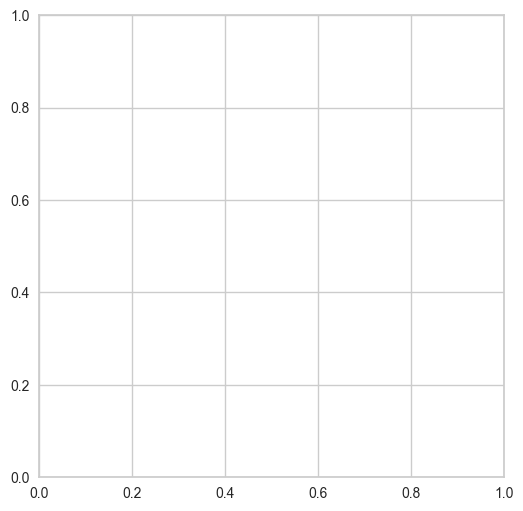

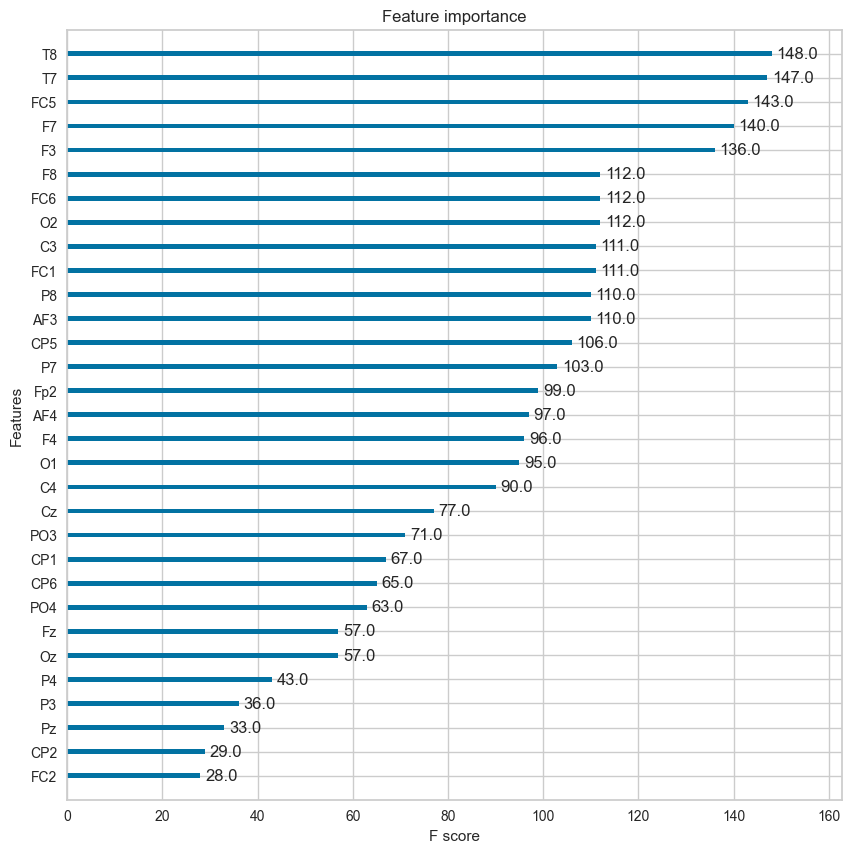

In [73]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

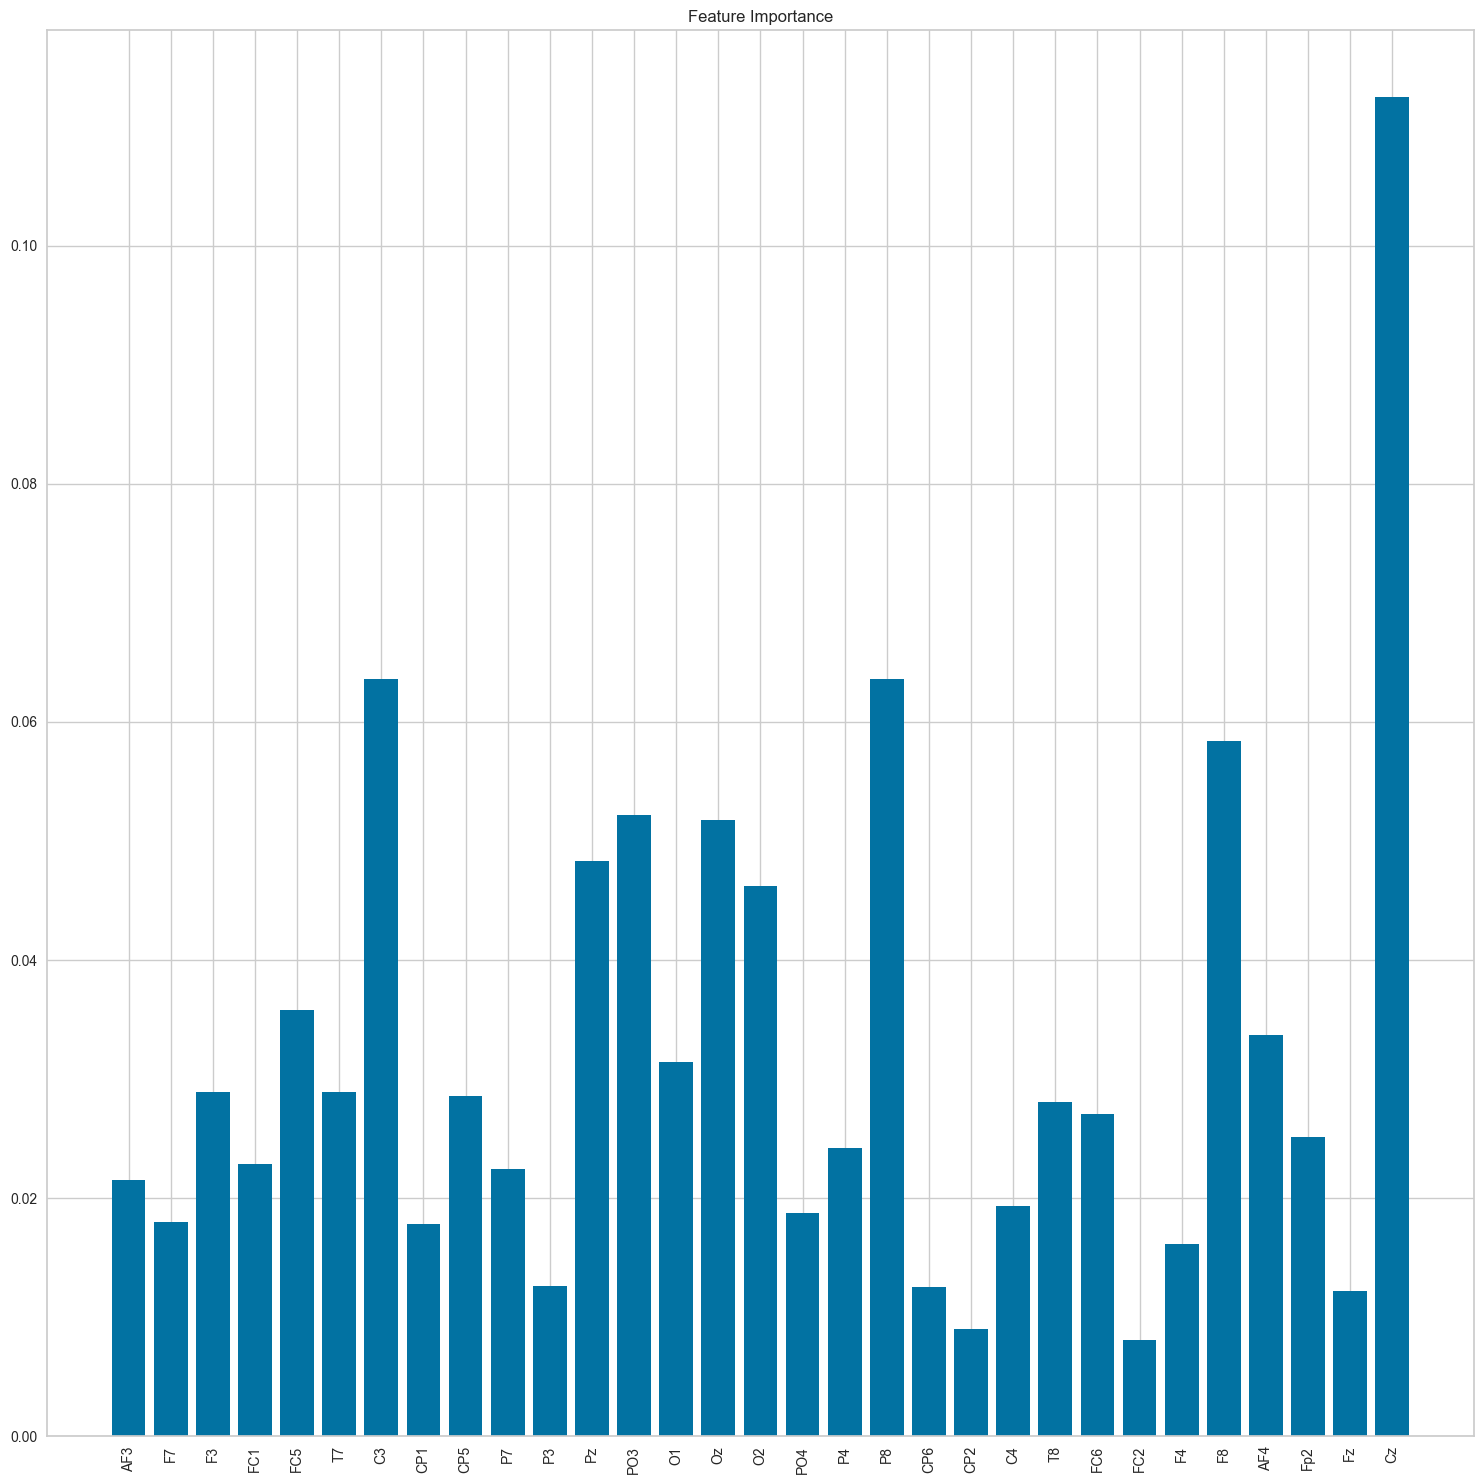

In [74]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

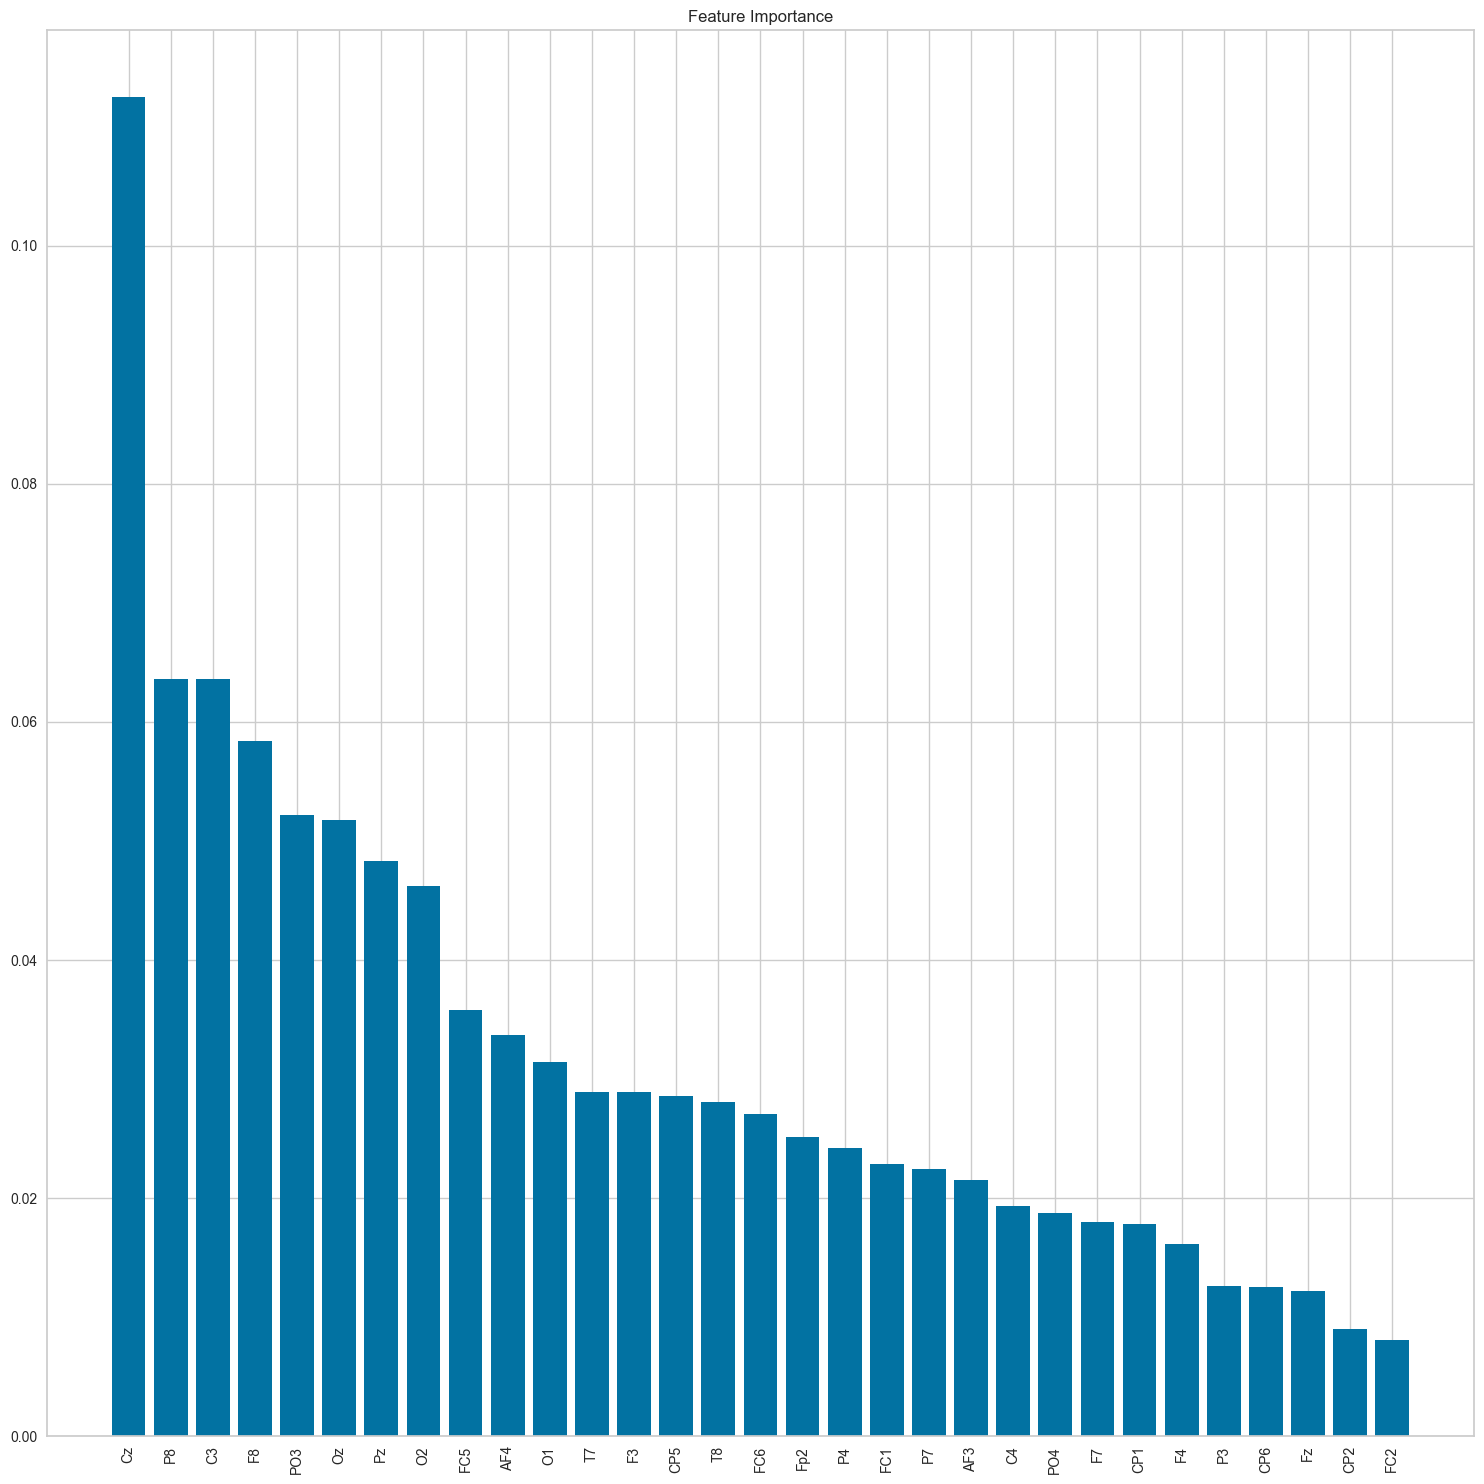

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>KNN Classifier</h2>

In [76]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9435600578871202


<h2>n=5 -> 94.80%</h2>

In [96]:
subject = "sub-hc33"
path = f"/Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)
raw.crop(tmax=150)
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])
std_montage = mne.channels.make_standard_montage('biosemi32')
raw.set_montage(std_montage)

Extracting EDF parameters from /Users/utkarsh.lal/Desktop/Parkinson's Disease/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset/Healthy/sub-hc33/ses-hc/eeg/sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  27 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.1s finished


<RawEDF | sub-hc33_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

In [97]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

In [98]:
importances

array([0.02152283, 0.01801998, 0.02890723, 0.02290714, 0.03580922,
       0.02892943, 0.06356369, 0.01787417, 0.02858905, 0.02249247,
       0.01265638, 0.04832998, 0.05219261, 0.03143789, 0.05173637,
       0.04623212, 0.01873423, 0.02419582, 0.06363681, 0.01254591,
       0.00905826, 0.01932923, 0.02811195, 0.02705921, 0.00809735,
       0.01613503, 0.05838227, 0.03372523, 0.02511385, 0.01223328,
       0.11244106], dtype=float32)

In [99]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02152283, 0.01801998, 0.02890723, 0.02290714,
       0.03580922, 0.02892943, 0.06356369, 0.01787417, 0.02858905,
       0.02249247, 0.01265638, 0.04832998, 0.05219261, 0.03143789,
       0.05173637, 0.04623212, 0.01873423, 0.02419582, 0.06363681,
       0.01254591, 0.00905826, 0.01932923, 0.02811195, 0.02705921,
       0.00809735, 0.01613503, 0.05838227, 0.03372523, 0.02511385,
       0.01223328, 0.11244106])

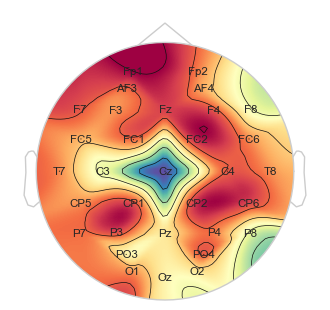

(<matplotlib.image.AxesImage at 0x7ff4b0aa4d00>,
 <matplotlib.contour.QuadContourSet at 0x7ff4b0b27280>)

In [104]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>2. Katz</h2>

In [117]:
katz_pd['Y'] = 1
katz['Y'] = 0

In [118]:
X1 = katz.append(katz_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2.558323,2.560147,2.471568,2.353461,1.897443,2.111162,2.552999,2.079184,2.118614,2.151071,...,2.306491,2.339464,2.199058,2.631417,2.162918,2.352149,2.292570,1.952611,2.021870,0
1,2.227277,2.437558,2.255454,2.028418,1.727504,2.147244,2.308843,2.063904,1.822912,2.033933,...,2.124803,2.467174,2.322576,2.115886,2.169256,2.141744,2.273973,1.822399,2.081002,0
2,2.189226,2.333375,2.311599,2.193001,2.001452,2.249887,2.098427,2.161720,2.058195,2.027171,...,2.045215,2.288235,2.176359,2.408760,1.998466,2.392885,2.001872,2.060904,2.146488,0
3,2.133931,2.608329,2.424073,2.241206,2.036252,2.171099,2.008300,1.866359,1.997217,1.783820,...,1.861014,2.084105,2.091225,2.272804,2.042990,1.991462,2.033998,2.076179,2.096131,0
4,2.250841,2.469416,2.520427,2.159112,1.912140,2.158744,1.935034,1.835675,1.853735,1.867446,...,2.065489,2.180567,2.057334,2.586487,2.255329,2.430208,2.224553,2.059871,2.025418,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,2.387250,2.453357,2.695387,2.607476,1.925026,2.197210,2.226982,2.277627,1.982419,2.834212,...,2.009412,1.715621,2.080199,1.871965,2.055894,2.149273,2.495100,2.377373,2.328957,1
6275,2.236370,1.999253,2.011868,2.109340,1.936794,2.106510,1.821677,1.886207,1.888389,1.970110,...,1.946936,2.145792,2.203763,2.113515,2.011739,2.092380,2.219811,2.074889,2.121490,1
6276,2.513400,2.464272,2.402502,2.193333,2.294016,2.330579,2.150154,1.972519,1.949220,2.459833,...,1.918965,1.837338,1.907566,1.906737,1.937306,1.932120,2.246438,2.027391,1.966717,1
6277,2.178971,2.306087,2.282773,2.417307,2.076114,2.065688,1.914651,1.870246,1.804930,2.224478,...,1.982261,1.721061,1.784318,1.754854,1.957314,1.971472,2.273090,1.879494,1.906784,1


<h2>Pycaret</h2>

In [119]:
clf = setup(data=X1, target='Y')

In [120]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:32:47
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.7993,0.8785,0.8432,0.7891,0.8149,0.5963,0.5986,0.0827
lightgbm,Light Gradient Boosting Machine,0.7857,0.8677,0.8267,0.7782,0.8013,0.5691,0.5712,0.1153
xgboost,Extreme Gradient Boosting,0.7795,0.8601,0.8158,0.7753,0.7947,0.5569,0.5584,0.2973
et,Extra Trees Classifier,0.7729,0.8571,0.8410,0.7539,0.7949,0.5422,0.5468,0.1660
rf,Random Forest Classifier,0.7666,0.8481,0.8188,0.7560,0.7859,0.5301,0.5327,0.2833
knn,K Neighbors Classifier,0.7540,0.8346,0.9031,0.7084,0.7937,0.5000,0.5238,0.0840
gbc,Gradient Boosting Classifier,0.7479,0.8238,0.8115,0.7352,0.7710,0.4921,0.4959,0.5227
ada,Ada Boost Classifier,0.6949,0.7610,0.7598,0.6893,0.7226,0.3853,0.3879,0.1587
lda,Linear Discriminant Analysis,0.6692,0.7303,0.7207,0.6718,0.6951,0.3344,0.3358,0.0880
lr,Logistic Regression,0.6683,0.7301,0.7172,0.6718,0.6935,0.3327,0.3340,0.2867


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

<b>QDA - 78.26<br><b>LGBM - 76.75<br><b>XGboost - 75.90</b>

In [121]:
import xgboost as xgb
from xgboost import XGBClassifier

In [122]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [123]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,2.560147,2.471568,2.353461,1.897443,2.111162,2.552999,2.079184,2.118614,2.151071,2.174779,...,2.347243,2.306491,2.339464,2.199058,2.631417,2.162918,2.352149,2.292570,1.952611,2.021870
1,2.437558,2.255454,2.028418,1.727504,2.147244,2.308843,2.063904,1.822912,2.033933,1.795605,...,2.161945,2.124803,2.467174,2.322576,2.115886,2.169256,2.141744,2.273973,1.822399,2.081002
2,2.333375,2.311599,2.193001,2.001452,2.249887,2.098427,2.161720,2.058195,2.027171,1.865201,...,1.910648,2.045215,2.288235,2.176359,2.408760,1.998466,2.392885,2.001872,2.060904,2.146488
3,2.608329,2.424073,2.241206,2.036252,2.171099,2.008300,1.866359,1.997217,1.783820,1.682861,...,1.972472,1.861014,2.084105,2.091225,2.272804,2.042990,1.991462,2.033998,2.076179,2.096131
4,2.469416,2.520427,2.159112,1.912140,2.158744,1.935034,1.835675,1.853735,1.867446,1.886496,...,2.159583,2.065489,2.180567,2.057334,2.586487,2.255329,2.430208,2.224553,2.059871,2.025418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,2.453357,2.695387,2.607476,1.925026,2.197210,2.226982,2.277627,1.982419,2.834212,2.567370,...,1.999466,2.009412,1.715621,2.080199,1.871965,2.055894,2.149273,2.495100,2.377373,2.328957
6275,1.999253,2.011868,2.109340,1.936794,2.106510,1.821677,1.886207,1.888389,1.970110,1.894449,...,2.344594,1.946936,2.145792,2.203763,2.113515,2.011739,2.092380,2.219811,2.074889,2.121490
6276,2.464272,2.402502,2.193333,2.294016,2.330579,2.150154,1.972519,1.949220,2.459833,2.306310,...,2.000333,1.918965,1.837338,1.907566,1.906737,1.937306,1.932120,2.246438,2.027391,1.966717
6277,2.306087,2.282773,2.417307,2.076114,2.065688,1.914651,1.870246,1.804930,2.224478,2.363498,...,1.765092,1.982261,1.721061,1.784318,1.754854,1.957314,1.971472,2.273090,1.879494,1.906784


In [124]:
Y = X1['Y']
Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [125]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.25%


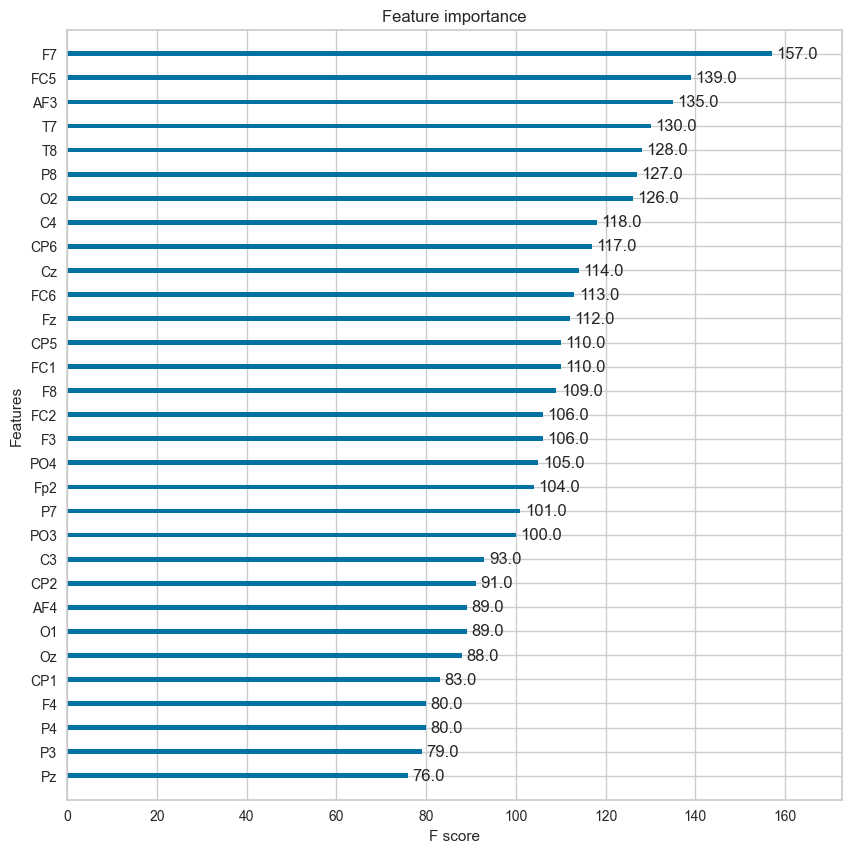

In [126]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

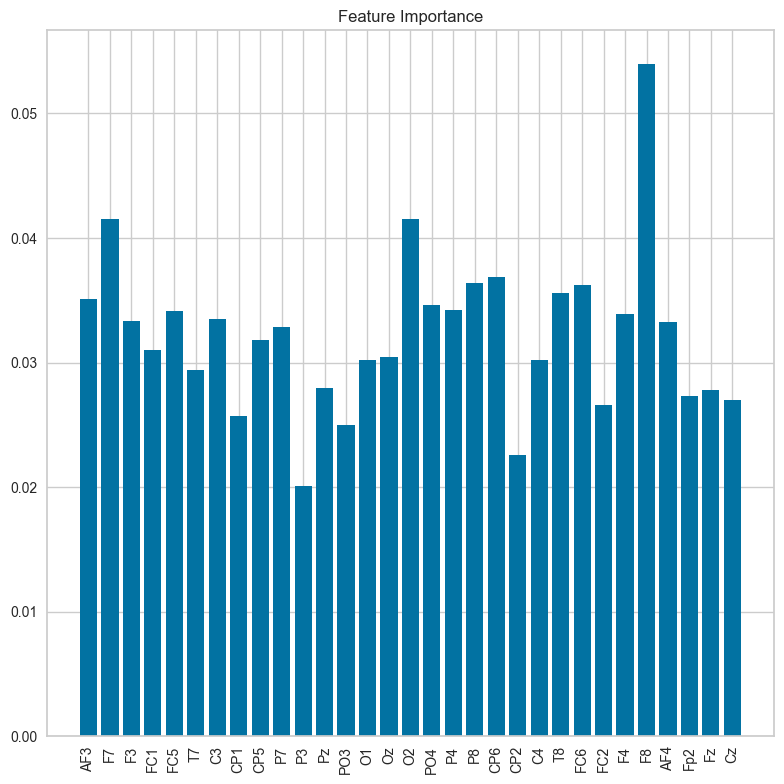

In [128]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

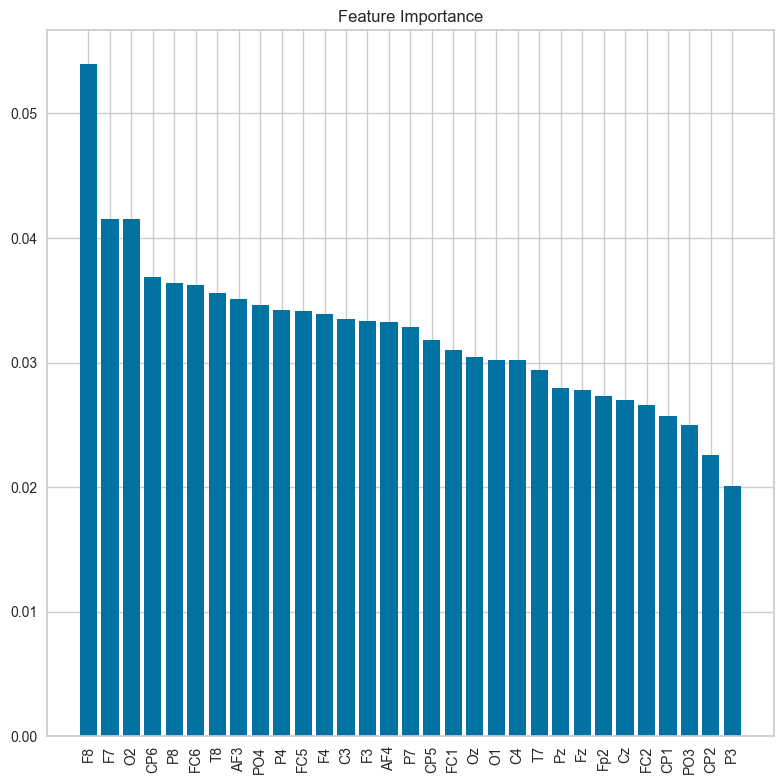

In [129]:
fig, ax = plt.subplots(figsize=(8,8))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [133]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03513053, 0.04152216, 0.03332429, 0.0309846 ,
       0.03412875, 0.02936631, 0.03348415, 0.02567803, 0.0317905 ,
       0.03286983, 0.02009381, 0.02792942, 0.02499809, 0.03022868,
       0.0304867 , 0.04148954, 0.03458514, 0.03424361, 0.03637147,
       0.03690365, 0.02260009, 0.03020311, 0.03561163, 0.03621183,
       0.02655744, 0.03388575, 0.05396245, 0.03323279, 0.02731434,
       0.02779345, 0.02701775])

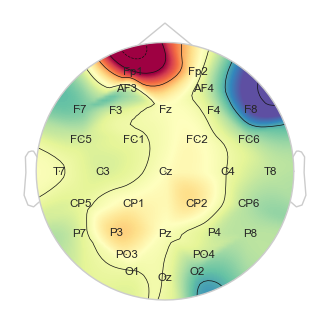

(<matplotlib.image.AxesImage at 0x7ff4c2b61fd0>,
 <matplotlib.contour.QuadContourSet at 0x7ff4d9717c40>)

In [136]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>3. Petrosian</h2>

In [519]:
petrosian_pd['Y'] = 1
petrosian['Y'] = 0

In [520]:
X1 = petrosian.append(petrosian_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.008246,1.008488,1.008125,1.007883,1.007519,1.007155,1.008246,1.007155,1.006790,1.006546,...,1.007033,1.007761,1.007519,1.008609,1.008004,1.008488,1.006424,1.006790,1.007155,0
1,1.008246,1.008488,1.008367,1.007519,1.007398,1.007276,1.008367,1.007276,1.005692,1.007398,...,1.007883,1.008125,1.007883,1.008367,1.007883,1.007640,1.007398,1.007883,1.007883,0
2,1.008609,1.008004,1.008125,1.007398,1.007276,1.007761,1.008125,1.007276,1.006180,1.007276,...,1.007398,1.008004,1.007761,1.008729,1.007398,1.007640,1.007398,1.007398,1.007276,0
3,1.008367,1.007398,1.008367,1.008125,1.006668,1.008367,1.007883,1.006424,1.006424,1.006180,...,1.006180,1.007883,1.006911,1.008850,1.007033,1.007398,1.007398,1.006302,1.006180,0
4,1.008609,1.007761,1.009212,1.008246,1.007155,1.008488,1.007640,1.006302,1.006424,1.006790,...,1.006911,1.007761,1.007033,1.008246,1.007883,1.008125,1.008367,1.007033,1.006180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.008850,1.008729,1.009091,1.008246,1.008488,1.008246,1.008850,1.008246,1.007883,1.008609,...,1.008488,1.007883,1.008004,1.008367,1.008125,1.008850,1.008971,1.008729,1.008004,1
6275,1.008850,1.008729,1.008971,1.008246,1.007761,1.008246,1.008609,1.007761,1.008004,1.008609,...,1.007761,1.007761,1.007761,1.007519,1.008246,1.008246,1.008488,1.008004,1.007519,1
6276,1.008004,1.009332,1.009091,1.009091,1.008367,1.008246,1.008850,1.008125,1.008125,1.008850,...,1.008488,1.008246,1.007761,1.008004,1.008004,1.009091,1.008609,1.008125,1.008004,1
6277,1.007761,1.008971,1.008729,1.008488,1.008004,1.008488,1.008609,1.008729,1.007398,1.008850,...,1.008367,1.009091,1.008125,1.008609,1.007761,1.009091,1.009091,1.008367,1.008609,1


<h2>Pycaret</h2>

In [142]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,2710
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [143]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:38:17
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9117,0.9662,0.9088,0.9222,0.9152,0.8231,0.8236,0.0960
xgboost,Extreme Gradient Boosting,0.8935,0.9603,0.8801,0.9141,0.8965,0.7869,0.7881,0.1653
lightgbm,Light Gradient Boosting Machine,0.8853,0.9559,0.8701,0.9078,0.8882,0.7706,0.7719,0.1133
et,Extra Trees Classifier,0.8835,0.9506,0.8549,0.9185,0.8850,0.7672,0.7703,0.1687
rf,Random Forest Classifier,0.8792,0.9444,0.8567,0.9089,0.8813,0.7585,0.7610,0.1987
qda,Quadratic Discriminant Analysis,0.8739,0.9508,0.8588,0.8967,0.8771,0.7478,0.7490,0.0953
gbc,Gradient Boosting Classifier,0.8514,0.9249,0.8276,0.8824,0.8536,0.7031,0.7054,0.2273
ada,Ada Boost Classifier,0.7907,0.8674,0.7807,0.8129,0.7961,0.5812,0.5822,0.1287
dt,Decision Tree Classifier,0.7615,0.7615,0.7633,0.7778,0.7700,0.5225,0.5232,0.0973
lda,Linear Discriminant Analysis,0.7538,0.8322,0.7607,0.7682,0.7636,0.5068,0.5080,0.0993


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [148]:
knn = create_model('knn', n_neighbors=5, leaf_size=30, p=2, weights='uniform', metric='minkowski', algorithm='auto', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:40:48
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9147,0.9723,0.9351,0.9057,0.9201,0.8286,0.8291
1,0.9386,0.9728,0.9221,0.9595,0.9404,0.8771,0.8778
2,0.8942,0.9598,0.8896,0.9073,0.8984,0.7881,0.7882
3,0.9113,0.9566,0.8896,0.9384,0.9133,0.8226,0.8238
4,0.9352,0.9753,0.9221,0.9530,0.9373,0.8702,0.8707
5,0.8942,0.9607,0.8831,0.9128,0.8977,0.7882,0.7887
6,0.8976,0.9716,0.9221,0.8875,0.9045,0.7943,0.7949
7,0.9352,0.9705,0.9216,0.9527,0.9369,0.8702,0.8708
8,0.9113,0.9750,0.9020,0.9262,0.9139,0.8224,0.8227


<h3>KNN gives highest - 91.17% for k=5</h3>

In [521]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [522]:
#X = X1.iloc[:, :-1]
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.008488,1.008125,1.007883,1.007519,1.007155,1.008246,1.007155,1.006790,1.006546,1.006058,...,1.006911,1.007033,1.007761,1.007519,1.008609,1.008004,1.008488,1.006424,1.006790,1.007155
1,1.008488,1.008367,1.007519,1.007398,1.007276,1.008367,1.007276,1.005692,1.007398,1.005570,...,1.007761,1.007883,1.008125,1.007883,1.008367,1.007883,1.007640,1.007398,1.007883,1.007883
2,1.008004,1.008125,1.007398,1.007276,1.007761,1.008125,1.007276,1.006180,1.007276,1.006302,...,1.006790,1.007398,1.008004,1.007761,1.008729,1.007398,1.007640,1.007398,1.007398,1.007276
3,1.007398,1.008367,1.008125,1.006668,1.008367,1.007883,1.006424,1.006424,1.006180,1.005692,...,1.006180,1.006180,1.007883,1.006911,1.008850,1.007033,1.007398,1.007398,1.006302,1.006180
4,1.007761,1.009212,1.008246,1.007155,1.008488,1.007640,1.006302,1.006424,1.006790,1.006180,...,1.005936,1.006911,1.007761,1.007033,1.008246,1.007883,1.008125,1.008367,1.007033,1.006180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.008729,1.009091,1.008246,1.008488,1.008246,1.008850,1.008246,1.007883,1.008609,1.008850,...,1.008125,1.008488,1.007883,1.008004,1.008367,1.008125,1.008850,1.008971,1.008729,1.008004
6275,1.008729,1.008971,1.008246,1.007761,1.008246,1.008609,1.007761,1.008004,1.008609,1.008609,...,1.007883,1.007761,1.007761,1.007761,1.007519,1.008246,1.008246,1.008488,1.008004,1.007519
6276,1.009332,1.009091,1.009091,1.008367,1.008246,1.008850,1.008125,1.008125,1.008850,1.008367,...,1.007761,1.008488,1.008246,1.007761,1.008004,1.008004,1.009091,1.008609,1.008125,1.008004
6277,1.008971,1.008729,1.008488,1.008004,1.008488,1.008609,1.008729,1.007398,1.008850,1.008367,...,1.008367,1.008367,1.009091,1.008125,1.008609,1.007761,1.009091,1.009091,1.008367,1.008609


In [523]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [524]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [525]:
y_train

1831    0
1796    0
6232    1
4868    1
2715    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4206, dtype: int64

In [526]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,1.008609,1.008125,1.007761,1.007033,1.008125,1.007155,1.006546,1.006911,1.006302,1.006180,...,1.006424,1.006668,1.006424,1.007519,1.007761,1.007761,1.007883,1.006668,1.007276,1.007155
1796,1.007398,1.006790,1.007033,1.007640,1.007155,1.005692,1.006546,1.006546,1.007398,1.007155,...,1.007033,1.007519,1.007640,1.006790,1.007033,1.007640,1.006424,1.006790,1.006546,1.006911
6232,1.007155,1.006911,1.006424,1.005692,1.006790,1.005570,1.006180,1.005325,1.005570,1.005570,...,1.005447,1.006180,1.004589,1.005325,1.005447,1.006180,1.005202,1.006180,1.005202,1.004957
4868,1.005570,1.005814,1.005570,1.006058,1.007883,1.006790,1.006790,1.005570,1.004343,1.004343,...,1.005936,1.006790,1.005570,1.005814,1.006546,1.005814,1.006302,1.005570,1.006302,1.006424
2715,1.008850,1.008246,1.008971,1.008488,1.007883,1.008004,1.008246,1.008125,1.008367,1.008125,...,1.009212,1.008971,1.009573,1.009212,1.008488,1.009091,1.007761,1.008850,1.008488,1.008246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.007033,1.007398,1.008125,1.007398,1.008488,1.007761,1.005814,1.006180,1.006302,1.006424,...,1.006302,1.007640,1.008004,1.007883,1.007883,1.007761,1.009091,1.008367,1.006668,1.006668
4060,1.008246,1.007883,1.007883,1.006302,1.007519,1.007155,1.006546,1.005447,1.006180,1.006302,...,1.007155,1.007640,1.007883,1.006546,1.007883,1.006668,1.008125,1.007398,1.006302,1.006302
1346,1.006546,1.005325,1.007398,1.005692,1.005325,1.006911,1.005692,1.004834,1.005692,1.006424,...,1.004957,1.004589,1.005447,1.005936,1.006911,1.005202,1.005936,1.005447,1.004712,1.006668
3454,1.007155,1.006790,1.006911,1.006911,1.006790,1.007276,1.007033,1.006668,1.007033,1.007033,...,1.006424,1.006790,1.006790,1.006546,1.006790,1.006546,1.006546,1.006546,1.006546,1.006180


In [527]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9030390738060782


<h2>XGBoost</h2>

In [528]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.77%


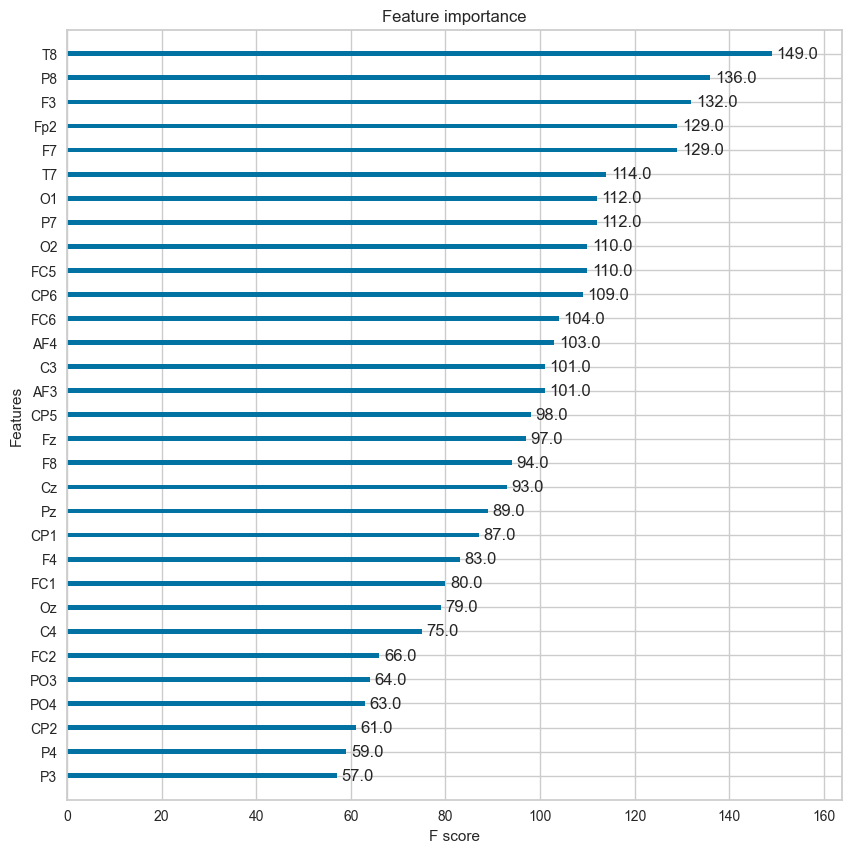

In [529]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

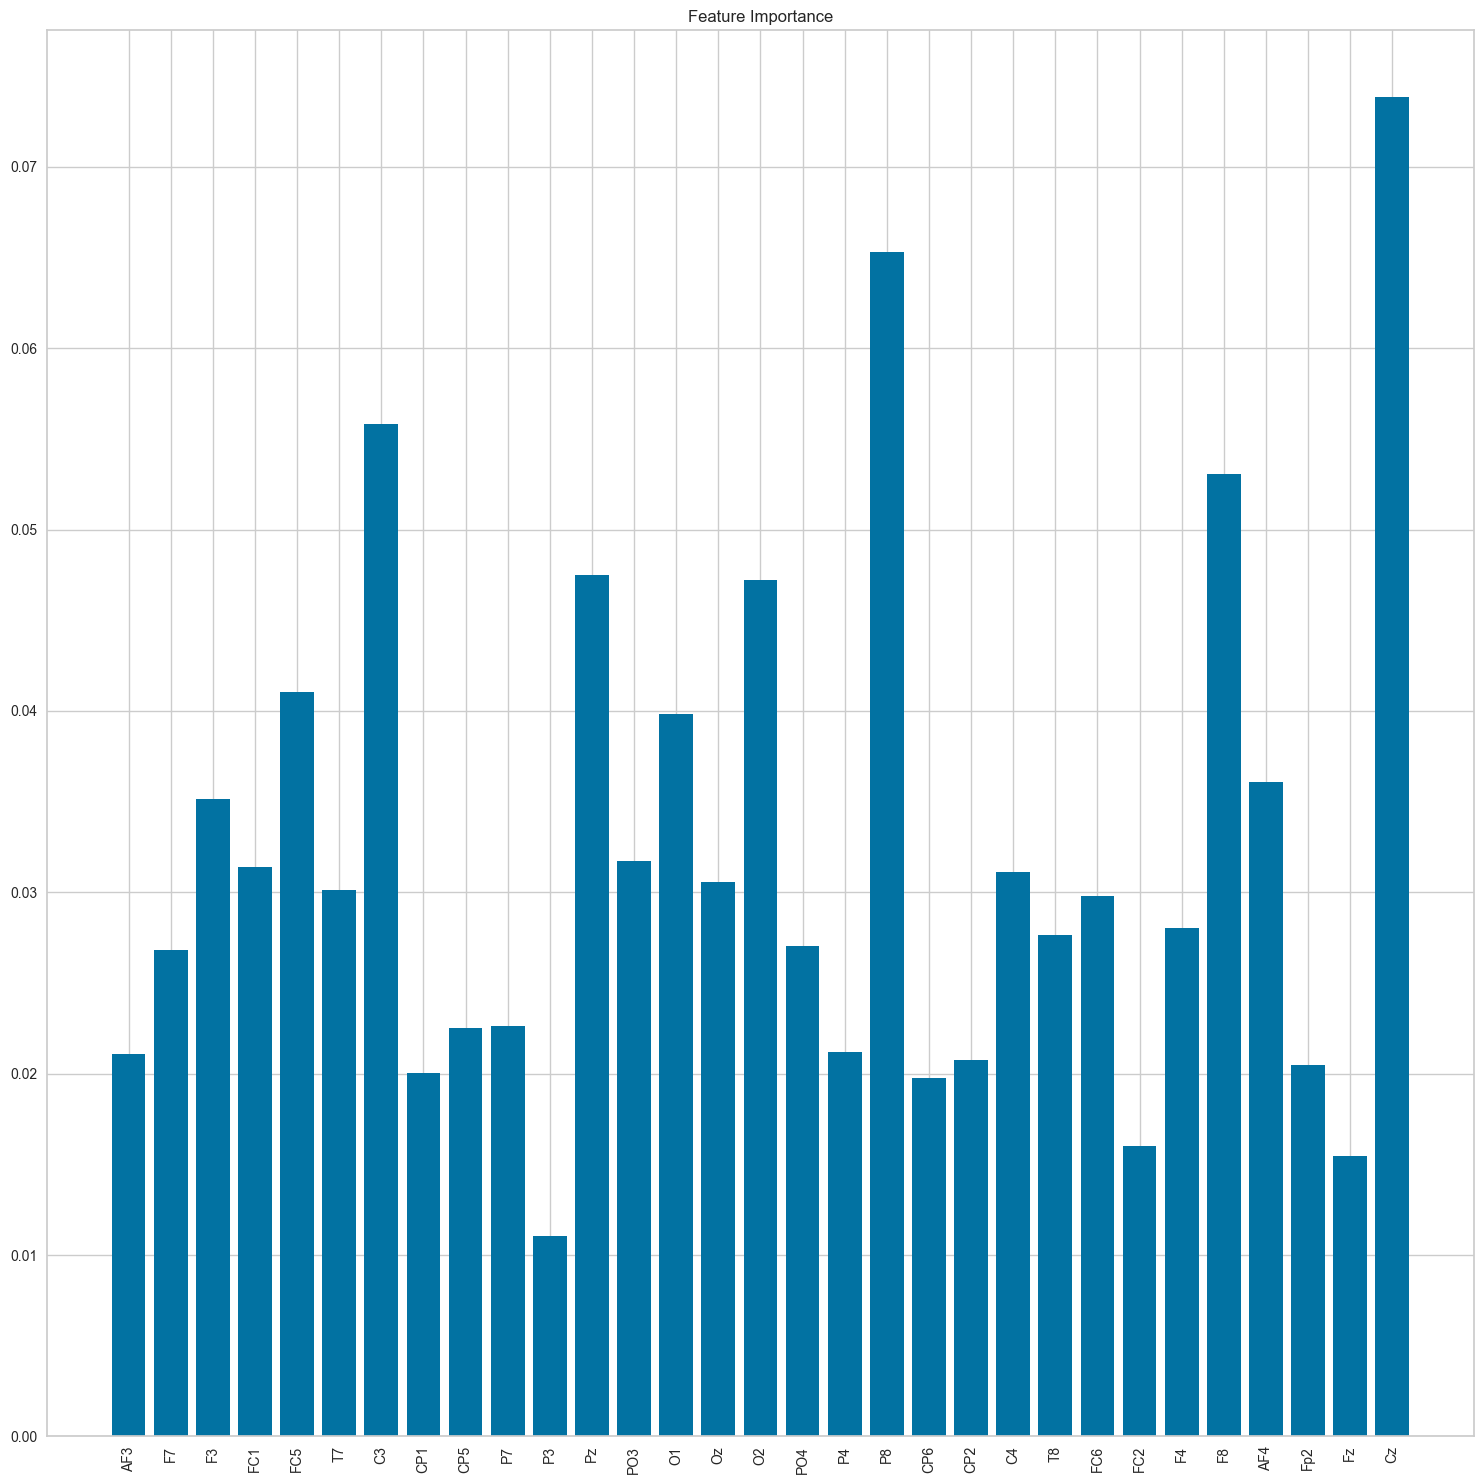

In [531]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

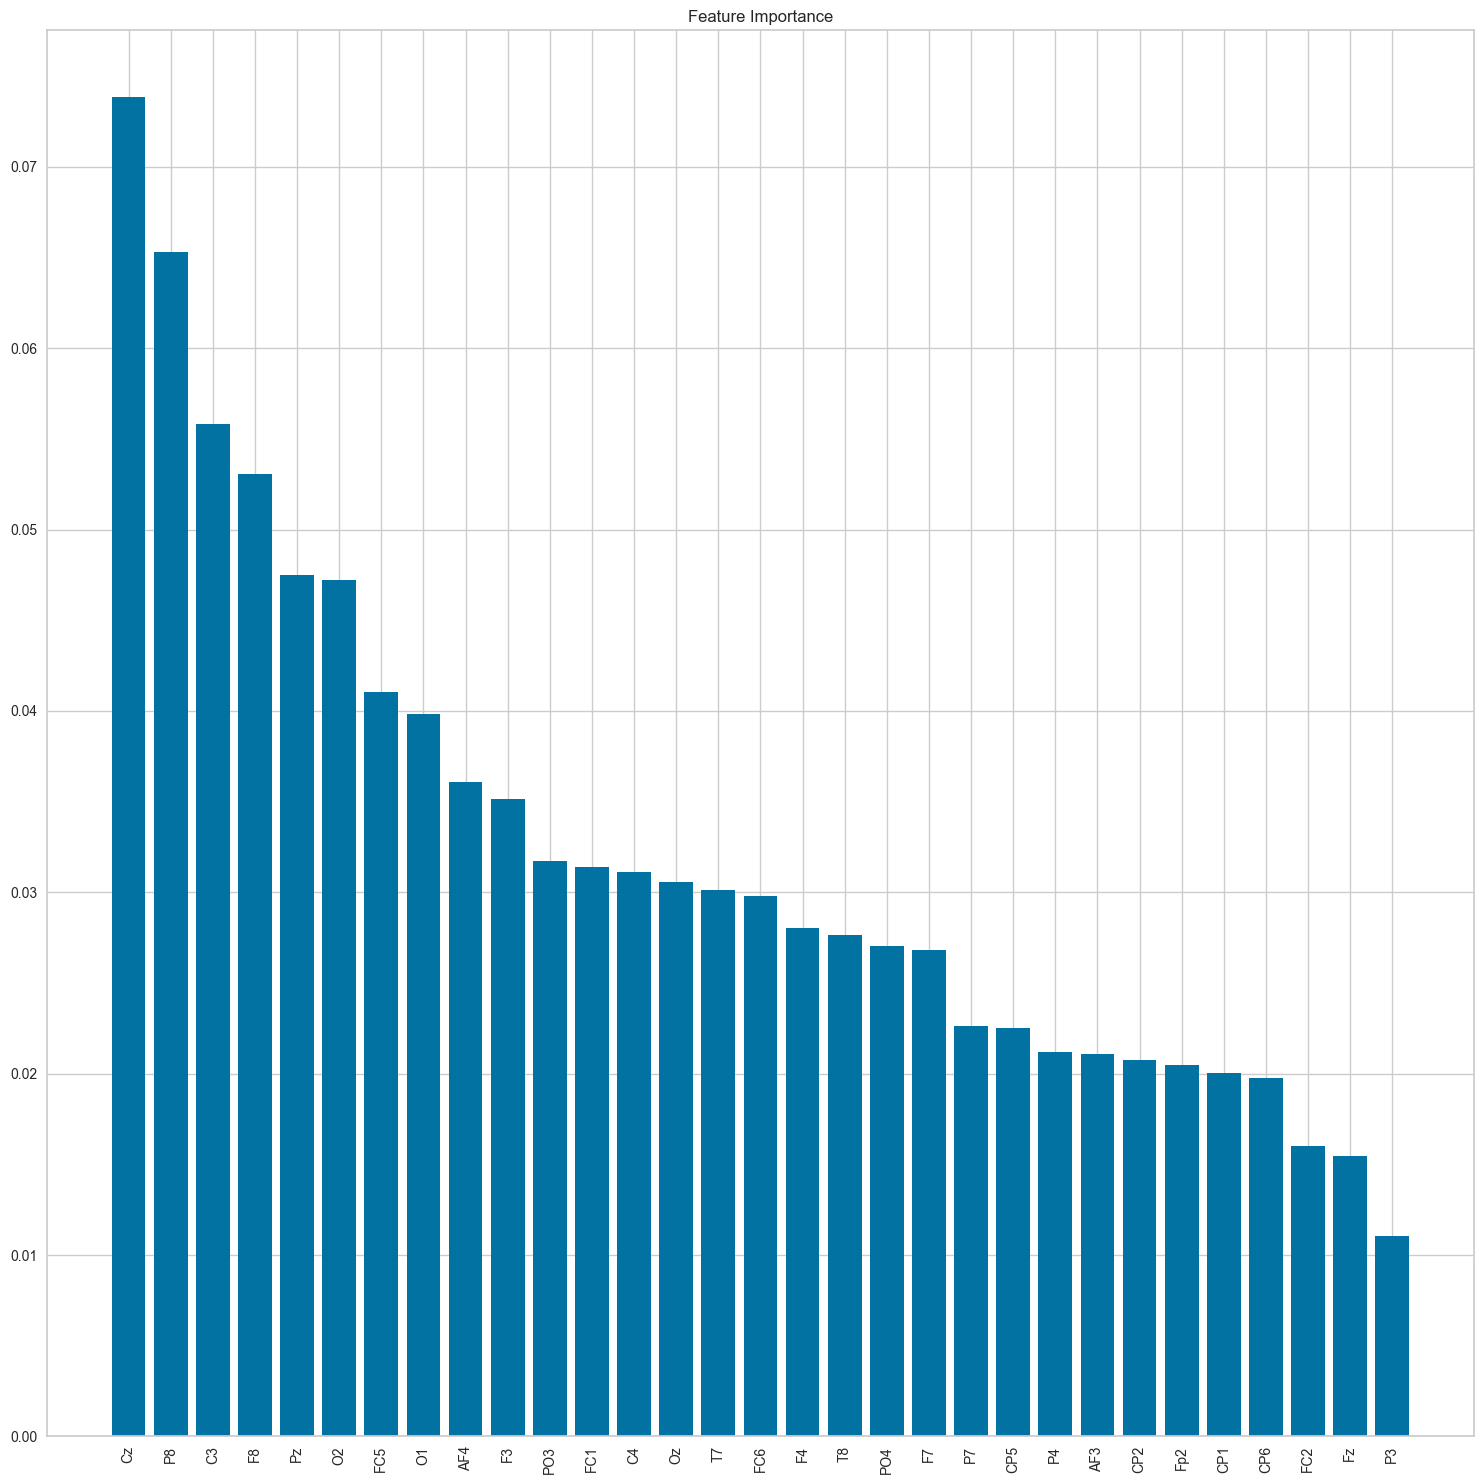

In [533]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [534]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02108247, 0.02683411, 0.03516093, 0.0313774 ,
       0.04102287, 0.03010923, 0.05582372, 0.02001701, 0.02251779,
       0.02262034, 0.01102527, 0.04749863, 0.03173777, 0.03981203,
       0.03056169, 0.04723169, 0.02702962, 0.02118891, 0.06531172,
       0.01974939, 0.0207509 , 0.03114149, 0.02765402, 0.02981463,
       0.01601154, 0.02803767, 0.05304655, 0.03607079, 0.02046409,
       0.01545949, 0.07383619])

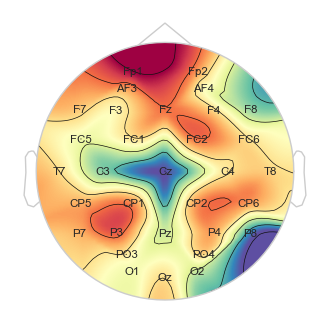

(<matplotlib.image.AxesImage at 0x7ff4b1437730>,
 <matplotlib.contour.QuadContourSet at 0x7ff480f97580>)

In [535]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>4. Spectral Entropy</h2>

In [163]:
spec_ent_pd['Y'] = 1
spec_ent['Y'] = 0

In [165]:
X1 = spec_ent.append(spec_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.593873,0.604527,0.591741,0.570959,0.440239,0.578763,0.612308,0.520013,0.475922,0.522117,...,0.596481,0.624009,0.567870,0.620325,0.600903,0.569141,0.571929,0.504376,0.536821,0
1,0.613344,0.592323,0.583546,0.591717,0.457257,0.545593,0.603348,0.483061,0.475914,0.521699,...,0.579083,0.603311,0.569449,0.621370,0.593480,0.579690,0.594814,0.487671,0.565871,0
2,0.618550,0.597921,0.606963,0.577720,0.572259,0.575575,0.568970,0.528698,0.506645,0.493219,...,0.507580,0.580431,0.575508,0.602777,0.557165,0.602556,0.547426,0.571414,0.546502,0
3,0.618106,0.601512,0.612746,0.579334,0.497136,0.555319,0.581628,0.527950,0.541437,0.545024,...,0.532881,0.605140,0.569413,0.626525,0.572877,0.583311,0.560602,0.536638,0.536032,0
4,0.615456,0.608456,0.597432,0.612505,0.511864,0.597047,0.612684,0.496160,0.512152,0.566439,...,0.576640,0.593841,0.578060,0.619243,0.604366,0.582580,0.596327,0.509458,0.535927,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.592404,0.593417,0.604791,0.599126,0.616174,0.516707,0.576106,0.560610,0.543330,0.593498,...,0.506763,0.622731,0.599034,0.613340,0.596308,0.599597,0.602735,0.619765,0.594653,1
6275,0.612506,0.580236,0.612148,0.595419,0.604866,0.616657,0.603814,0.602606,0.609390,0.600387,...,0.531109,0.559284,0.564870,0.553801,0.565773,0.554545,0.582361,0.586392,0.614373,1
6276,0.596456,0.613209,0.628880,0.599782,0.603386,0.614420,0.606904,0.557837,0.434701,0.606345,...,0.509586,0.538269,0.551795,0.542608,0.540272,0.542889,0.541956,0.584287,0.470161,1
6277,0.605447,0.623557,0.602463,0.611441,0.557284,0.611505,0.609753,0.587749,0.444990,0.616647,...,0.579924,0.578796,0.587750,0.579091,0.535663,0.591783,0.607277,0.580506,0.585810,1


In [169]:
clf = setup(data=X1, target='Y')

In [170]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:46:16
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8774,0.9492,0.8832,0.8834,0.8828,0.7542,0.7550,0.3120
lightgbm,Light Gradient Boosting Machine,0.8689,0.9455,0.8671,0.8813,0.8737,0.7375,0.7384,0.1573
et,Extra Trees Classifier,0.8628,0.9367,0.8571,0.8786,0.8674,0.7253,0.7261,0.2007
knn,K Neighbors Classifier,0.8557,0.9272,0.9227,0.8237,0.8701,0.7091,0.7155,0.1220
rf,Random Forest Classifier,0.8491,0.9279,0.8445,0.8653,0.8543,0.6980,0.6990,0.2973
qda,Quadratic Discriminant Analysis,0.8428,0.9267,0.8958,0.8209,0.8566,0.6834,0.6869,0.1200
gbc,Gradient Boosting Classifier,0.8248,0.9052,0.8324,0.8334,0.8325,0.6488,0.6494,0.5347
ada,Ada Boost Classifier,0.7561,0.8335,0.7846,0.7585,0.7707,0.5103,0.5117,0.1873
dt,Decision Tree Classifier,0.7258,0.7247,0.7489,0.7340,0.7408,0.4498,0.4507,0.1307
lda,Linear Discriminant Analysis,0.7240,0.7956,0.7511,0.7304,0.7401,0.4460,0.4470,0.1260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [171]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [172]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.604527,0.591741,0.570959,0.440239,0.578763,0.612308,0.520013,0.475922,0.522117,0.549640,...,0.561676,0.596481,0.624009,0.567870,0.620325,0.600903,0.569141,0.571929,0.504376,0.536821
1,0.592323,0.583546,0.591717,0.457257,0.545593,0.603348,0.483061,0.475914,0.521699,0.521584,...,0.488650,0.579083,0.603311,0.569449,0.621370,0.593480,0.579690,0.594814,0.487671,0.565871
2,0.597921,0.606963,0.577720,0.572259,0.575575,0.568970,0.528698,0.506645,0.493219,0.505649,...,0.524615,0.507580,0.580431,0.575508,0.602777,0.557165,0.602556,0.547426,0.571414,0.546502
3,0.601512,0.612746,0.579334,0.497136,0.555319,0.581628,0.527950,0.541437,0.545024,0.534798,...,0.529706,0.532881,0.605140,0.569413,0.626525,0.572877,0.583311,0.560602,0.536638,0.536032
4,0.608456,0.597432,0.612505,0.511864,0.597047,0.612684,0.496160,0.512152,0.566439,0.508146,...,0.570506,0.576640,0.593841,0.578060,0.619243,0.604366,0.582580,0.596327,0.509458,0.535927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.593417,0.604791,0.599126,0.616174,0.516707,0.576106,0.560610,0.543330,0.593498,0.612904,...,0.608716,0.506763,0.622731,0.599034,0.613340,0.596308,0.599597,0.602735,0.619765,0.594653
6275,0.580236,0.612148,0.595419,0.604866,0.616657,0.603814,0.602606,0.609390,0.600387,0.599273,...,0.583768,0.531109,0.559284,0.564870,0.553801,0.565773,0.554545,0.582361,0.586392,0.614373
6276,0.613209,0.628880,0.599782,0.603386,0.614420,0.606904,0.557837,0.434701,0.606345,0.622192,...,0.520223,0.509586,0.538269,0.551795,0.542608,0.540272,0.542889,0.541956,0.584287,0.470161
6277,0.623557,0.602463,0.611441,0.557284,0.611505,0.609753,0.587749,0.444990,0.616647,0.634755,...,0.575181,0.579924,0.578796,0.587750,0.579091,0.535663,0.591783,0.607277,0.580506,0.585810


In [173]:
Y = X3['Y']
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [175]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,0.579826,0.578795,0.594806,0.563994,0.583512,0.545655,0.526476,0.440251,0.533986,0.537692,...,0.541557,0.557193,0.525005,0.527712,0.597536,0.585732,0.599700,0.546855,0.491096,0.546380
1796,0.590731,0.499751,0.576042,0.554548,0.521498,0.536025,0.548781,0.526389,0.567170,0.518985,...,0.596694,0.579970,0.595283,0.552707,0.486873,0.578784,0.490966,0.544766,0.467088,0.481327
6232,0.525485,0.481316,0.486078,0.463964,0.524309,0.520881,0.546913,0.411930,0.500094,0.490587,...,0.496758,0.527397,0.513494,0.484396,0.490877,0.517874,0.495964,0.507232,0.447877,0.511162
4868,0.447065,0.461115,0.454136,0.508338,0.548226,0.530131,0.544035,0.482480,0.413803,0.387622,...,0.522530,0.547719,0.518958,0.520836,0.532359,0.562907,0.558329,0.560055,0.508533,0.499054
2715,0.616663,0.557338,0.609421,0.628125,0.580314,0.575129,0.601161,0.610378,0.621954,0.592211,...,0.582506,0.564786,0.576850,0.603739,0.580372,0.570626,0.592856,0.586771,0.582998,0.569890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.599479,0.588103,0.621367,0.548932,0.597882,0.558032,0.533347,0.515822,0.525182,0.538925,...,0.545567,0.588466,0.598784,0.584393,0.588266,0.557274,0.614682,0.624449,0.542884,0.475135
4060,0.582537,0.587265,0.597899,0.547349,0.613472,0.554992,0.561642,0.556998,0.554547,0.502602,...,0.576247,0.582842,0.582088,0.570216,0.589150,0.572411,0.592604,0.587655,0.537867,0.529969
1346,0.460134,0.381282,0.499079,0.427654,0.398417,0.386300,0.424136,0.367932,0.388730,0.456933,...,0.469815,0.396503,0.427266,0.441625,0.456876,0.433371,0.487775,0.479591,0.412911,0.518085
3454,0.535701,0.561038,0.535907,0.418465,0.538713,0.565879,0.556681,0.528829,0.519908,0.563724,...,0.458762,0.529783,0.473148,0.402277,0.405414,0.465681,0.405660,0.425368,0.383969,0.501244


In [176]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.44%


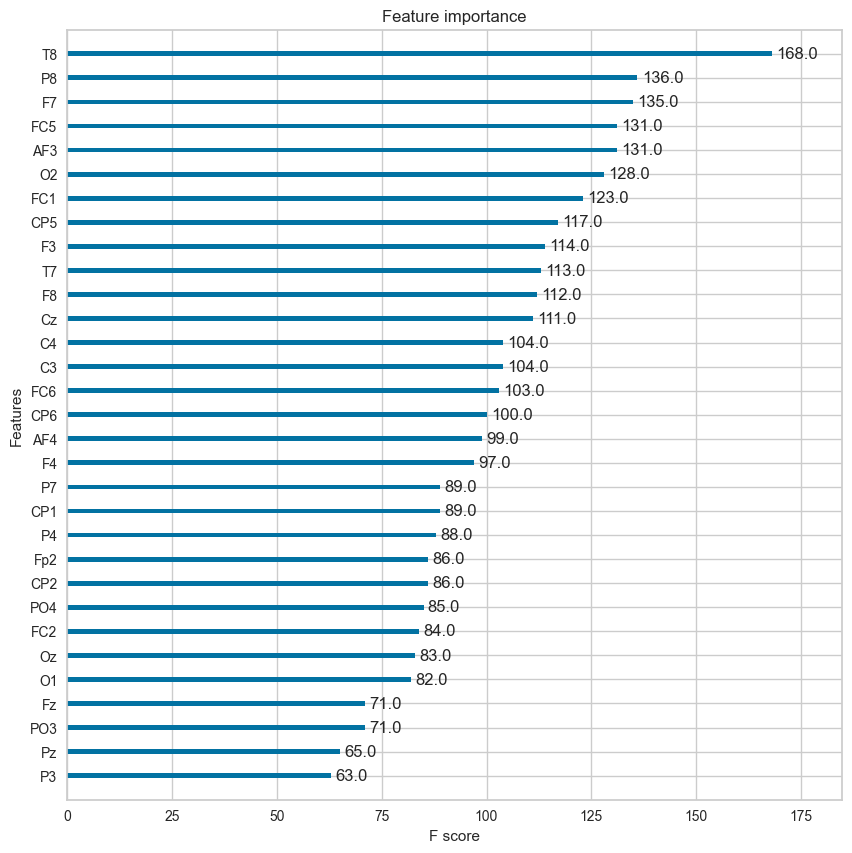

In [177]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

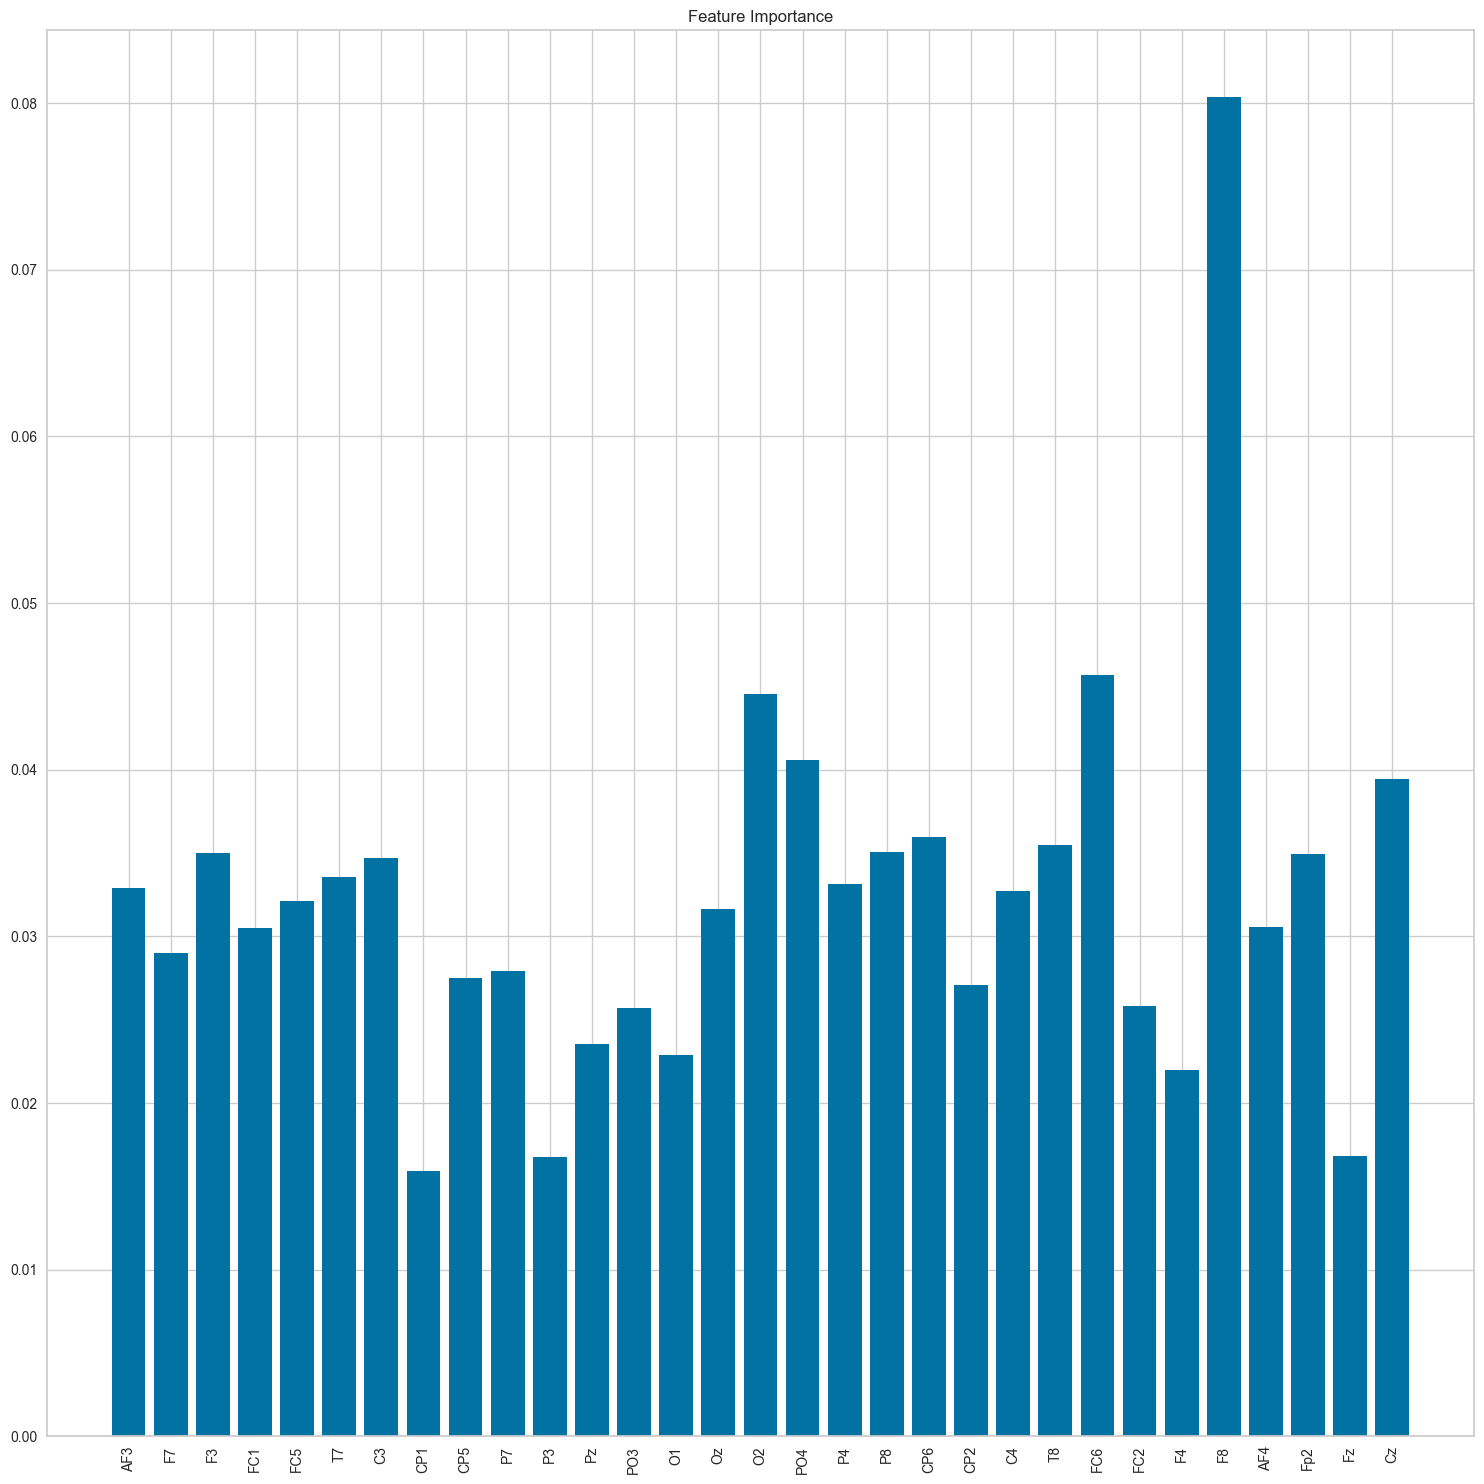

In [178]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

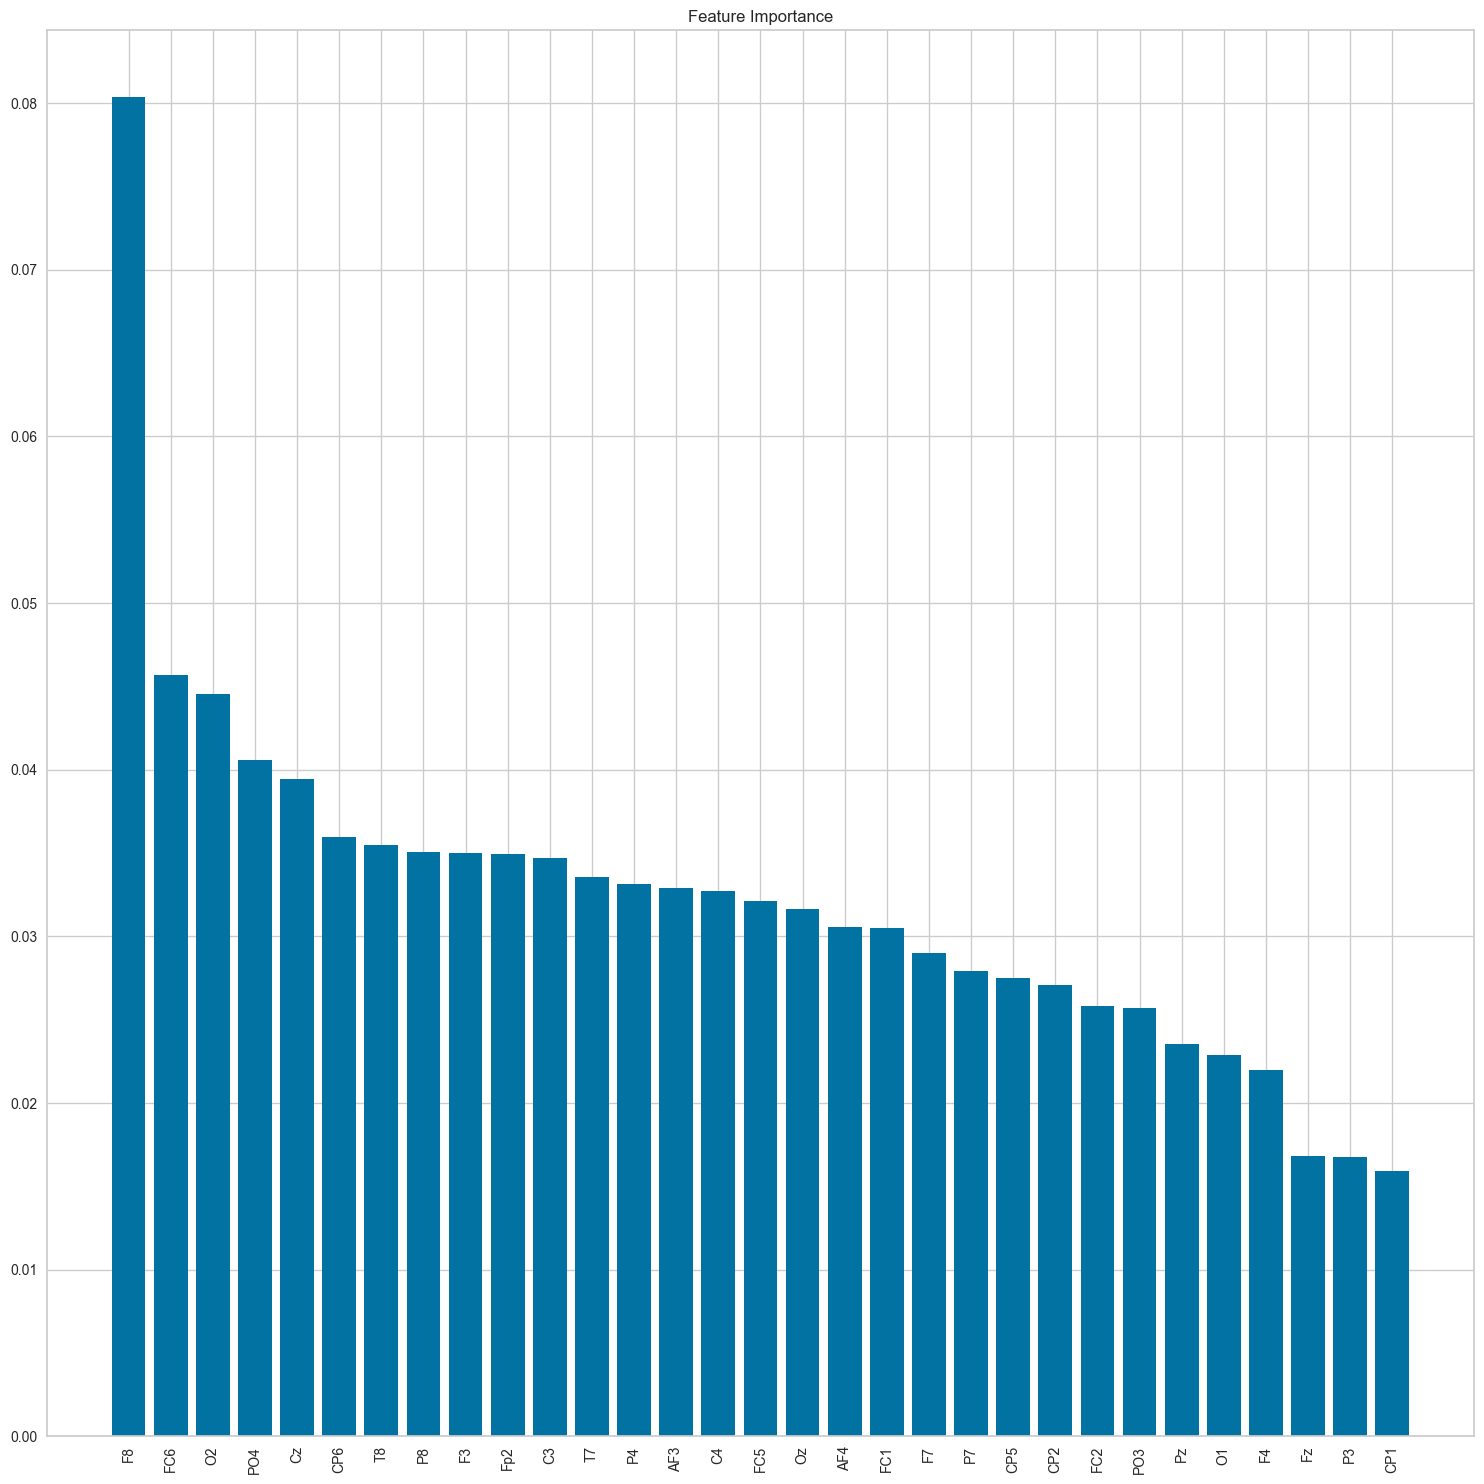

In [179]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [180]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03292134, 0.02899797, 0.03499331, 0.03053093,
       0.03210059, 0.03355467, 0.0347255 , 0.01593789, 0.02751677,
       0.02790875, 0.01678361, 0.0235621 , 0.0256978 , 0.02291125,
       0.03165565, 0.04451515, 0.04057851, 0.03313983, 0.03508554,
       0.03593802, 0.02707145, 0.03272169, 0.03547981, 0.04569381,
       0.02582146, 0.02198845, 0.080343  , 0.03057313, 0.03494536,
       0.01685426, 0.03945255])

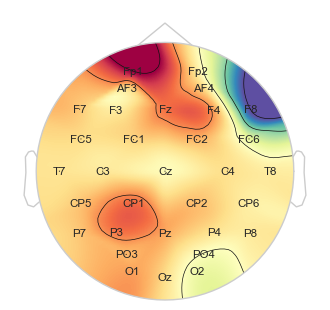

(<matplotlib.image.AxesImage at 0x7ff4a0c22610>,
 <matplotlib.contour.QuadContourSet at 0x7ff4d58c1d90>)

In [181]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>5. Permutation Entropy</h2>

In [182]:
perm_ent_pd['Y'] = 1
perm_ent['Y'] = 0

In [183]:
X1 = perm_ent.append(perm_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.652905,0.660044,0.651352,0.645478,0.636659,0.626968,0.654253,0.626445,0.618744,0.611131,...,0.624387,0.640696,0.636560,0.660265,0.648429,0.653719,0.609475,0.618316,0.627901,0
1,0.653574,0.659891,0.656669,0.637444,0.630096,0.629470,0.655338,0.628304,0.588969,0.633215,...,0.643236,0.648898,0.642346,0.656927,0.643507,0.635980,0.633487,0.642874,0.645657,0
2,0.662766,0.647922,0.650376,0.633084,0.629015,0.642641,0.649718,0.628866,0.602392,0.631370,...,0.634031,0.648382,0.636512,0.665782,0.631950,0.639436,0.633220,0.628339,0.630563,0
3,0.656307,0.634368,0.657455,0.651530,0.613804,0.656148,0.645823,0.607477,0.606502,0.603176,...,0.598053,0.645312,0.621930,0.668565,0.624604,0.632100,0.633199,0.601162,0.603571,0
4,0.661314,0.643084,0.674933,0.653677,0.627558,0.658779,0.639269,0.603782,0.609707,0.618413,...,0.620141,0.641779,0.623684,0.654479,0.645965,0.649049,0.656623,0.624300,0.602522,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.665054,0.664238,0.671910,0.654737,0.659137,0.653796,0.667549,0.651476,0.644378,0.662713,...,0.658739,0.645366,0.647186,0.657282,0.651012,0.667822,0.670913,0.664364,0.647833,1
6275,0.666389,0.665623,0.670141,0.654549,0.641788,0.653214,0.662257,0.635794,0.648039,0.659159,...,0.642917,0.642147,0.642849,0.636712,0.653545,0.654327,0.660198,0.645987,0.635989,1
6276,0.648379,0.678128,0.672824,0.673279,0.656253,0.650779,0.668003,0.649698,0.651767,0.668178,...,0.656678,0.652566,0.640157,0.647616,0.648636,0.673911,0.662553,0.649668,0.646151,1
6277,0.642323,0.670793,0.663267,0.659779,0.647095,0.657468,0.662566,0.665256,0.633089,0.668066,...,0.651663,0.673114,0.651042,0.662691,0.642737,0.673475,0.673657,0.655653,0.662135,1


In [187]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,8175
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [188]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:52:49
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9081,0.9631,0.9045,0.9194,0.9115,0.8159,0.8167,0.1480
xgboost,Extreme Gradient Boosting,0.8935,0.9550,0.8797,0.9142,0.8964,0.7869,0.7879,0.3220
lightgbm,Light Gradient Boosting Machine,0.8881,0.9551,0.8688,0.9133,0.8904,0.7762,0.7774,0.1787
et,Extra Trees Classifier,0.8824,0.9479,0.8632,0.9085,0.8849,0.7648,0.7664,0.2160
rf,Random Forest Classifier,0.8733,0.9390,0.8532,0.9003,0.8757,0.7466,0.7483,0.3213
qda,Quadratic Discriminant Analysis,0.8689,0.9419,0.8527,0.8927,0.8718,0.7379,0.7394,0.1567
gbc,Gradient Boosting Classifier,0.8464,0.9247,0.8271,0.8733,0.8492,0.6930,0.6945,0.5380
ada,Ada Boost Classifier,0.7866,0.8651,0.7845,0.8042,0.7939,0.5727,0.5734,0.2147
dt,Decision Tree Classifier,0.7520,0.7509,0.7728,0.7587,0.7652,0.5024,0.5031,0.1607
lda,Linear Discriminant Analysis,0.7470,0.8246,0.7476,0.7644,0.7556,0.4934,0.4940,0.1493


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [194]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [195]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.660044,0.651352,0.645478,0.636659,0.626968,0.654253,0.626445,0.618744,0.611131,0.600200,...,0.619668,0.624387,0.640696,0.636560,0.660265,0.648429,0.653719,0.609475,0.618316,0.627901
1,0.659891,0.656669,0.637444,0.630096,0.629470,0.655338,0.628304,0.588969,0.633215,0.587125,...,0.641427,0.643236,0.648898,0.642346,0.656927,0.643507,0.635980,0.633487,0.642874,0.645657
2,0.647922,0.650376,0.633084,0.629015,0.642641,0.649718,0.628866,0.602392,0.631370,0.606280,...,0.613557,0.634031,0.648382,0.636512,0.665782,0.631950,0.639436,0.633220,0.628339,0.630563
3,0.634368,0.657455,0.651530,0.613804,0.656148,0.645823,0.607477,0.606502,0.603176,0.589147,...,0.602153,0.598053,0.645312,0.621930,0.668565,0.624604,0.632100,0.633199,0.601162,0.603571
4,0.643084,0.674933,0.653677,0.627558,0.658779,0.639269,0.603782,0.609707,0.618413,0.599540,...,0.594945,0.620141,0.641779,0.623684,0.654479,0.645965,0.649049,0.656623,0.624300,0.602522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.664238,0.671910,0.654737,0.659137,0.653796,0.667549,0.651476,0.644378,0.662713,0.666704,...,0.646368,0.658739,0.645366,0.647186,0.657282,0.651012,0.667822,0.670913,0.664364,0.647833
6275,0.665623,0.670141,0.654549,0.641788,0.653214,0.662257,0.635794,0.648039,0.659159,0.662930,...,0.641632,0.642917,0.642147,0.642849,0.636712,0.653545,0.654327,0.660198,0.645987,0.635989
6276,0.678128,0.672824,0.673279,0.656253,0.650779,0.668003,0.649698,0.651767,0.668178,0.656361,...,0.636466,0.656678,0.652566,0.640157,0.647616,0.648636,0.673911,0.662553,0.649668,0.646151
6277,0.670793,0.663267,0.659779,0.647095,0.657468,0.662566,0.665256,0.633089,0.668066,0.655633,...,0.655124,0.651663,0.673114,0.651042,0.662691,0.642737,0.673475,0.673657,0.655653,0.662135


In [196]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [198]:
y_train

1831    0
1796    0
6232    1
4868    1
2715    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4206, dtype: int64

In [199]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,0.662760,0.651263,0.642864,0.625039,0.650792,0.624250,0.611619,0.620010,0.599401,0.600150,...,0.606495,0.613065,0.608516,0.637273,0.642806,0.641196,0.644276,0.614345,0.623246,0.627054
1796,0.634148,0.619182,0.623764,0.639240,0.627596,0.587797,0.611964,0.611437,0.634109,0.628088,...,0.625029,0.636615,0.639352,0.618837,0.624552,0.638702,0.610018,0.614066,0.612132,0.618793
6232,0.625613,0.620759,0.609877,0.588373,0.619326,0.586184,0.599962,0.579371,0.586411,0.585322,...,0.583790,0.603533,0.559437,0.579149,0.582021,0.600788,0.577313,0.602662,0.576419,0.568355
4868,0.586835,0.593378,0.585988,0.599130,0.645548,0.610897,0.618495,0.587071,0.552541,0.552209,...,0.595385,0.615806,0.585886,0.589424,0.609563,0.591472,0.604823,0.587210,0.603150,0.608149
2715,0.668485,0.654342,0.671031,0.658964,0.644339,0.647684,0.654653,0.649736,0.656605,0.650979,...,0.676124,0.668553,0.683702,0.675096,0.660207,0.673600,0.642766,0.667632,0.659199,0.653383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.624700,0.633452,0.648622,0.632207,0.659375,0.642698,0.593661,0.602515,0.605776,0.608039,...,0.606589,0.638814,0.647538,0.644763,0.643378,0.642051,0.673911,0.654860,0.615426,0.616074
4060,0.652568,0.645642,0.642552,0.605358,0.635653,0.623231,0.612261,0.583800,0.601230,0.601247,...,0.625050,0.639402,0.645503,0.611886,0.644967,0.613084,0.651367,0.629783,0.605539,0.605376
1346,0.612390,0.580187,0.634051,0.589168,0.578808,0.619875,0.588194,0.564183,0.589684,0.608976,...,0.568892,0.557123,0.581443,0.596957,0.621791,0.576681,0.595134,0.580769,0.563599,0.616074
3454,0.627899,0.616764,0.613092,0.622163,0.618263,0.631238,0.624941,0.615657,0.624825,0.624970,...,0.609650,0.618255,0.617945,0.612291,0.619164,0.612961,0.613124,0.612717,0.611263,0.603500


<h2>KNN</h2>

In [200]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8982151471297636


<h2>XGBoost</h2>

In [201]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.62%


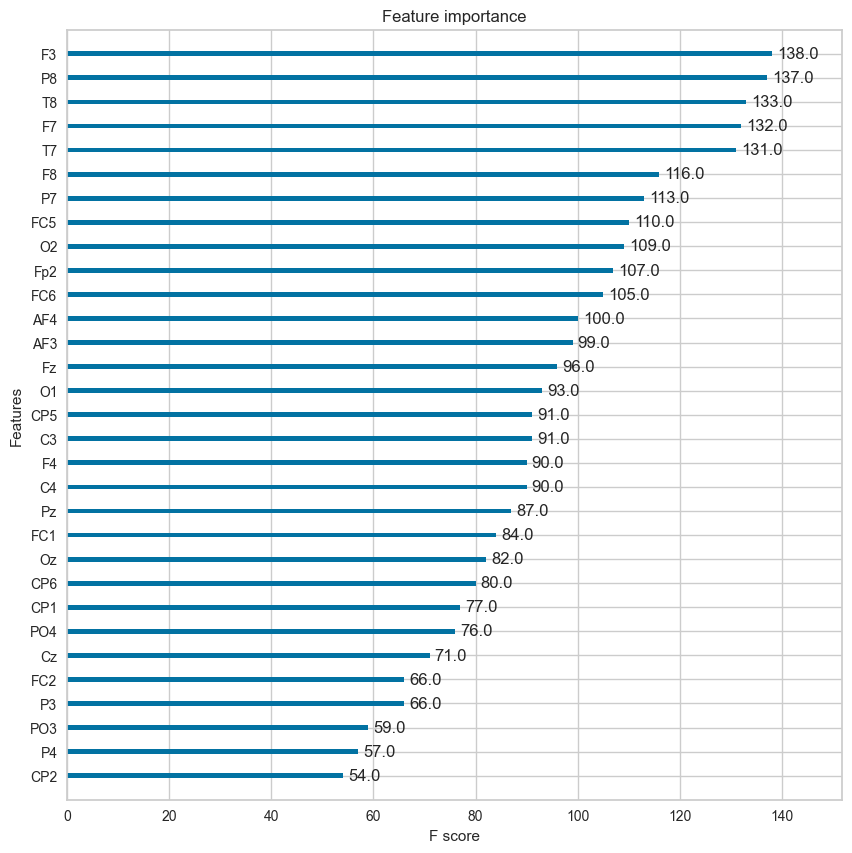

In [202]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

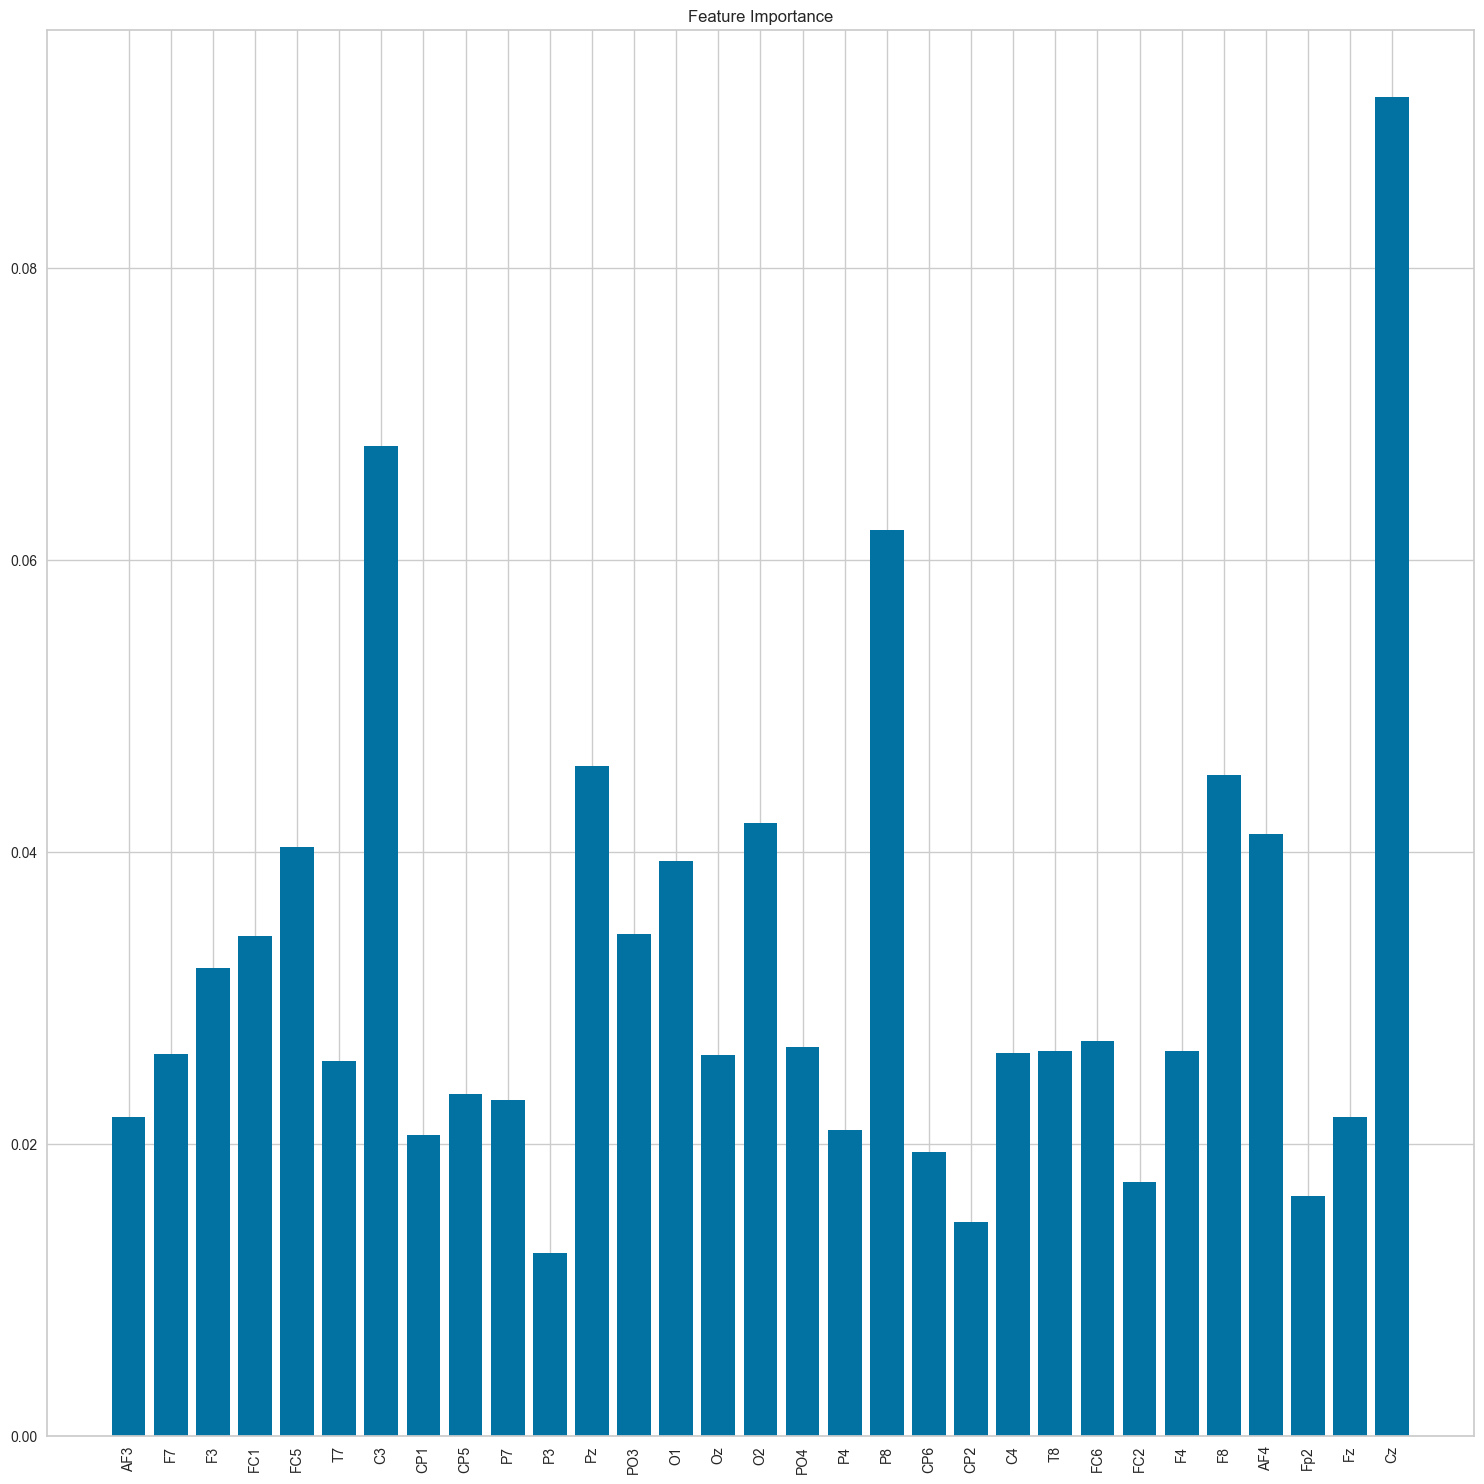

In [203]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

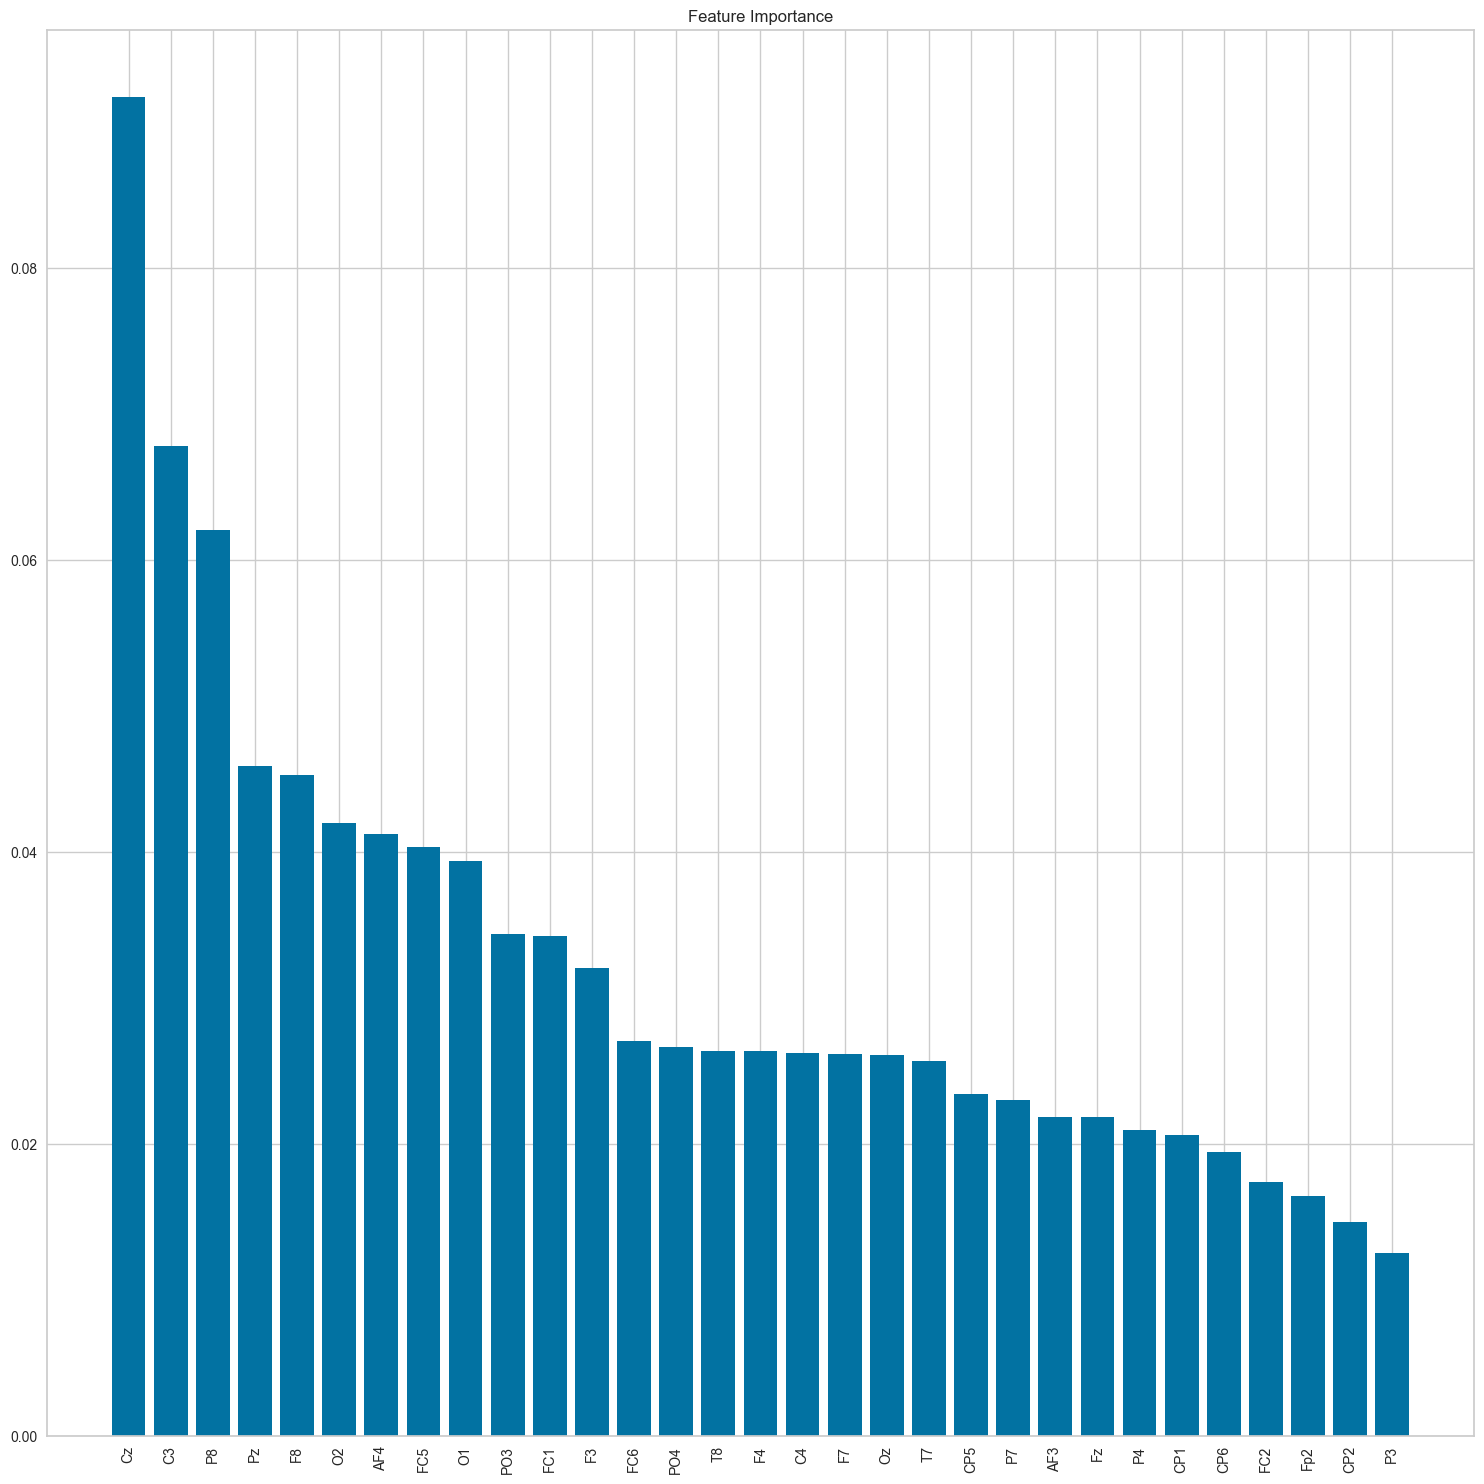

In [204]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [205]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02185409, 0.02622555, 0.03206458, 0.03427577,
       0.04034576, 0.02570375, 0.067853  , 0.02062217, 0.02343494,
       0.02305716, 0.01259031, 0.04594828, 0.03441732, 0.03939676,
       0.02610446, 0.04204404, 0.02667726, 0.02095797, 0.06209127,
       0.01945493, 0.01467273, 0.02628338, 0.02642516, 0.02709676,
       0.01739334, 0.02639852, 0.04533013, 0.04125629, 0.01646273,
       0.02184689, 0.09171472])

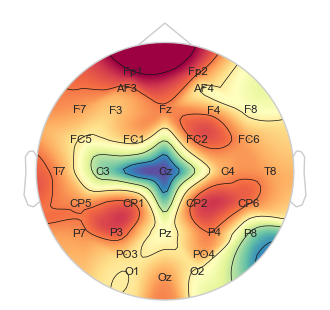

(<matplotlib.image.AxesImage at 0x7ff4c3d019d0>,
 <matplotlib.contour.QuadContourSet at 0x7ff4c3d01df0>)

In [207]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h1>6. Spectral value Decomposition Entropy</h1>

In [466]:
svd_ent_pd['Y'] = 1
svd_ent['Y'] = 0

In [467]:
X1 = svd_ent.append(svd_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.529967,0.539366,0.527758,0.464595,0.282158,0.422801,0.509109,0.374046,0.381118,0.386905,...,0.459894,0.464150,0.441590,0.507674,0.448368,0.504524,0.430233,0.377420,0.400791,0
1,0.535005,0.548887,0.526536,0.446511,0.346221,0.446856,0.488669,0.390457,0.356813,0.374253,...,0.451091,0.498109,0.468871,0.515937,0.472176,0.529462,0.454783,0.414330,0.441255,0
2,0.531044,0.530488,0.529795,0.409225,0.414533,0.467860,0.444595,0.419906,0.351323,0.386837,...,0.403514,0.478669,0.460223,0.522063,0.451558,0.516281,0.452188,0.437111,0.426676,0
3,0.500058,0.510995,0.510104,0.430032,0.378730,0.446007,0.430469,0.373098,0.349073,0.394293,...,0.401542,0.477975,0.443658,0.530759,0.428102,0.500525,0.441247,0.409438,0.395212,0
4,0.498522,0.542266,0.532812,0.493322,0.378598,0.457180,0.448416,0.356879,0.380098,0.383567,...,0.436220,0.479045,0.462598,0.526273,0.458899,0.534873,0.468990,0.427049,0.386795,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.547586,0.551018,0.571649,0.543834,0.425635,0.537477,0.513024,0.520866,0.406936,0.555102,...,0.426722,0.573313,0.565011,0.564971,0.532226,0.558202,0.549144,0.530239,0.526205,1
6275,0.538311,0.523958,0.546031,0.507414,0.470598,0.492824,0.496841,0.462917,0.385585,0.553758,...,0.413891,0.551517,0.546306,0.533835,0.466155,0.524912,0.508151,0.531924,0.518342,1
6276,0.521790,0.524540,0.556388,0.505589,0.486931,0.472965,0.434158,0.399504,0.387511,0.503191,...,0.407788,0.524831,0.512130,0.503333,0.408267,0.492166,0.480565,0.489442,0.440850,1
6277,0.501158,0.540959,0.566654,0.524805,0.430459,0.459756,0.459945,0.429754,0.353804,0.487985,...,0.389701,0.439071,0.426494,0.417063,0.340655,0.442363,0.498081,0.415173,0.418890,1


In [210]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,2696
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [211]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:59:48
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9695,0.9942,0.9774,0.9652,0.9710,0.9389,0.9394,0.1567
et,Extra Trees Classifier,0.9668,0.9950,0.9618,0.9748,0.9681,0.9335,0.9339,0.2267
xgboost,Extreme Gradient Boosting,0.9668,0.9947,0.9683,0.9685,0.9683,0.9334,0.9337,0.3173
lightgbm,Light Gradient Boosting Machine,0.9634,0.9941,0.9661,0.9643,0.9651,0.9266,0.9268,0.1927
rf,Random Forest Classifier,0.9536,0.9899,0.9505,0.9607,0.9554,0.9070,0.9075,0.3300
qda,Quadratic Discriminant Analysis,0.9436,0.9808,0.9396,0.9524,0.9458,0.8869,0.8873,0.1587
gbc,Gradient Boosting Classifier,0.9174,0.9735,0.9227,0.9201,0.9213,0.8344,0.8347,0.5547
dt,Decision Tree Classifier,0.8630,0.8625,0.8723,0.8675,0.8696,0.7253,0.7258,0.1713
ada,Ada Boost Classifier,0.8489,0.9209,0.8745,0.8437,0.8585,0.6966,0.6978,0.2253
lda,Linear Discriminant Analysis,0.7829,0.8634,0.7976,0.7906,0.7935,0.5647,0.5656,0.1627


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [213]:
knn = create_model('knn', fold=15, n_neighbors=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:02:50
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9625,0.9963,0.9935,0.9383,0.9651,0.9246,0.9263
1,0.9727,0.9980,0.9739,0.9739,0.9739,0.9453,0.9453
2,0.9488,0.9851,0.9281,0.9726,0.9498,0.8976,0.8987
3,0.9625,0.9931,0.9608,0.9671,0.9639,0.9248,0.9248
4,0.9727,0.9925,0.9739,0.9739,0.9739,0.9453,0.9453
5,0.9522,0.9946,0.9281,0.9793,0.9530,0.9045,0.9058
6,0.9693,0.9903,0.9869,0.9557,0.9711,0.9384,0.9389
7,0.9727,0.9898,0.9935,0.9560,0.9744,0.9452,0.9460
8,0.9659,0.9945,0.9870,0.9500,0.9682,0.9314,0.9322


In [216]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:07:22
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9625,0.9859,0.9804,0.9494,0.9646,0.9247,0.9252
1,0.9659,0.9978,0.9477,0.9864,0.9667,0.9317,0.9325
2,0.9454,0.9860,0.9150,0.9790,0.9459,0.8909,0.8930
3,0.9590,0.9895,0.9412,0.9796,0.9600,0.9181,0.9188
4,0.9727,0.9933,0.9739,0.9739,0.9739,0.9453,0.9453
5,0.9488,0.9897,0.9020,1.0000,0.9485,0.8979,0.9026
6,0.9659,0.9876,0.9608,0.9735,0.9671,0.9316,0.9317
7,0.9727,0.9909,0.9869,0.9618,0.9742,0.9452,0.9456
8,0.9761,0.9943,0.9675,0.9868,0.9770,0.9521,0.9523


Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [217]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [218]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')


<h2> KNN giving 97.02% accuracy </h2>

In [215]:
xgb = create_model('xgboost', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:03:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9727,0.9979,0.9869,0.9618,0.9742,0.9452,0.9456
1,0.9693,0.9949,0.9608,0.9800,0.9703,0.9385,0.9387
2,0.9522,0.9870,0.9477,0.9603,0.9539,0.9043,0.9044
3,0.9590,0.9944,0.9477,0.9732,0.9603,0.9180,0.9184
4,0.9386,0.9846,0.9477,0.9355,0.9416,0.8768,0.8769
5,0.9522,0.9955,0.9542,0.9542,0.9542,0.9042,0.9042
6,0.9795,0.9989,0.9739,0.9868,0.9803,0.9590,0.9591
7,0.9659,0.9931,0.9869,0.9497,0.9679,0.9315,0.9323
8,0.9693,0.9952,0.9610,0.9801,0.9705,0.9385,0.9387


In [468]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [469]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.539366,0.527758,0.464595,0.282158,0.422801,0.509109,0.374046,0.381118,0.386905,0.411902,...,0.436567,0.459894,0.464150,0.441590,0.507674,0.448368,0.504524,0.430233,0.377420,0.400791
1,0.548887,0.526536,0.446511,0.346221,0.446856,0.488669,0.390457,0.356813,0.374253,0.377156,...,0.413001,0.451091,0.498109,0.468871,0.515937,0.472176,0.529462,0.454783,0.414330,0.441255
2,0.530488,0.529795,0.409225,0.414533,0.467860,0.444595,0.419906,0.351323,0.386837,0.400686,...,0.384905,0.403514,0.478669,0.460223,0.522063,0.451558,0.516281,0.452188,0.437111,0.426676
3,0.510995,0.510104,0.430032,0.378730,0.446007,0.430469,0.373098,0.349073,0.394293,0.364870,...,0.402693,0.401542,0.477975,0.443658,0.530759,0.428102,0.500525,0.441247,0.409438,0.395212
4,0.542266,0.532812,0.493322,0.378598,0.457180,0.448416,0.356879,0.380098,0.383567,0.332453,...,0.434864,0.436220,0.479045,0.462598,0.526273,0.458899,0.534873,0.468990,0.427049,0.386795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.551018,0.571649,0.543834,0.425635,0.537477,0.513024,0.520866,0.406936,0.555102,0.551968,...,0.556287,0.426722,0.573313,0.565011,0.564971,0.532226,0.558202,0.549144,0.530239,0.526205
6275,0.523958,0.546031,0.507414,0.470598,0.492824,0.496841,0.462917,0.385585,0.553758,0.560986,...,0.529113,0.413891,0.551517,0.546306,0.533835,0.466155,0.524912,0.508151,0.531924,0.518342
6276,0.524540,0.556388,0.505589,0.486931,0.472965,0.434158,0.399504,0.387511,0.503191,0.516186,...,0.487940,0.407788,0.524831,0.512130,0.503333,0.408267,0.492166,0.480565,0.489442,0.440850
6277,0.540959,0.566654,0.524805,0.430459,0.459756,0.459945,0.429754,0.353804,0.487985,0.524868,...,0.418585,0.389701,0.439071,0.426494,0.417063,0.340655,0.442363,0.498081,0.415173,0.418890


In [470]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [472]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
1831,0.526511,0.492333,0.482465,0.437810,0.448600,0.406529,0.396584,0.337202,0.399115,0.421404,...,0.379051,0.389054,0.321436,0.364231,0.467326,0.455225,0.473156,0.416239,0.436401,0.365328
1796,0.379982,0.334224,0.415308,0.403070,0.358920,0.381000,0.286026,0.380852,0.426595,0.415097,...,0.439087,0.473060,0.419652,0.344523,0.316143,0.392976,0.342966,0.404395,0.325343,0.401927
6232,0.377076,0.350572,0.358379,0.323978,0.382423,0.351249,0.392997,0.303166,0.361075,0.370539,...,0.365256,0.364398,0.350447,0.368196,0.365526,0.361784,0.353263,0.349676,0.354503,0.392374
4868,0.343933,0.310503,0.333306,0.381572,0.439672,0.402432,0.406136,0.359572,0.356114,0.348414,...,0.398344,0.378881,0.398947,0.388329,0.378805,0.329184,0.366223,0.350913,0.373888,0.383981
2715,0.549421,0.536599,0.520258,0.475096,0.465416,0.502703,0.473308,0.471610,0.518059,0.459303,...,0.552769,0.568930,0.479017,0.518743,0.487411,0.500823,0.480716,0.528725,0.500014,0.472981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.491850,0.452893,0.503810,0.420533,0.482058,0.445711,0.394670,0.369872,0.387884,0.424438,...,0.414080,0.482382,0.479440,0.470358,0.492192,0.426463,0.557937,0.534186,0.403693,0.232892
4060,0.493269,0.456069,0.468531,0.398585,0.475667,0.412433,0.408390,0.420447,0.397434,0.402359,...,0.443936,0.451951,0.472755,0.429347,0.481266,0.366375,0.480701,0.453833,0.408179,0.384657
1346,0.311477,0.289509,0.398776,0.304382,0.291799,0.324887,0.311281,0.287340,0.302757,0.350995,...,0.326680,0.287090,0.285951,0.320445,0.350368,0.275789,0.345237,0.307207,0.287583,0.366272
3454,0.434557,0.397065,0.454743,0.475105,0.434812,0.425136,0.476468,0.432356,0.430033,0.445999,...,0.421066,0.392462,0.434854,0.474853,0.474797,0.424755,0.481386,0.468001,0.474173,0.400524


<h2>KNN</h2>

In [473]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9599614085865895


<h2>XGBoost</h2>


In [474]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 94.93%


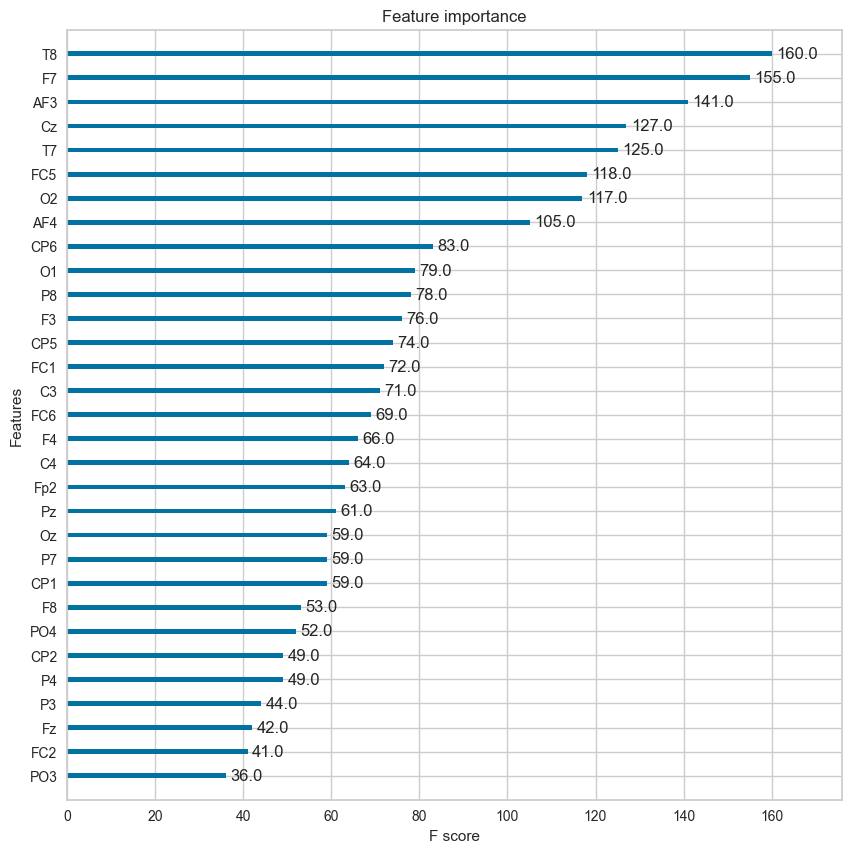

In [475]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

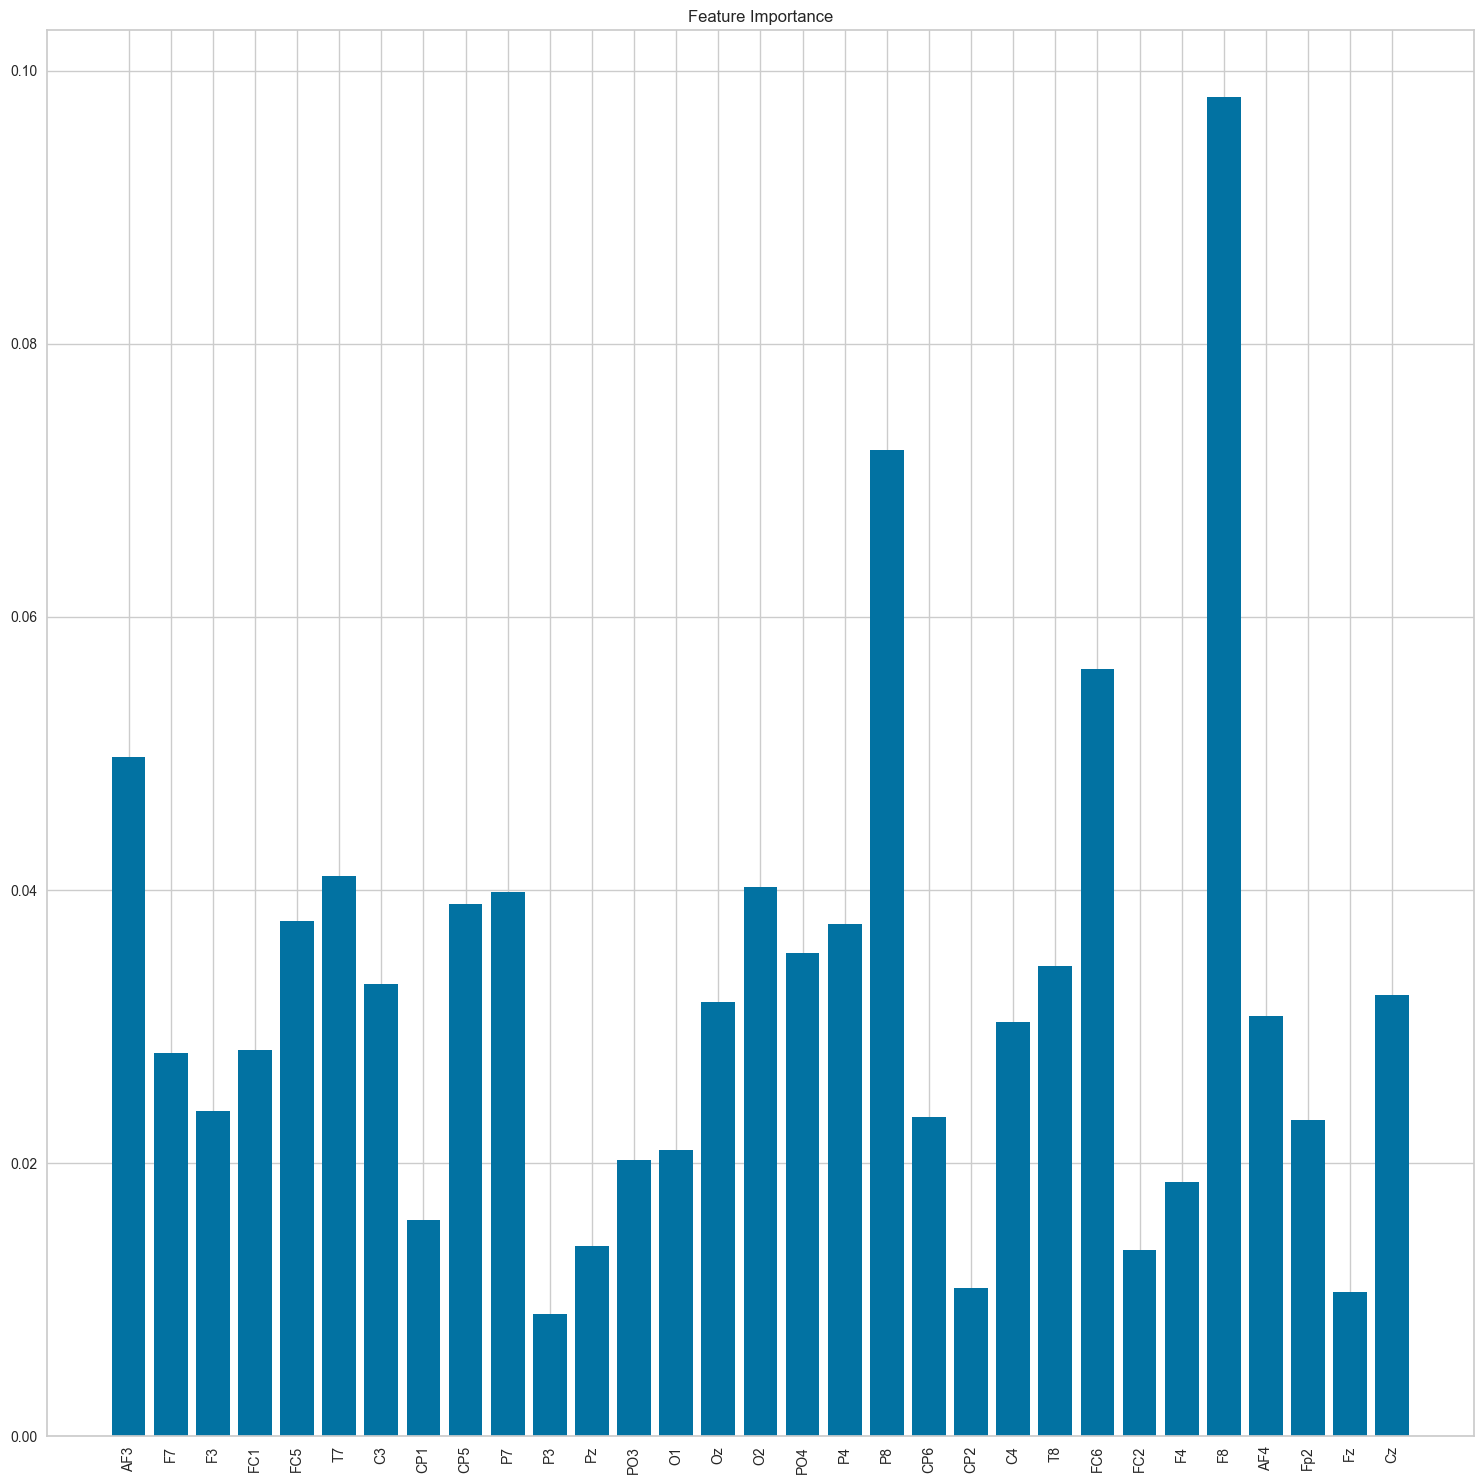

In [476]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

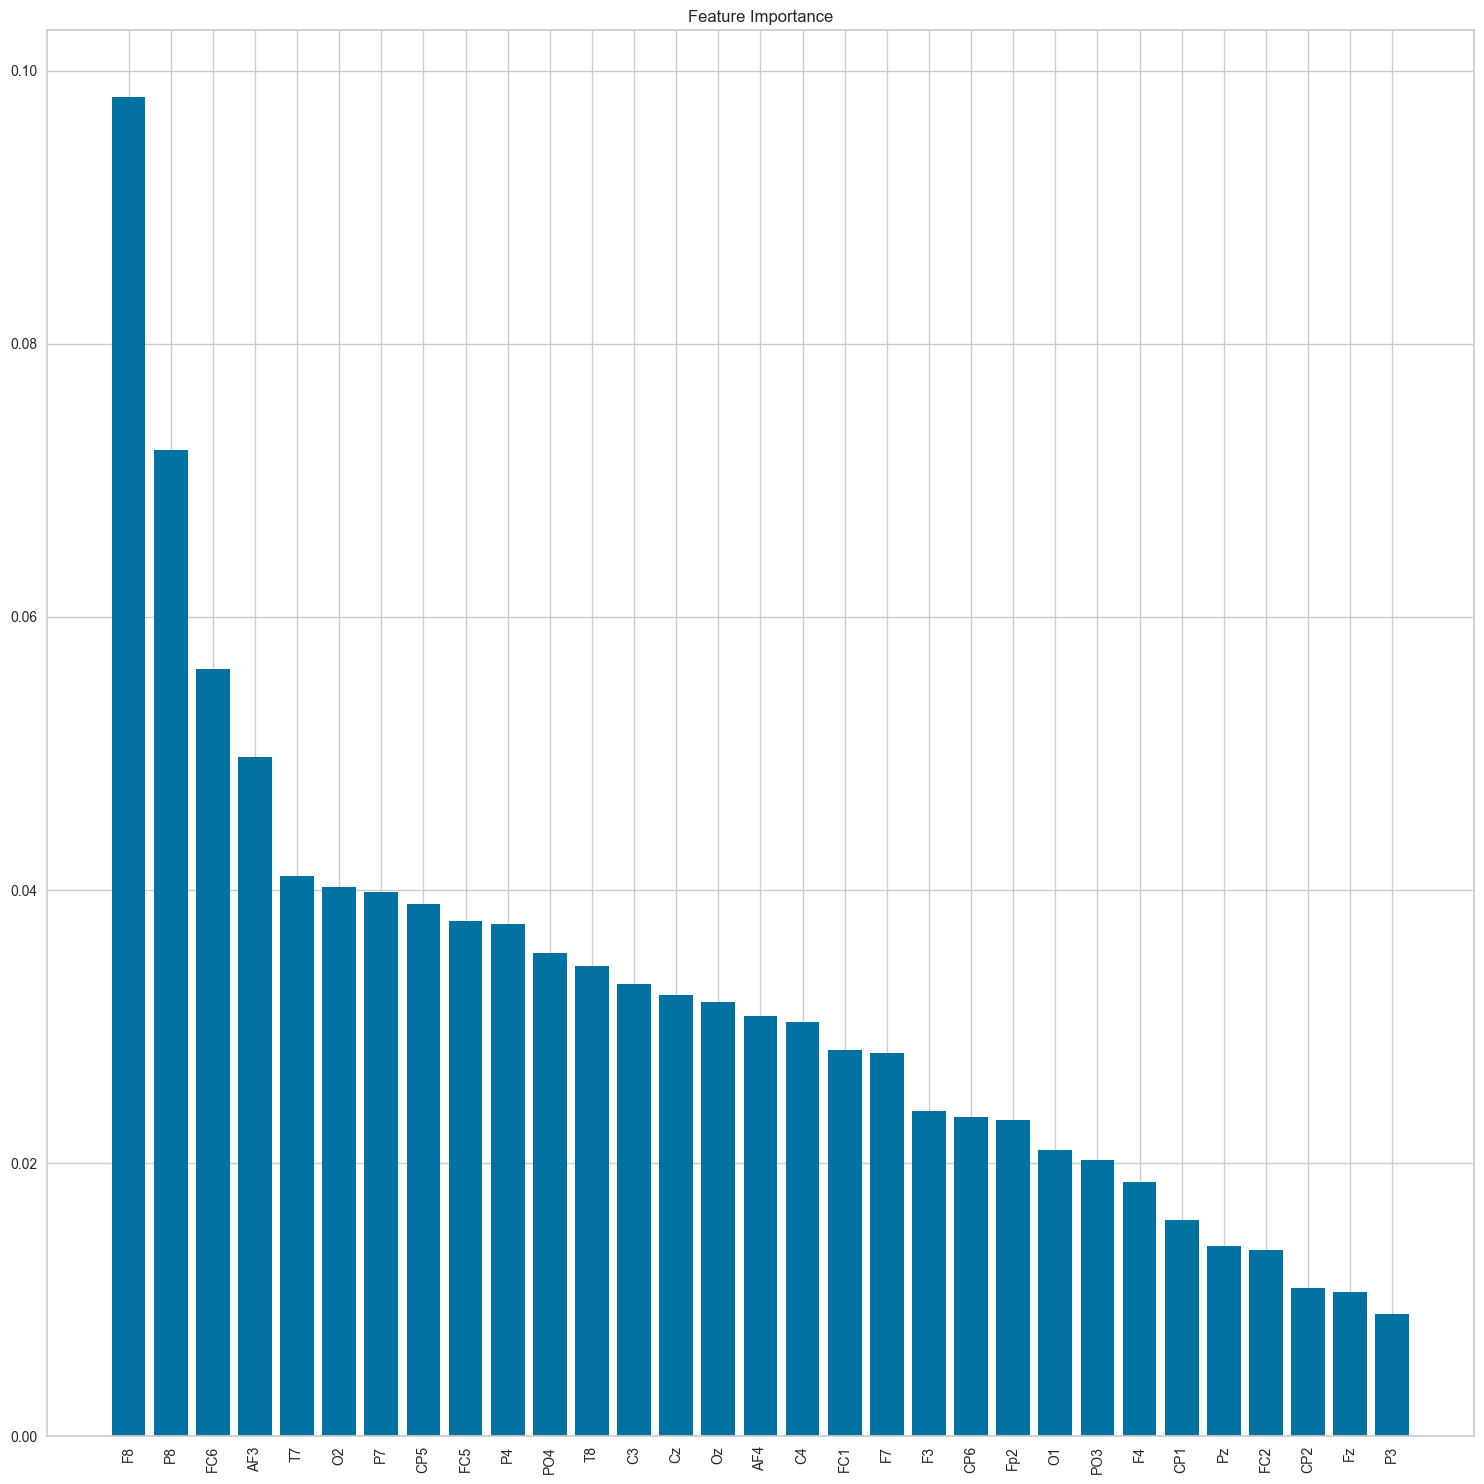

In [477]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [478]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.04971521, 0.02809789, 0.02383783, 0.02828389,
       0.03774773, 0.04102275, 0.03313748, 0.01584365, 0.03894699,
       0.03984794, 0.00898095, 0.01393573, 0.02024287, 0.02094855,
       0.03178583, 0.04021851, 0.03535608, 0.03752709, 0.0722311 ,
       0.02337812, 0.01084133, 0.03033852, 0.0344655 , 0.05614987,
       0.0136517 , 0.01862239, 0.09803835, 0.0307638 , 0.02316692,
       0.01058873, 0.03228675])

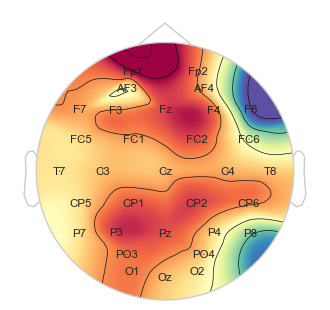

(<matplotlib.image.AxesImage at 0x7ff480acd700>,
 <matplotlib.contour.QuadContourSet at 0x7ff480acd970>)

In [479]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>7. Approximate Entropy</h2>

In [452]:
app_ent_pd['Y'] = 1
app_ent['Y'] = 0

In [453]:
X1 = app_ent.append(app_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.610411,0.642924,0.589564,0.602535,0.453750,0.589373,0.640792,0.550823,0.561744,0.575488,...,0.607194,0.608474,0.598221,0.615814,0.613941,0.639630,0.589540,0.539424,0.593626,0
1,0.631742,0.624007,0.583300,0.600440,0.501825,0.603691,0.592570,0.565088,0.518869,0.509042,...,0.579099,0.622555,0.612870,0.606582,0.621748,0.601368,0.628957,0.577487,0.573737,0
2,0.619658,0.606878,0.628907,0.579139,0.560828,0.592921,0.598157,0.583187,0.535865,0.549044,...,0.529712,0.640217,0.595549,0.591374,0.609482,0.609846,0.603894,0.595922,0.591699,0
3,0.612480,0.605467,0.611438,0.596316,0.555964,0.605607,0.592091,0.525253,0.519665,0.581487,...,0.560009,0.627245,0.577747,0.632477,0.614384,0.606022,0.580240,0.565595,0.594547,0
4,0.609542,0.616629,0.600521,0.618706,0.564874,0.608052,0.586137,0.485257,0.532070,0.544919,...,0.581157,0.590898,0.613469,0.646064,0.613004,0.639975,0.591528,0.588554,0.570539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.559856,0.564580,0.619098,0.584677,0.551314,0.423656,0.588101,0.585162,0.560591,0.595996,...,0.560214,0.318738,0.544607,0.510428,0.520252,0.509827,0.558862,0.551070,0.572250,1
6275,0.574731,0.550820,0.581039,0.571767,0.591316,0.557240,0.588019,0.594410,0.558373,0.576969,...,0.530418,0.474155,0.523841,0.514771,0.542708,0.477749,0.556813,0.575013,0.575131,1
6276,0.615313,0.619284,0.593862,0.631757,0.603706,0.624309,0.617012,0.580885,0.551006,0.628169,...,0.484352,0.396401,0.447911,0.439859,0.506155,0.482840,0.581779,0.547209,0.542916,1
6277,0.605432,0.597184,0.616120,0.604739,0.573744,0.622316,0.590125,0.575291,0.507842,0.619105,...,0.570693,0.542583,0.578237,0.542234,0.550015,0.583681,0.606808,0.597530,0.601903,1


In [454]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,2525
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [455]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:25:44
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8812,0.9467,0.8883,0.8855,0.8868,0.7619,0.7621,0.5720
lightgbm,Light Gradient Boosting Machine,0.8749,0.9441,0.8779,0.8827,0.8802,0.7492,0.7495,0.4533
knn,K Neighbors Classifier,0.8669,0.9383,0.9157,0.8437,0.8781,0.7320,0.7354,0.3800
et,Extra Trees Classifier,0.8669,0.9403,0.8710,0.8747,0.8726,0.7332,0.7338,0.4500
rf,Random Forest Classifier,0.8485,0.9250,0.8384,0.8678,0.8527,0.6968,0.6975,0.5653
gbc,Gradient Boosting Classifier,0.8280,0.9048,0.8345,0.8368,0.8355,0.6553,0.6555,0.7380
qda,Quadratic Discriminant Analysis,0.7882,0.8859,0.8957,0.7495,0.8158,0.5711,0.5845,0.3900
ada,Ada Boost Classifier,0.7656,0.8388,0.7902,0.7691,0.7794,0.5296,0.5300,0.5133
dt,Decision Tree Classifier,0.7208,0.7198,0.7406,0.7306,0.7350,0.4399,0.4407,0.3987
ridge,Ridge Classifier,0.6926,0.0000,0.7284,0.6995,0.7128,0.3824,0.3838,0.3867


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [456]:
knn = create_model('knn', fold=15, n_neighbors=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:27:43
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8703,0.9427,0.9150,0.8485,0.8805,0.7392,0.7417
1,0.8498,0.9299,0.8562,0.8562,0.8562,0.6991,0.6991
2,0.8737,0.9404,0.9412,0.8372,0.8862,0.7455,0.7519
3,0.8703,0.9264,0.9281,0.8402,0.8820,0.7388,0.7433
4,0.8430,0.9293,0.9085,0.8129,0.8580,0.6837,0.6890
5,0.8874,0.9475,0.9412,0.8571,0.8972,0.7733,0.7774
6,0.8464,0.9229,0.8954,0.8253,0.8589,0.6910,0.6938
7,0.8703,0.9400,0.9085,0.8528,0.8797,0.7393,0.7411
8,0.8532,0.9381,0.8896,0.8405,0.8644,0.7048,0.7061


In [226]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:14:26
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8874,0.9463,0.9216,0.8704,0.8952,0.7737,0.7752
1,0.8703,0.9492,0.9477,0.8286,0.8841,0.7384,0.7470
2,0.9078,0.9580,0.9412,0.8889,0.9143,0.8148,0.8164
3,0.8908,0.9410,0.9346,0.8667,0.8994,0.7803,0.7830
4,0.8737,0.9574,0.9477,0.8333,0.8869,0.7453,0.7532
5,0.8669,0.9493,0.8889,0.8608,0.8746,0.7329,0.7333
6,0.8703,0.9455,0.9477,0.8286,0.8841,0.7384,0.7470
7,0.8942,0.9638,0.9412,0.8675,0.9028,0.7871,0.7903
8,0.8703,0.9455,0.8831,0.8718,0.8774,0.7398,0.7398


Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [227]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [228]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='distance')


In [229]:
xgb = create_model('xgboost', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:15:06
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8874,0.9528,0.8627,0.9167,0.8889,0.7749,0.7764
1,0.8976,0.9536,0.8889,0.9128,0.9007,0.7951,0.7954
2,0.8362,0.9243,0.8039,0.8723,0.8367,0.6729,0.6752
3,0.8908,0.9429,0.8954,0.8954,0.8954,0.7811,0.7811
4,0.8430,0.9303,0.8889,0.8242,0.8553,0.6842,0.6866
5,0.8464,0.9387,0.8562,0.8506,0.8534,0.6921,0.6921
6,0.8874,0.9663,0.8954,0.8896,0.8925,0.7742,0.7742
7,0.8942,0.9567,0.8889,0.9067,0.8977,0.7882,0.7883
8,0.8669,0.9380,0.8571,0.8859,0.8713,0.7336,0.7340


In [457]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [458]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [459]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8639652677279306


In [460]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.30%


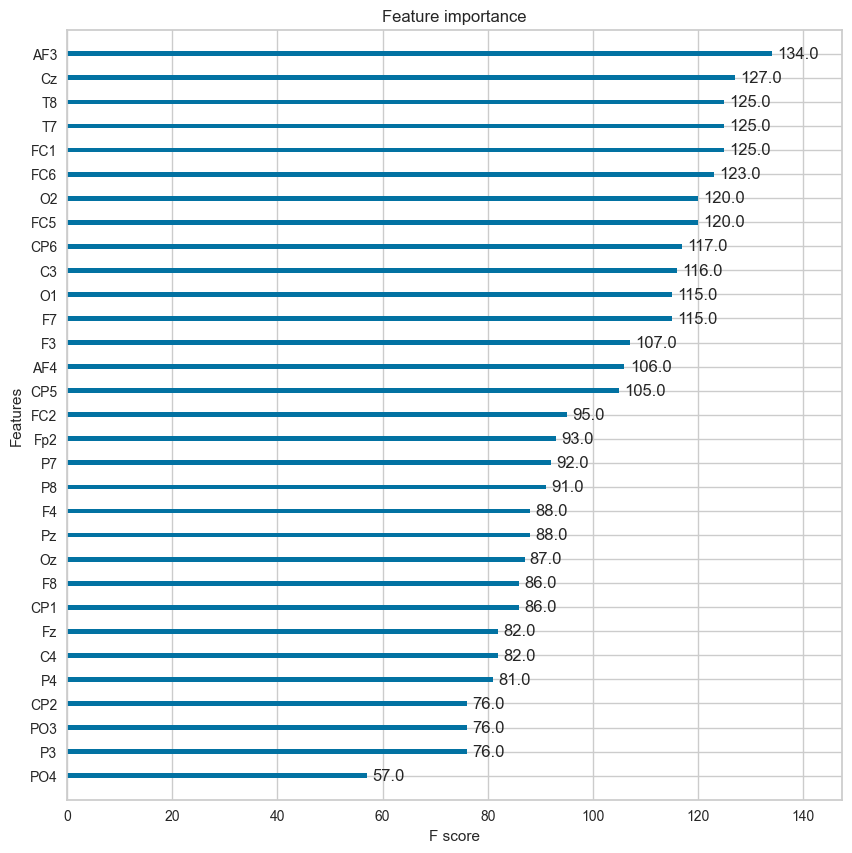

In [461]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

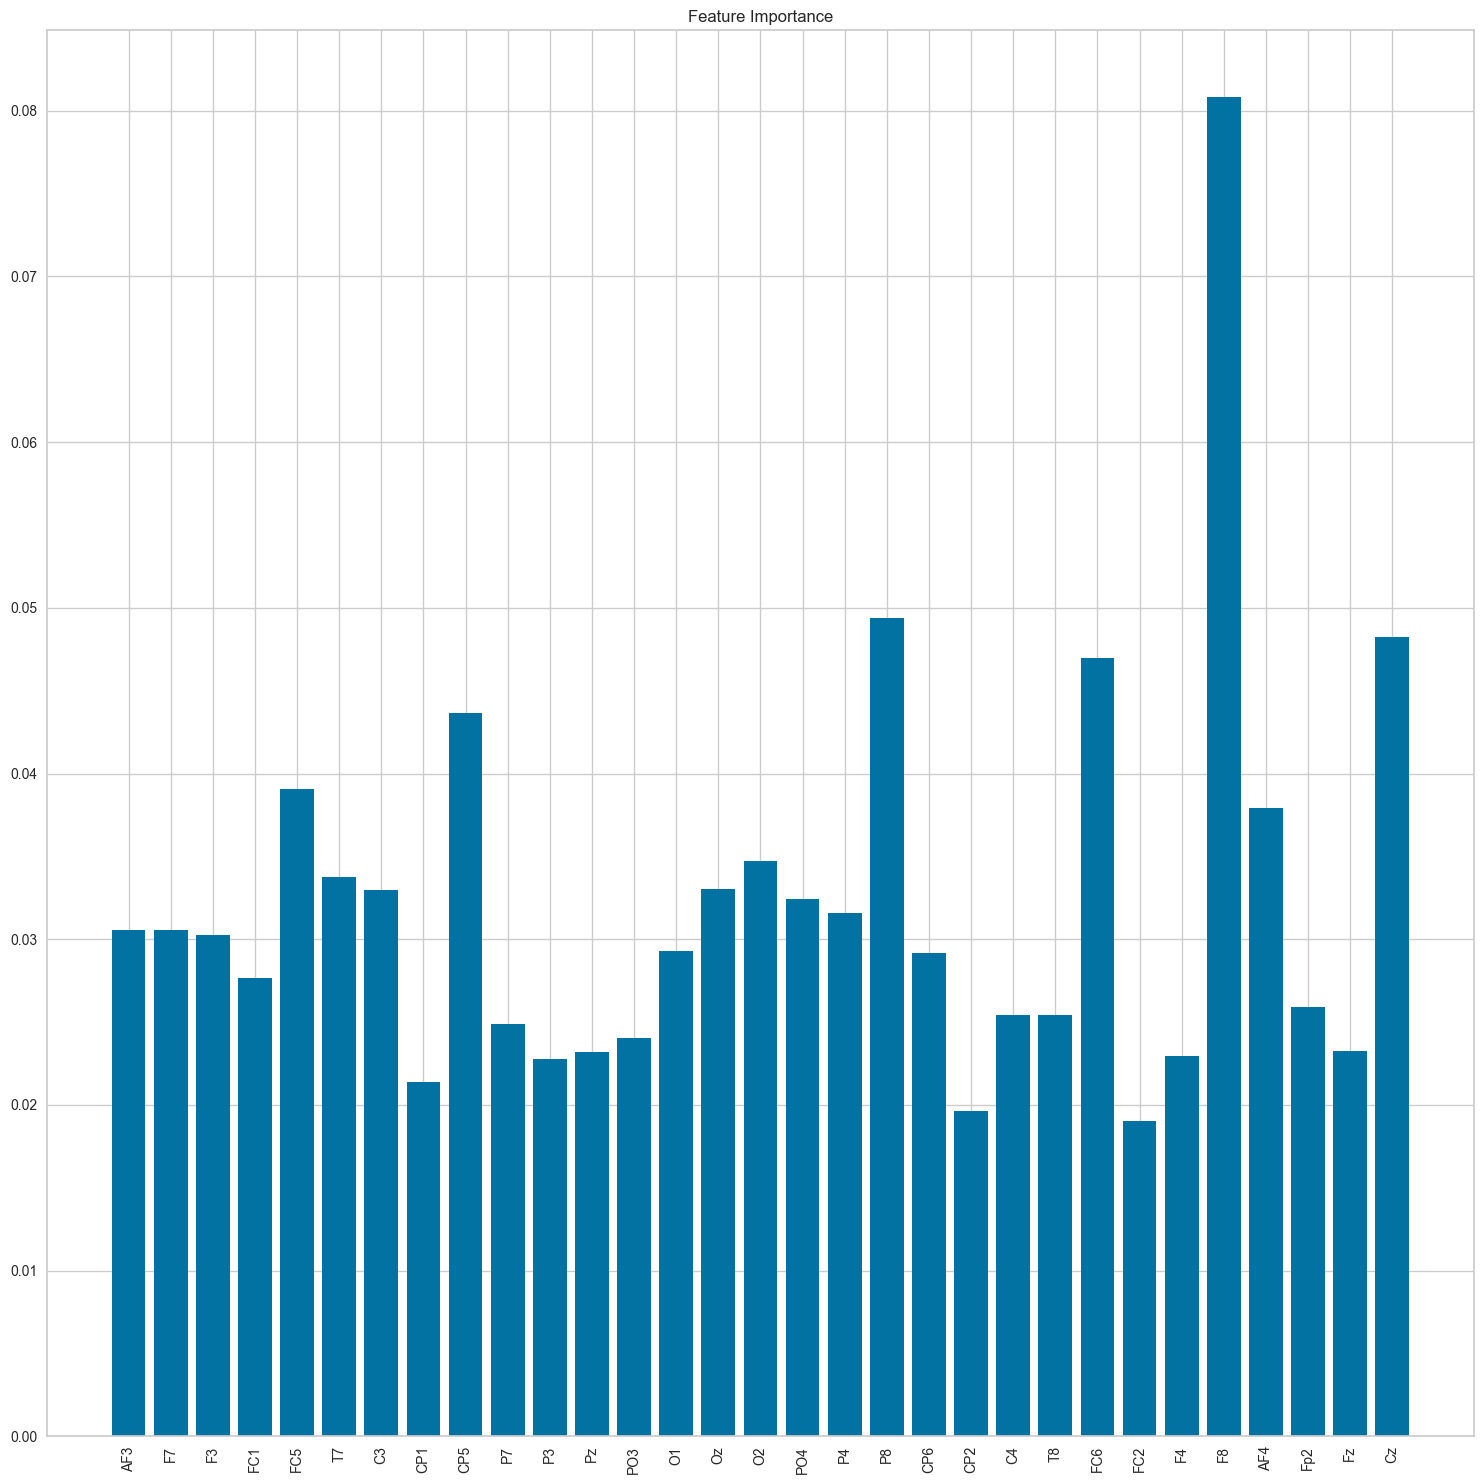

In [462]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

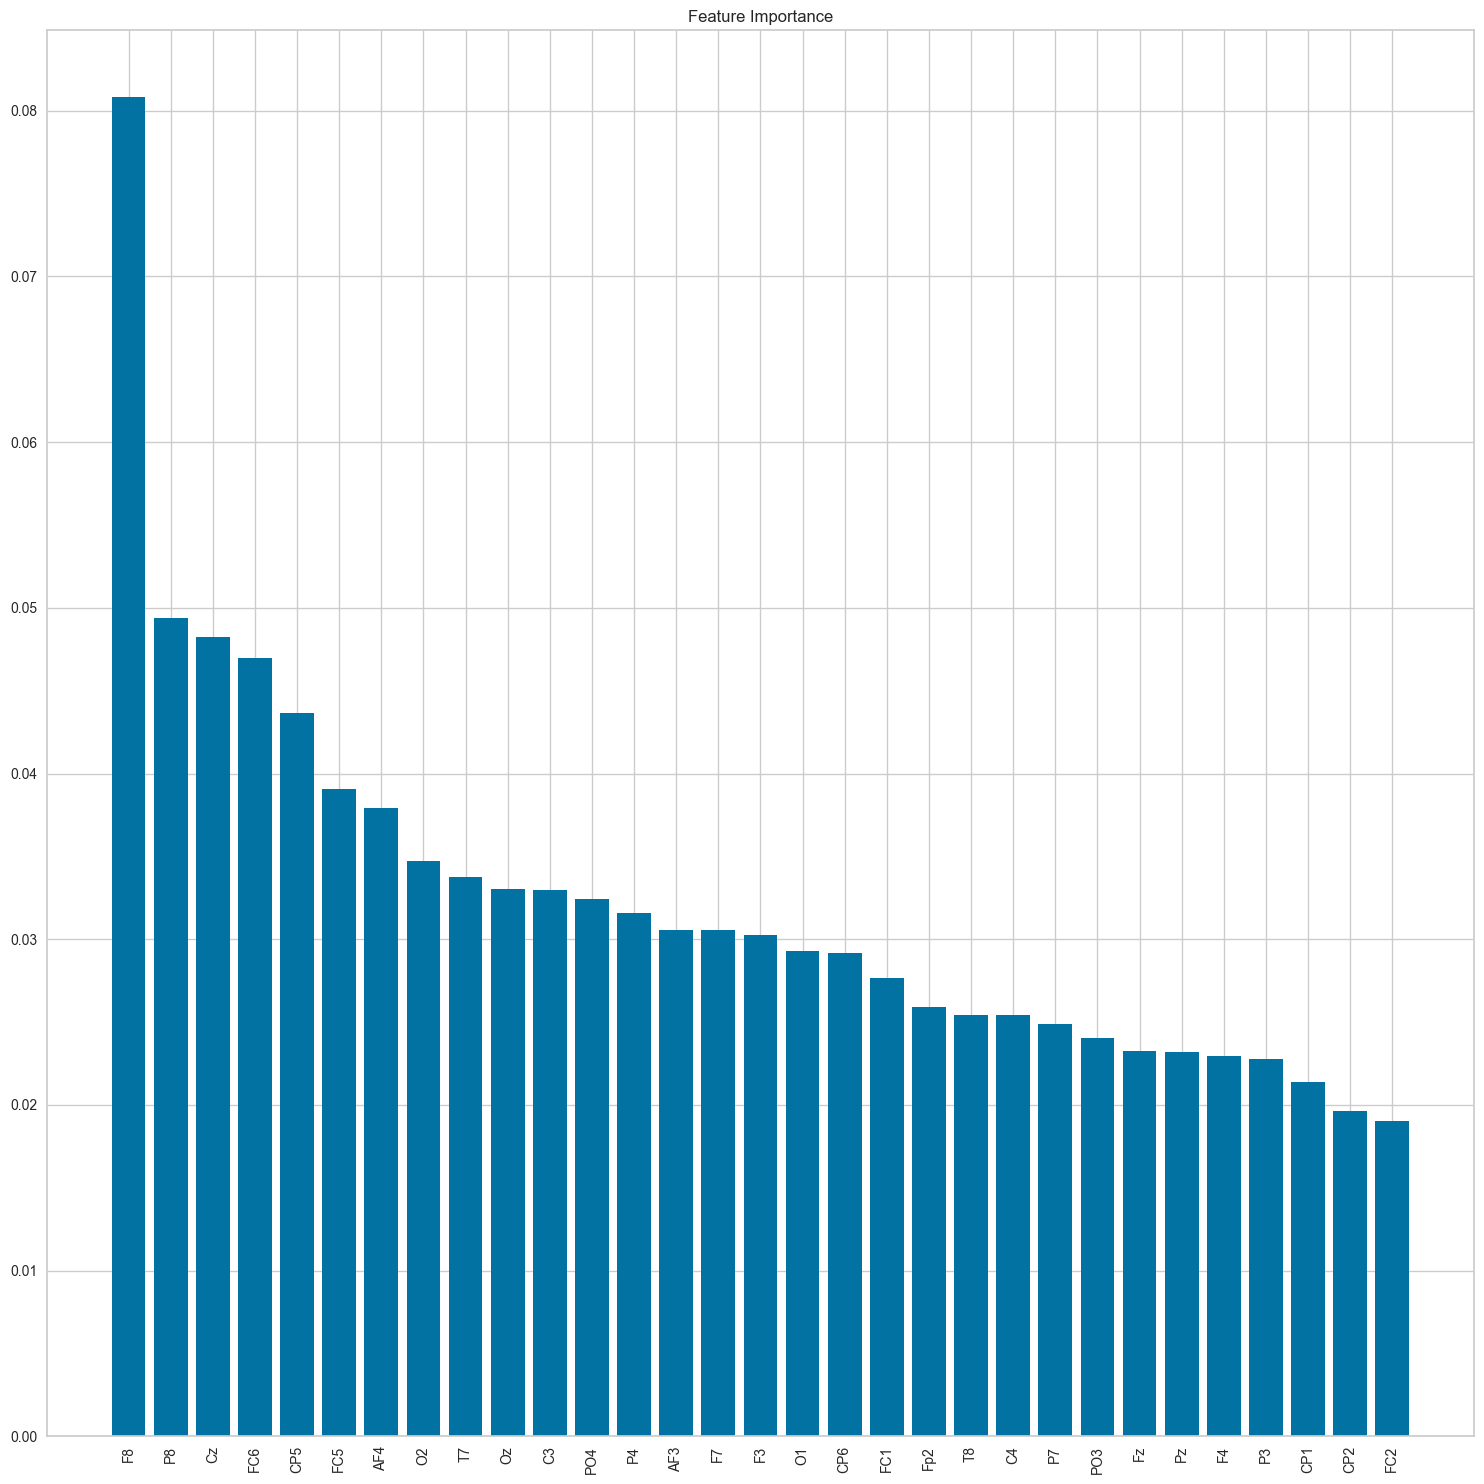

In [463]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [464]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.0305621 , 0.03053088, 0.03024839, 0.02763779,
       0.03904882, 0.033753  , 0.0329976 , 0.02137777, 0.04365533,
       0.02490448, 0.02278793, 0.02322349, 0.02405404, 0.02928702,
       0.03301079, 0.03470638, 0.03243621, 0.03157682, 0.04936751,
       0.02918527, 0.01966644, 0.02540263, 0.02544369, 0.04698461,
       0.01901473, 0.02298544, 0.08080661, 0.03794678, 0.0259146 ,
       0.02327162, 0.04821127])

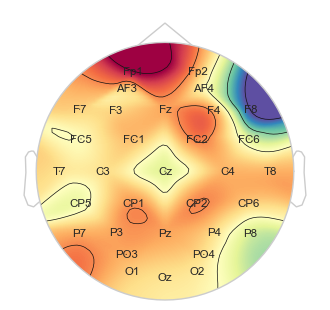

(<matplotlib.image.AxesImage at 0x7ff4c0bc62e0>,
 <matplotlib.contour.QuadContourSet at 0x7ff4713d6190>)

In [465]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>8. Sample Entropy</h2>

In [480]:
samp_ent_pd['Y'] = 1
samp_ent['Y'] = 0

In [481]:
X1 = samp_ent.append(samp_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.635505,0.675475,0.632293,0.607059,0.409720,0.560590,0.661365,0.493553,0.536903,0.559682,...,0.599525,0.626602,0.577167,0.620716,0.611831,0.664852,0.571733,0.523159,0.582839,0
1,0.662982,0.657561,0.607073,0.593159,0.471909,0.575438,0.612369,0.503456,0.476502,0.476978,...,0.565343,0.635604,0.594005,0.611723,0.620631,0.644453,0.638510,0.553345,0.552900,0
2,0.615671,0.624459,0.643841,0.572142,0.548139,0.597600,0.581086,0.548039,0.482330,0.480403,...,0.488952,0.630596,0.557321,0.615001,0.579638,0.620753,0.609004,0.579253,0.564903,0
3,0.601203,0.610584,0.623453,0.586060,0.516135,0.588456,0.584474,0.512902,0.500558,0.568000,...,0.508382,0.653940,0.565003,0.642720,0.578503,0.615139,0.584260,0.543843,0.560169,0
4,0.593931,0.643593,0.610041,0.634578,0.522419,0.609520,0.568559,0.459251,0.527358,0.488449,...,0.580938,0.589456,0.591703,0.677893,0.600483,0.668732,0.578970,0.584522,0.517297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.508769,0.498392,0.633724,0.540409,0.484496,0.234276,0.570089,0.532144,0.518867,0.652121,...,0.533628,0.309170,0.517385,0.452375,0.473901,0.469747,0.522877,0.539499,0.519439,1
6275,0.526670,0.521633,0.565660,0.528607,0.576633,0.514899,0.592937,0.574685,0.524929,0.602197,...,0.408111,0.258825,0.477881,0.374989,0.376441,0.355786,0.482096,0.528061,0.554061,1
6276,0.650262,0.638249,0.617898,0.649666,0.592745,0.646893,0.656266,0.516632,0.485260,0.667658,...,0.381911,0.227540,0.364944,0.277799,0.346854,0.360264,0.558392,0.522139,0.481414,1
6277,0.607222,0.614105,0.635399,0.601609,0.533186,0.633521,0.575725,0.523897,0.487198,0.611823,...,0.536956,0.467142,0.533507,0.478821,0.495083,0.563253,0.638489,0.561531,0.537749,1


In [234]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,6498
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [235]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:20:18
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8976,0.9593,0.9374,0.8766,0.9056,0.7940,0.7970,0.2240
xgboost,Extreme Gradient Boosting,0.8935,0.9599,0.9001,0.8972,0.8985,0.7865,0.7869,0.3907
lightgbm,Light Gradient Boosting Machine,0.8933,0.9594,0.9001,0.8972,0.8983,0.7860,0.7868,0.2640
et,Extra Trees Classifier,0.8867,0.9558,0.9018,0.8844,0.8929,0.7726,0.7732,0.3133
rf,Random Forest Classifier,0.8735,0.9454,0.8831,0.8771,0.8796,0.7463,0.7471,0.4007
gbc,Gradient Boosting Classifier,0.8491,0.9246,0.8714,0.8458,0.8581,0.6971,0.6980,0.6313
qda,Quadratic Discriminant Analysis,0.8437,0.9222,0.9014,0.8188,0.8580,0.6851,0.6893,0.2273
ada,Ada Boost Classifier,0.7738,0.8558,0.8062,0.7722,0.7886,0.5457,0.5467,0.2913
dt,Decision Tree Classifier,0.7522,0.7520,0.7549,0.7679,0.7610,0.5038,0.5043,0.2353
lr,Logistic Regression,0.7149,0.7800,0.7402,0.7227,0.7310,0.4278,0.4284,0.2253


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [236]:
knn = create_model('knn', fold=15, n_neighbors=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:21:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9044,0.9641,0.9216,0.8981,0.9097,0.8083,0.8086
1,0.8771,0.9397,0.9216,0.8545,0.8868,0.7529,0.7554
2,0.9010,0.9586,0.9216,0.8924,0.9068,0.8014,0.8018
3,0.9113,0.9760,0.9542,0.8848,0.9182,0.8215,0.8243
4,0.8908,0.9548,0.9608,0.8497,0.9018,0.7798,0.7873
5,0.8840,0.9536,0.9412,0.8521,0.8944,0.7663,0.7710
6,0.8976,0.9636,0.9477,0.8683,0.9062,0.7939,0.7976
7,0.9010,0.9592,0.9216,0.8924,0.9068,0.8014,0.8018
8,0.9010,0.9621,0.8961,0.9139,0.9049,0.8017,0.8019


In [237]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:21:36
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9649,0.9085,0.9205,0.9145,0.8223,0.8224
1,0.8737,0.9413,0.8758,0.8816,0.8787,0.7470,0.7470
2,0.8942,0.9538,0.8824,0.9122,0.8970,0.7883,0.7888
3,0.9044,0.9733,0.9216,0.8981,0.9097,0.8083,0.8086
4,0.8908,0.9497,0.9216,0.8758,0.8981,0.7806,0.7818
5,0.9044,0.9590,0.9085,0.9085,0.9085,0.8085,0.8085
6,0.8908,0.9619,0.8954,0.8954,0.8954,0.7811,0.7811
7,0.9078,0.9584,0.9150,0.9091,0.9121,0.8153,0.8153
8,0.9044,0.9669,0.8831,0.9315,0.9067,0.8089,0.8101


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9649,0.9085,0.9205,0.9145,0.8223,0.8224
1,0.8737,0.9413,0.8758,0.8816,0.8787,0.7470,0.7470
2,0.8942,0.9538,0.8824,0.9122,0.8970,0.7883,0.7888
3,0.9044,0.9733,0.9216,0.8981,0.9097,0.8083,0.8086
4,0.8908,0.9497,0.9216,0.8758,0.8981,0.7806,0.7818
5,0.9044,0.9590,0.9085,0.9085,0.9085,0.8085,0.8085
6,0.8908,0.9619,0.8954,0.8954,0.8954,0.7811,0.7811
7,0.9078,0.9584,0.9150,0.9091,0.9121,0.8153,0.8153
8,0.9044,0.9669,0.8831,0.9315,0.9067,0.8089,0.8101


Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [238]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [239]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='uniform')


In [240]:
xgb = create_model('xgboost', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:22:21
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8737,0.9498,0.8627,0.8919,0.8771,0.7473,0.7478
1,0.8805,0.9494,0.8824,0.8882,0.8852,0.7607,0.7607
2,0.8840,0.9531,0.8693,0.9048,0.8867,0.7679,0.7685
3,0.9147,0.9616,0.9346,0.9051,0.9196,0.8288,0.8292
4,0.8908,0.9643,0.9150,0.8805,0.8974,0.7807,0.7814
5,0.8840,0.9514,0.9085,0.8742,0.8910,0.7670,0.7677
6,0.8737,0.9577,0.8758,0.8816,0.8787,0.7470,0.7470
7,0.9044,0.9719,0.9216,0.8981,0.9097,0.8083,0.8086
8,0.8874,0.9625,0.8766,0.9060,0.8911,0.7745,0.7750


In [482]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [483]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [484]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8822961890979257


In [485]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.73%


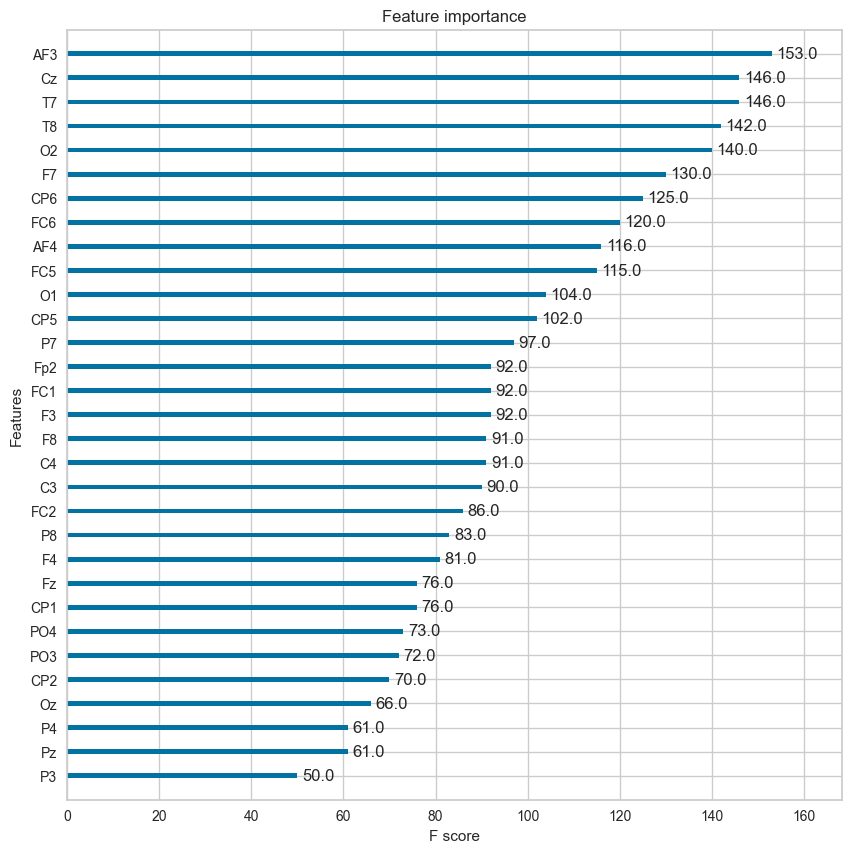

In [486]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

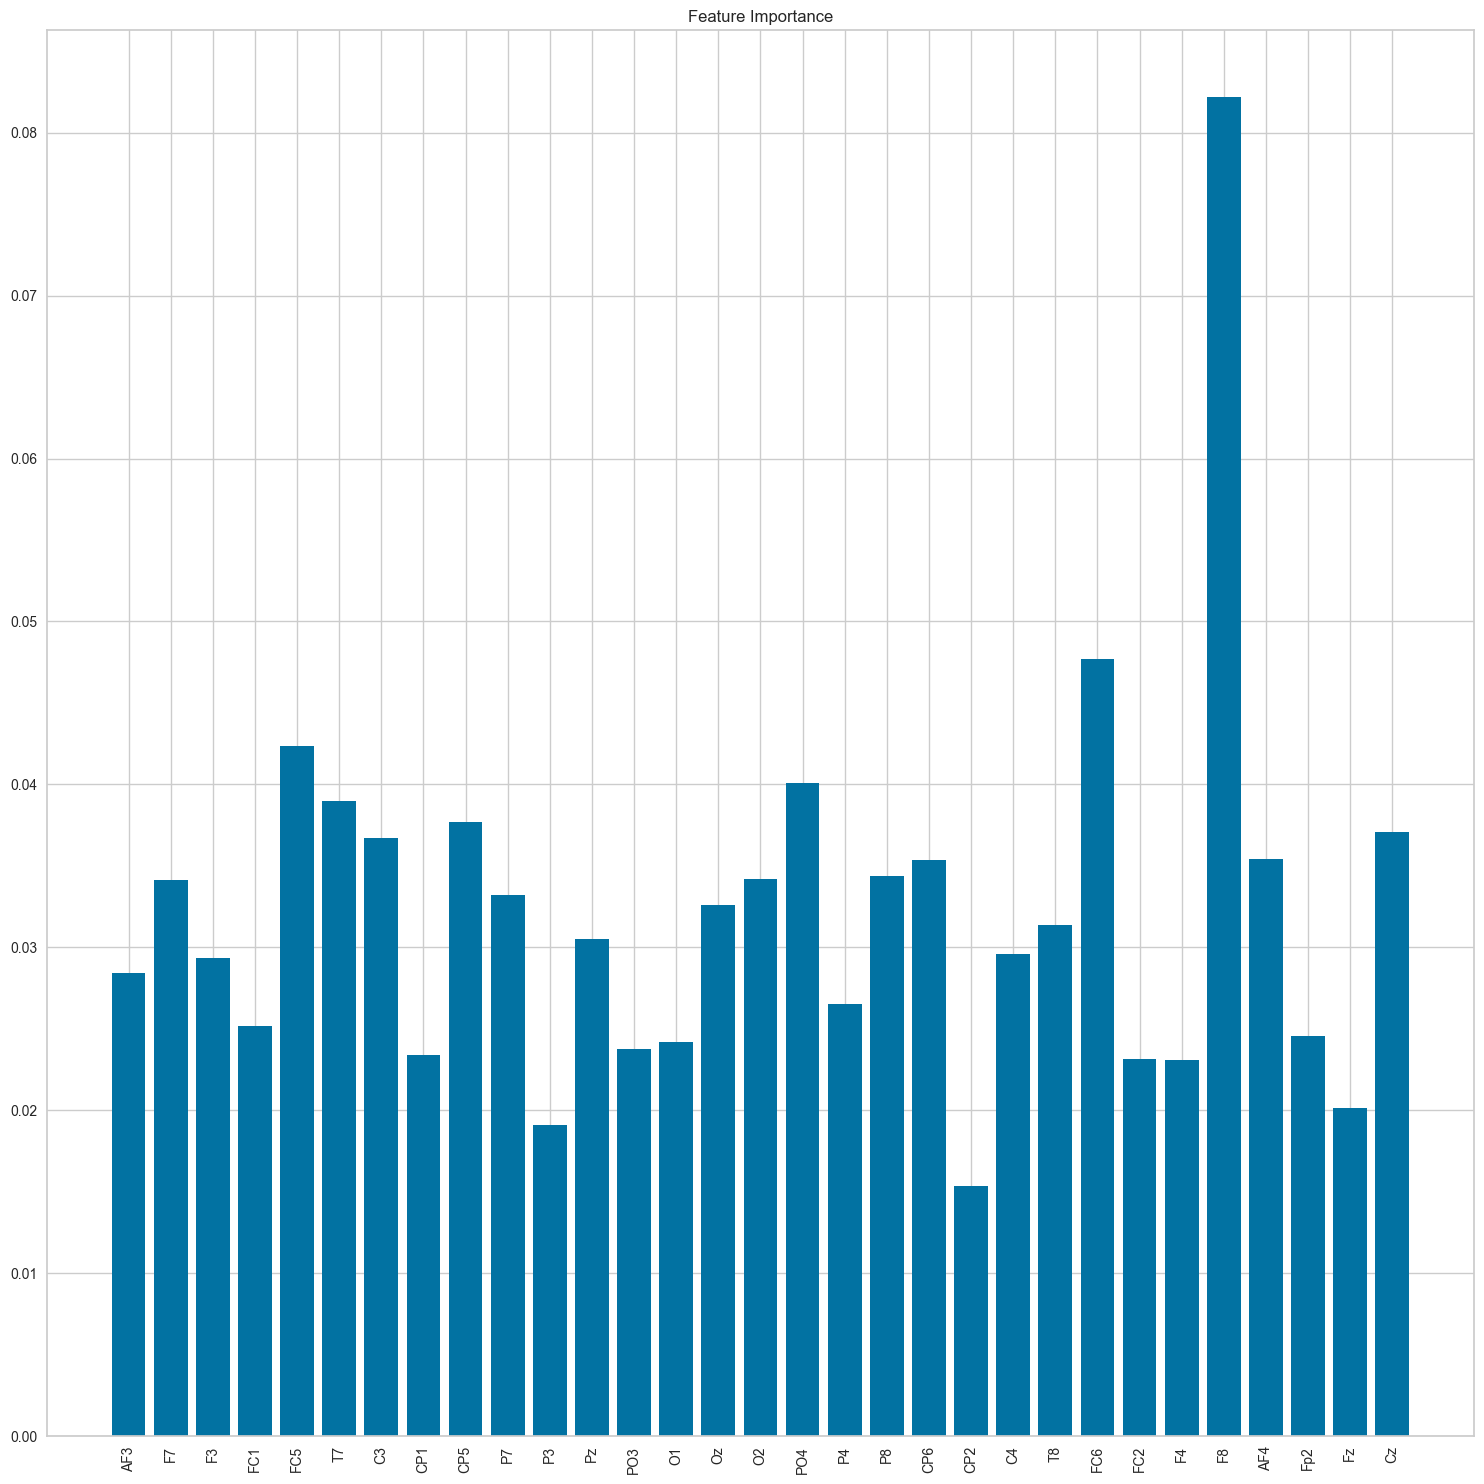

In [487]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

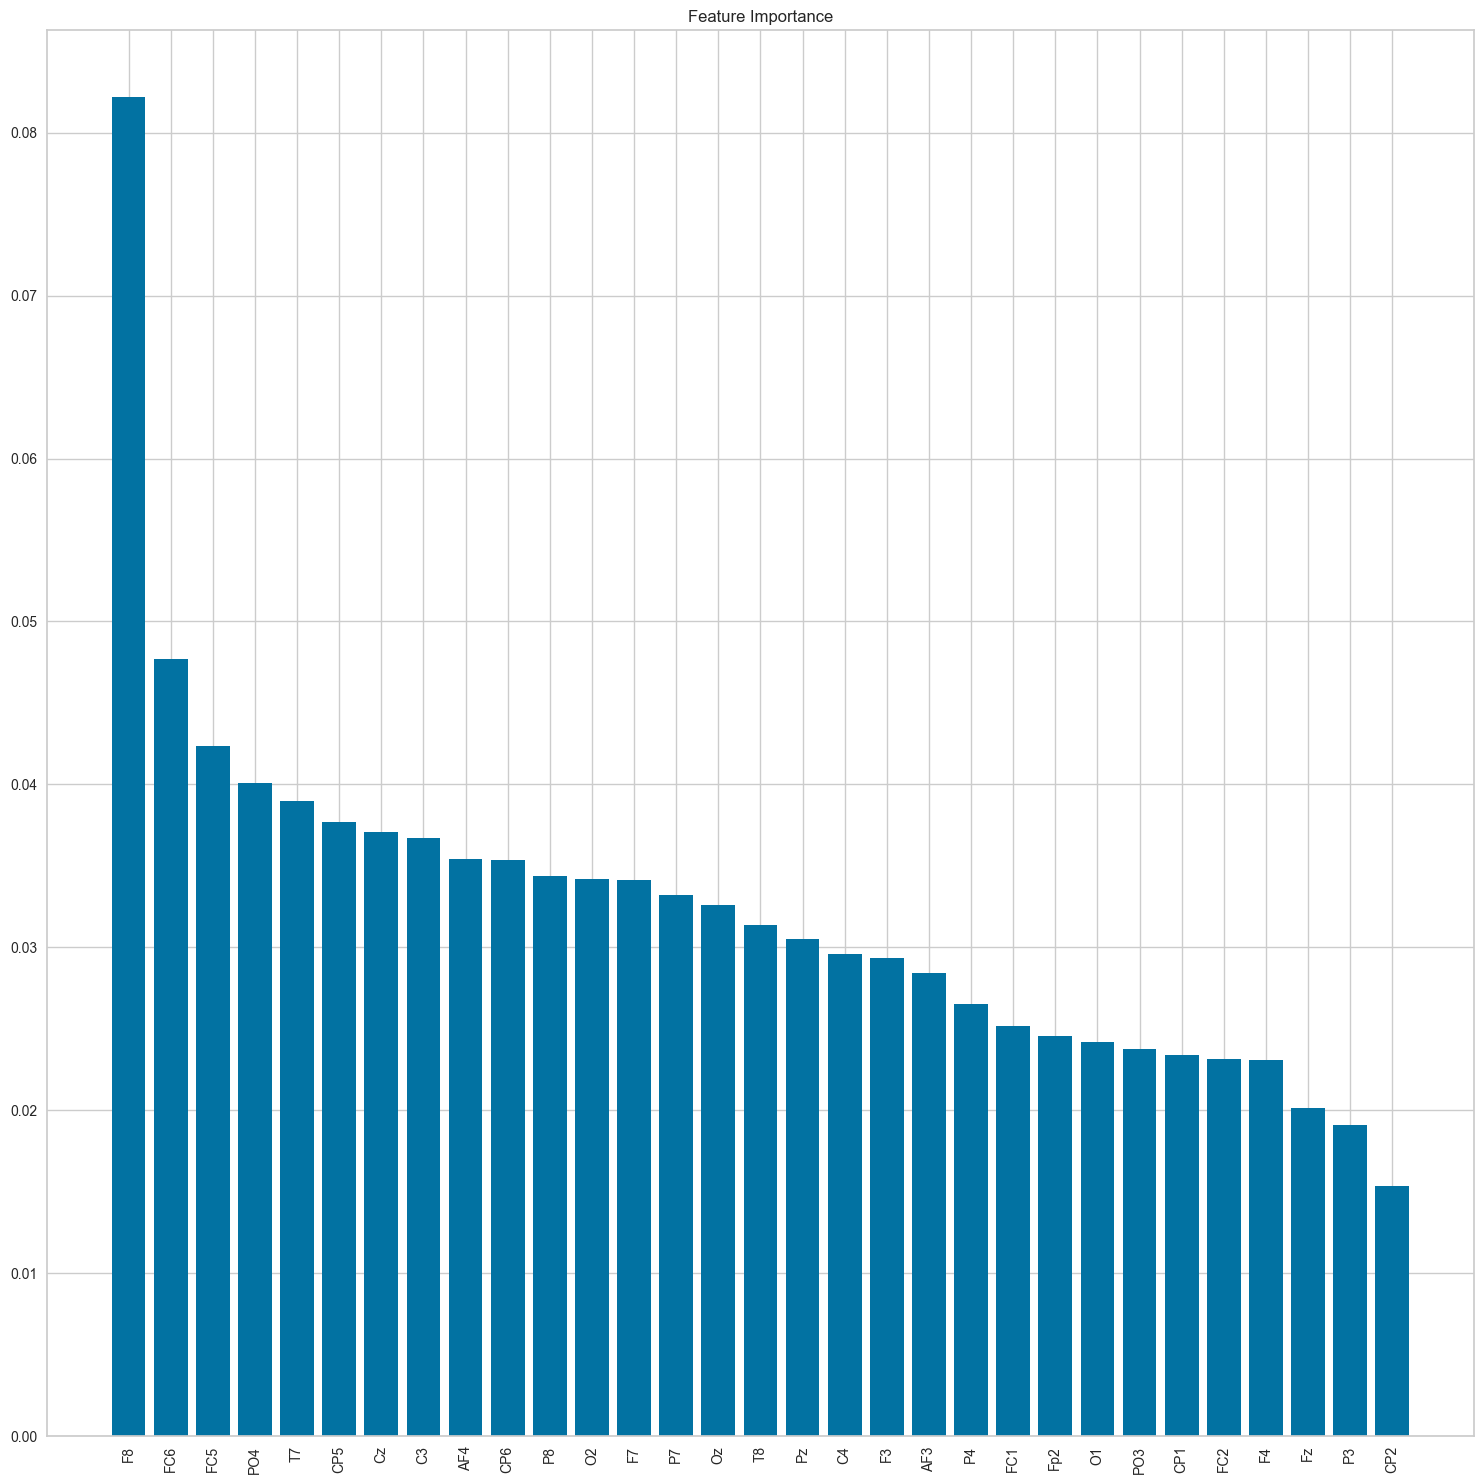

In [488]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [489]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02841568, 0.03412444, 0.0293507 , 0.02520431,
       0.04236231, 0.0390112 , 0.03673143, 0.02339865, 0.03769168,
       0.03324188, 0.01909026, 0.03049842, 0.02378311, 0.02418926,
       0.03261471, 0.03417703, 0.04011975, 0.02654424, 0.03437973,
       0.03536463, 0.01534208, 0.02961376, 0.03138281, 0.04772719,
       0.02312941, 0.02311191, 0.08215894, 0.03540614, 0.0245968 ,
       0.02017929, 0.03705823])

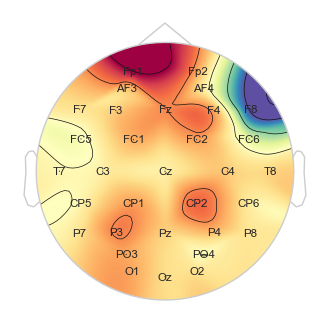

(<matplotlib.image.AxesImage at 0x7ff4b0aa8d00>,
 <matplotlib.contour.QuadContourSet at 0x7ff4de4eb610>)

In [490]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>9. Hjorth<h2>

In [491]:
hjorth_pd['Y'] = 1
hjorth['Y'] = 0

In [492]:
X1 = hjorth.append(hjorth_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,"(0.3098566834776525, 1.3452670358373884)","(0.336510353930744, 1.2486301700207272)","(0.3441843221975105, 1.2561363580863107)","(0.24200210388578802, 1.6228524101220747)","(0.1163192585341444, 3.0272585815648103)","(0.19692154430387088, 1.9220862263534155)","(0.2819141576388841, 1.4580081254996267)","(0.16480065280852427, 2.181563123554767)","(0.17517102976200605, 2.0763427934882563)","(0.17459575248571857, 1.8809944412529773)",...,"(0.23765107076149972, 1.5367157008682424)","(0.26077090718315904, 1.4924639158411988)","(0.21677215262889538, 1.694851155286115)","(0.2817864416575937, 1.449062525309395)","(0.2188243402749768, 1.7417996365137522)","(0.3076256443115632, 1.3491695746989596)","(0.20456131796464122, 1.7636207798625858)","(0.1648411904741638, 2.209401226293809)","(0.1950775078568223, 1.8247743568383354)",0
1,"(0.31649322203776536, 1.3213509162866313)","(0.3471712287087798, 1.1974578758148693)","(0.3032931820191667, 1.3906077424125267)","(0.22355776990827966, 1.6781779290807133)","(0.14018474797138739, 2.5338518257878087)","(0.22051889102763444, 1.7537900192236249)","(0.25994815217110945, 1.5146595809986707)","(0.16999906852839428, 2.156658860734825)","(0.15079729808183026, 2.142689342944042)","(0.16011117250900397, 2.201031178716718)",...,"(0.22265493554659346, 1.7823246946819644)","(0.2707815906355487, 1.5081228457454527)","(0.23981774943239711, 1.647685744272439)","(0.29723478137493586, 1.3266969343917672)","(0.24291397037538995, 1.6137820286624063)","(0.31987678929225905, 1.2170965015345303)","(0.23024055015884237, 1.6934667793095637)","(0.18822930006017735, 2.1551112513323023)","(0.21305702503238244, 1.7851389006149272)",0
2,"(0.3117873964964747, 1.3325033787561653)","(0.32176528789540704, 1.2293968528944992)","(0.3124372856530731, 1.3128267625868013)","(0.18929261599741504, 1.9959363512707982)","(0.19431707069986573, 1.885025504521463)","(0.24403702542130754, 1.6330809163977558)","(0.21748391139209122, 1.7399438817392787)","(0.19601222149565686, 1.897724678994115)","(0.14627233565061878, 2.1929460327603696)","(0.17315513243463457, 1.9277948054197507)",...,"(0.18118462101120153, 2.0414288571680634)","(0.24969041957898647, 1.6028079360635519)","(0.23190806343569453, 1.622423189432742)","(0.3064646862470011, 1.2991166652781998)","(0.22530251516687896, 1.6175991428386254)","(0.30514905842239837, 1.244489369054251)","(0.2246857639917078, 1.6633938692746388)","(0.2075686765967285, 1.8705632131241252)","(0.20414719796982728, 1.734275366547196)",0
3,"(0.272355506830479, 1.4824993675384108)","(0.2907848247614829, 1.3420561736615395)","(0.28345613206910153, 1.4526633926995918)","(0.20122302276814433, 1.964490868597565)","(0.16525090370174686, 2.0918175323738755)","(0.214162473901615, 1.906229211767018)","(0.20198467022703495, 1.9055888346913417)","(0.16603124427751859, 1.974613595440039)","(0.14633158642621158, 2.1476173363197035)","(0.18221211529308987, 1.6398626504991551)",...,"(0.18559042009544008, 1.815254561187265)","(0.25293309070138215, 1.5571908846632652)","(0.2204970710337894, 1.5804851814465963)","(0.3123174460980318, 1.3208436034975557)","(0.2064393896372842, 1.6879629606848907)","(0.27907747766994895, 1.3474065336688246)","(0.21657589485377193, 1.7023139010199955)","(0.19181348163380912, 1.7323403482548356)","(0.18267505409637055, 1.7253101429267546)",0
4,"(0.2698188473825141, 1.5070714658058504)","(0.3322762793689314, 1.271786286020755)","(0.31340789092362237, 1.3603206759720246)","(0.29007216803157976, 1.3637757340294816)","(0.16732542512989582, 1.9184429175452395)","(0.22854267023791974, 1.7570892160238574)","(0.21977520312822366, 1.7639465122671139)","(0.15066089565374857, 2.1553753447608006)","(0.16917416941007946, 1.9501259456559539)","(0.17398821398986394, 1.788671393167117)",...,"(0.2141222596591646, 1.6503432514180119)","(0.2514134723852119, 1.557748403108914)","(0.24202080046391686, 1.4506134209812844)","(0.3076604521195638, 1

In [493]:
X2 = X1.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.827562,0.792570,0.800160,0.932427,1.571789,1.059504,0.869961,1.173182,1.125757,1.027795,...,0.939580,0.887183,0.876617,0.955812,0.865424,0.980312,0.828398,0.984091,1.187121,1.009926
1,0.818922,0.772315,0.846950,0.950868,1.337018,0.987154,0.887304,1.163329,1.146743,1.180571,...,1.119289,1.002490,0.889452,0.943752,0.811966,0.928348,0.768487,0.961854,1.171670,0.999098
2,0.822145,0.775581,0.812632,1.092614,1.039671,0.938559,0.978714,1.046868,1.169609,1.050475,...,1.146347,1.111307,0.926249,0.927166,0.802791,0.921451,0.774819,0.944040,1.039066,0.969211
3,0.877427,0.816420,0.868060,1.082857,1.128534,1.060196,1.053787,1.070322,1.146974,0.911037,...,0.986696,1.000422,0.905062,0.900491,0.816581,0.947201,0.813242,0.959445,0.962077,0.953993
4,0.888445,0.802031,0.836864,0.826924,1.042884,0.992816,0.991861,1.153018,1.059650,0.981330,...,0.885854,0.932233,0.904581,0.846317,0.816866,0.971126,0.822292,0.970804,0.950794,1.016764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.800997,0.786679,0.790283,0.803192,1.186481,0.746876,0.861851,0.804613,1.159368,0.785027,...,0.778730,1.197730,0.773554,0.767125,0.771894,0.854687,0.776336,0.773957,0.807984,0.816864
6275,0.809078,0.779002,0.799715,0.833200,0.846331,0.938451,0.922582,0.972766,1.063695,0.790873,...,0.828326,1.152838,0.803473,0.791438,0.823577,0.965699,0.836782,0.874177,0.821910,0.851851
6276,0.776521,0.812282,0.799669,0.873984,0.819910,0.892421,0.938022,1.185220,1.212742,0.855399,...,0.854679,1.212090,0.813356,0.800873,0.837624,1.215635,0.883838,0.894784,0.843436,1.074124
6277,0.839736,0.824750,0.806896,0.861797,1.047856,1.050988,1.050574,1.111324,1.327348,0.938103,...,1.233543,1.203083,1.096551,1.118691,1.099649,1.358497,0.981493,0.894634,1.124385,1.137364


In [494]:
X2 = pd.concat([X2, X1.iloc[:, -1]], axis=1)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.827562,0.792570,0.800160,0.932427,1.571789,1.059504,0.869961,1.173182,1.125757,1.027795,...,0.887183,0.876617,0.955812,0.865424,0.980312,0.828398,0.984091,1.187121,1.009926,0
1,0.818922,0.772315,0.846950,0.950868,1.337018,0.987154,0.887304,1.163329,1.146743,1.180571,...,1.002490,0.889452,0.943752,0.811966,0.928348,0.768487,0.961854,1.171670,0.999098,0
2,0.822145,0.775581,0.812632,1.092614,1.039671,0.938559,0.978714,1.046868,1.169609,1.050475,...,1.111307,0.926249,0.927166,0.802791,0.921451,0.774819,0.944040,1.039066,0.969211,0
3,0.877427,0.816420,0.868060,1.082857,1.128534,1.060196,1.053787,1.070322,1.146974,0.911037,...,1.000422,0.905062,0.900491,0.816581,0.947201,0.813242,0.959445,0.962077,0.953993,0
4,0.888445,0.802031,0.836864,0.826924,1.042884,0.992816,0.991861,1.153018,1.059650,0.981330,...,0.932233,0.904581,0.846317,0.816866,0.971126,0.822292,0.970804,0.950794,1.016764,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,0.800997,0.786679,0.790283,0.803192,1.186481,0.746876,0.861851,0.804613,1.159368,0.785027,...,1.197730,0.773554,0.767125,0.771894,0.854687,0.776336,0.773957,0.807984,0.816864,1
6275,0.809078,0.779002,0.799715,0.833200,0.846331,0.938451,0.922582,0.972766,1.063695,0.790873,...,1.152838,0.803473,0.791438,0.823577,0.965699,0.836782,0.874177,0.821910,0.851851,1
6276,0.776521,0.812282,0.799669,0.873984,0.819910,0.892421,0.938022,1.185220,1.212742,0.855399,...,1.212090,0.813356,0.800873,0.837624,1.215635,0.883838,0.894784,0.843436,1.074124,1
6277,0.839736,0.824750,0.806896,0.861797,1.047856,1.050988,1.050574,1.111324,1.327348,0.938103,...,1.203083,1.096551,1.118691,1.099649,1.358497,0.981493,0.894634,1.124385,1.137364,1


In [379]:
clf = setup(data=X2, target='Y')

,Description,Value
0,Session id,8400
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [382]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:22:06
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9327,0.9835,0.9492,0.9248,0.9366,0.8648,0.8657,0.3087
et,Extra Trees Classifier,0.9322,0.9824,0.9557,0.9186,0.9366,0.8638,0.8649,0.3260
lightgbm,Light Gradient Boosting Machine,0.9295,0.9826,0.9492,0.9190,0.9338,0.8584,0.8590,0.3093
rf,Random Forest Classifier,0.9229,0.9783,0.9435,0.9126,0.9277,0.8451,0.8460,0.3220
knn,K Neighbors Classifier,0.9051,0.9643,0.9474,0.8808,0.9128,0.8091,0.8119,0.3120
gbc,Gradient Boosting Classifier,0.8833,0.9542,0.9218,0.8650,0.8923,0.7652,0.7676,0.3147
ada,Ada Boost Classifier,0.8016,0.8774,0.8240,0.8028,0.8130,0.6018,0.6024,0.3127
dt,Decision Tree Classifier,0.7932,0.7931,0.7950,0.8085,0.8009,0.5857,0.5869,0.3093
qda,Quadratic Discriminant Analysis,0.7725,0.9137,0.9313,0.7189,0.8112,0.5369,0.5665,0.3133
lr,Logistic Regression,0.7695,0.8365,0.8045,0.7673,0.7852,0.5368,0.5379,0.3140


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='binary:logistic', predictor=None, ...)

In [388]:
xgb = create_model('xgboost', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:26:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9522,0.9865,0.9870,0.9268,0.9560,0.9038,0.9060
1,0.9249,0.9800,0.9545,0.9074,0.9304,0.8490,0.8503
2,0.9420,0.9843,0.9545,0.9363,0.9453,0.8835,0.8837
3,0.8908,0.9729,0.9026,0.8910,0.8968,0.7808,0.7809
4,0.9488,0.9817,0.9545,0.9484,0.9515,0.8973,0.8973
5,0.9317,0.9862,0.9805,0.8988,0.9379,0.8624,0.8665
6,0.9625,0.9936,0.9545,0.9735,0.9639,0.9248,0.9250
7,0.9181,0.9769,0.9542,0.8957,0.9241,0.8354,0.8373
8,0.9249,0.9876,0.9608,0.9018,0.9304,0.8491,0.8511


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [383]:
et = create_model('et', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:23:46
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9488,0.9907,0.9805,0.9264,0.9527,0.8970,0.8987
1,0.9317,0.9838,0.9740,0.9036,0.9375,0.8625,0.8655
2,0.9249,0.9809,0.9545,0.9074,0.9304,0.8490,0.8503
3,0.9249,0.9813,0.9481,0.9125,0.9299,0.8491,0.8498
4,0.9215,0.9786,0.9416,0.9119,0.9265,0.8423,0.8428
5,0.9352,0.9822,0.9610,0.9193,0.9397,0.8696,0.8707
6,0.9522,0.9895,0.9481,0.9605,0.9542,0.9043,0.9043
7,0.9249,0.9721,0.9477,0.9119,0.9295,0.8493,0.8500
8,0.9215,0.9857,0.9542,0.9012,0.9270,0.8423,0.8439


In [496]:
X3 = X2.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [498]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
6274    1
6275    1
6276    1
6277    1
6278    1
Name: Y, Length: 6279, dtype: int64

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [500]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8904968644476604


In [502]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.75%


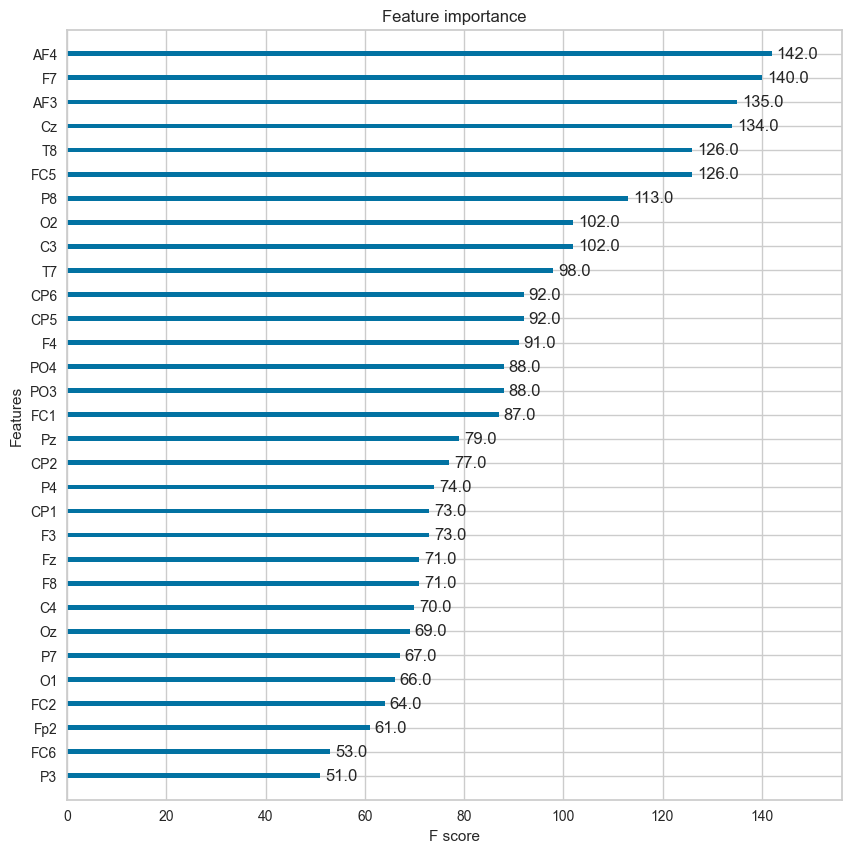

In [503]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

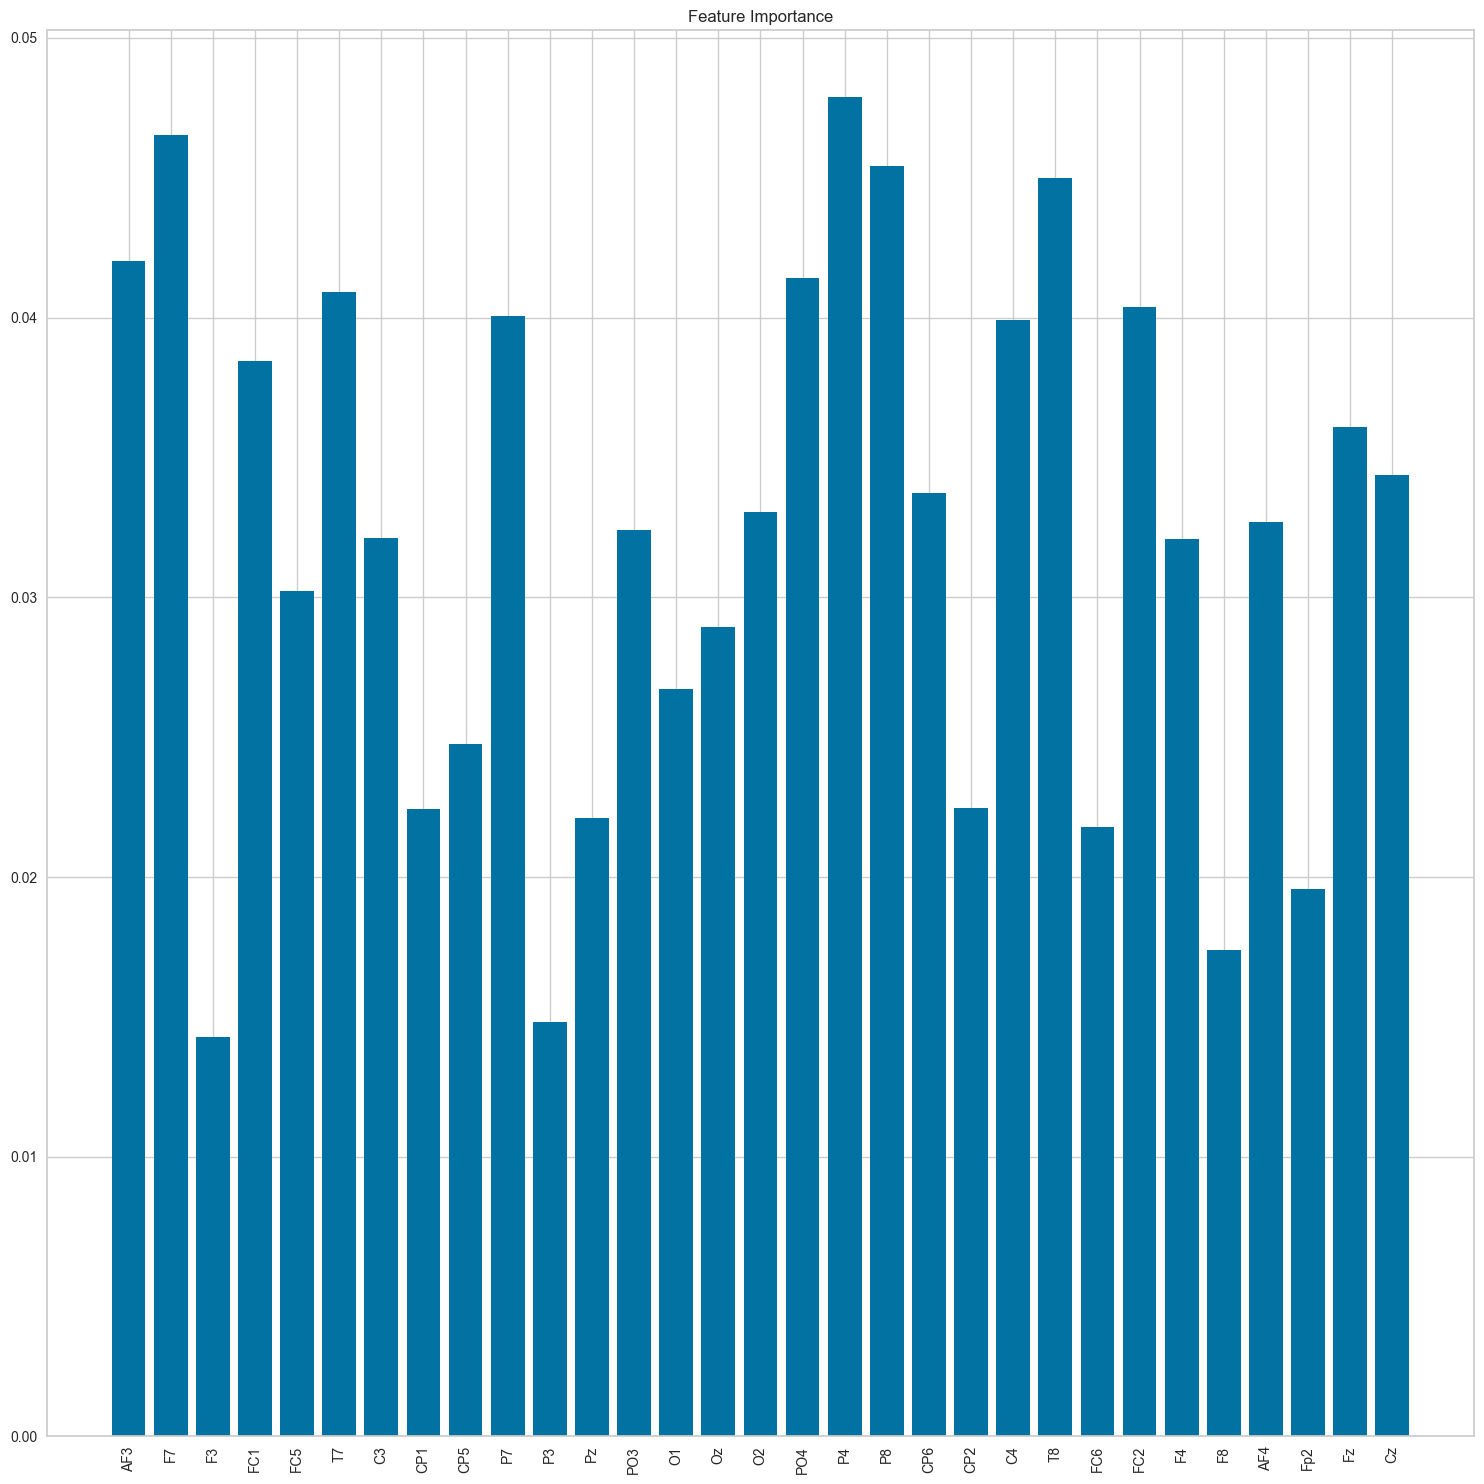

In [504]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

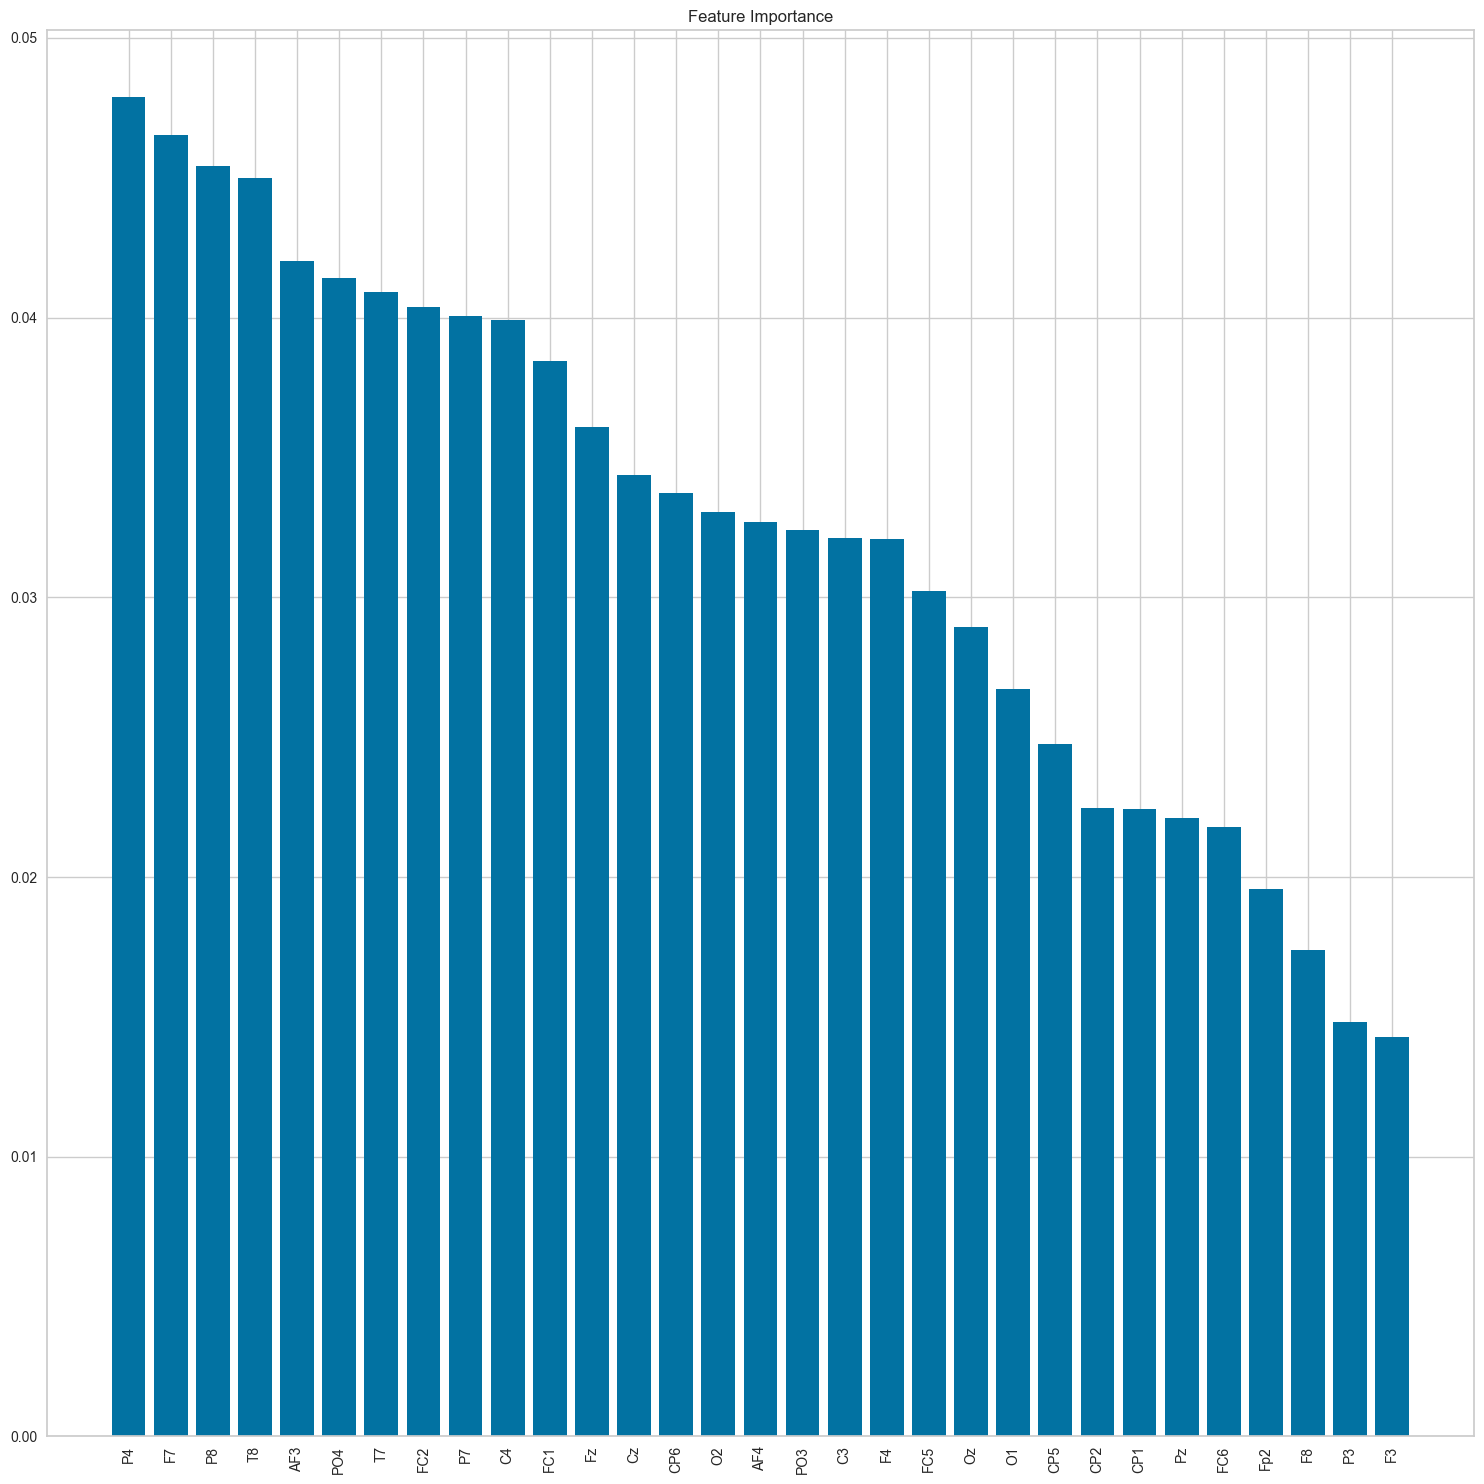

In [505]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [506]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.04201758, 0.04651411, 0.01428442, 0.03844369,
       0.03021522, 0.04090707, 0.03212247, 0.02243011, 0.02473947,
       0.04005167, 0.01481494, 0.02209485, 0.03242496, 0.02671258,
       0.02894573, 0.03306187, 0.04143317, 0.04787694, 0.04541859,
       0.03372012, 0.02247242, 0.03991092, 0.04499886, 0.02178091,
       0.04039801, 0.03207363, 0.01738299, 0.03270563, 0.01957988,
       0.03608496, 0.03438222])

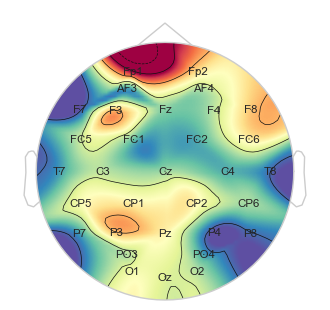

(<matplotlib.image.AxesImage at 0x7ff48ed521c0>,
 <matplotlib.contour.QuadContourSet at 0x7ff48ed5e7f0>)

In [507]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>10. Num Zero Crossings</h2>

In [508]:
num_zero_pd['Y'] = 1
num_zero['Y'] = 0

In [509]:
X1 = num_zero.append(num_zero_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,53,56,45,38,14,29,49,28,19,24,...,37,39,34,39,37,51,33,30,30,0
1,50,57,42,38,27,31,48,24,22,20,...,41,39,38,45,36,56,41,34,32,0
2,46,48,47,32,35,41,38,28,21,27,...,32,37,41,55,38,53,45,33,29,0
3,40,46,46,31,30,35,29,27,24,30,...,27,40,35,52,34,47,34,29,27,0
4,40,56,48,41,25,38,35,24,34,21,...,39,41,37,49,40,51,41,33,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,48,49,55,52,21,44,51,45,29,57,...,36,40,52,50,38,49,55,49,47,1
6275,43,40,49,40,31,37,49,29,30,53,...,14,31,41,37,28,41,39,43,39,1
6276,45,46,56,45,32,37,33,22,28,45,...,13,25,27,23,18,27,39,35,27,1
6277,39,48,56,47,27,32,32,31,29,40,...,25,27,24,26,19,28,48,32,30,1


In [392]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,6546
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [394]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:50:03
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9231,0.9746,0.9570,0.9026,0.9289,0.8453,0.8474,0.3407
xgboost,Extreme Gradient Boosting,0.9165,0.9749,0.9318,0.9111,0.9212,0.8324,0.8329,0.3427
et,Extra Trees Classifier,0.9076,0.9710,0.9349,0.8940,0.9139,0.8144,0.8156,0.3567
lightgbm,Light Gradient Boosting Machine,0.9069,0.9686,0.9222,0.9025,0.9122,0.8132,0.8137,0.3447
rf,Random Forest Classifier,0.8962,0.9620,0.9179,0.8882,0.9027,0.7916,0.7924,0.3560
qda,Quadratic Discriminant Analysis,0.8881,0.9550,0.8923,0.8941,0.8930,0.7756,0.7761,0.3447
gbc,Gradient Boosting Classifier,0.8564,0.9344,0.8853,0.8476,0.8660,0.7115,0.7124,0.3447
ada,Ada Boost Classifier,0.7841,0.8642,0.8289,0.7756,0.8010,0.5656,0.5678,0.3460
dt,Decision Tree Classifier,0.7727,0.7720,0.7863,0.7813,0.7835,0.5442,0.5446,0.3400
ridge,Ridge Classifier,0.7281,0.0000,0.7637,0.7300,0.7462,0.4537,0.4546,0.3507


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [395]:
knn = create_model('knn', fold=15, n_neighbors=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:52:42
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9352,0.9734,0.9610,0.9193,0.9397,0.8696,0.8707
1,0.9181,0.9749,0.9545,0.8963,0.9245,0.8352,0.8371
2,0.9556,0.9869,0.9740,0.9434,0.9585,0.9109,0.9114
3,0.8942,0.9664,0.9416,0.8683,0.9034,0.7869,0.7900
4,0.8976,0.9726,0.9351,0.8780,0.9057,0.7940,0.7958
5,0.9215,0.9739,0.9416,0.9119,0.9265,0.8423,0.8428
6,0.9249,0.9731,0.9545,0.9074,0.9304,0.8490,0.8503
7,0.9317,0.9765,0.9739,0.9030,0.9371,0.8627,0.8657
8,0.9522,0.9815,0.9739,0.9371,0.9551,0.9041,0.9048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [396]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:52:48
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9352,0.9338,0.9610,0.9193,0.9397,0.8696,0.8707
1,0.9215,0.9204,0.9416,0.9119,0.9265,0.8423,0.8428
2,0.9352,0.9345,0.9481,0.9299,0.9389,0.8698,0.8700
3,0.9283,0.9283,0.9286,0.9346,0.9316,0.8563,0.8563
4,0.9044,0.9028,0.9351,0.8889,0.9114,0.8078,0.8091
5,0.9010,0.8999,0.9221,0.8931,0.9073,0.8012,0.8017
6,0.9386,0.9367,0.9740,0.9146,0.9434,0.8764,0.8785
7,0.9283,0.9283,0.9281,0.9342,0.9311,0.8564,0.8564
8,0.9386,0.9387,0.9346,0.9470,0.9408,0.8770,0.8770


Fitting 15 folds for each of 10 candidates, totalling 150 fits


In [397]:
xgb = create_model('xgboost', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:53:54
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9283,0.9759,0.9610,0.9080,0.9338,0.8558,0.8575
1,0.9044,0.9754,0.9091,0.9091,0.9091,0.8084,0.8084
2,0.9488,0.9827,0.9481,0.9542,0.9511,0.8974,0.8974
3,0.9010,0.9697,0.9221,0.8931,0.9073,0.8012,0.8017
4,0.9454,0.9843,0.9545,0.9423,0.9484,0.8904,0.8905
5,0.8976,0.9672,0.9026,0.9026,0.9026,0.7947,0.7947
6,0.9147,0.9757,0.9351,0.9057,0.9201,0.8286,0.8291
7,0.9113,0.9690,0.9216,0.9097,0.9156,0.8221,0.8221
8,0.8942,0.9647,0.9216,0.8812,0.9010,0.7875,0.7884


In [510]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [511]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [512]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8977327544621322


In [513]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.57%


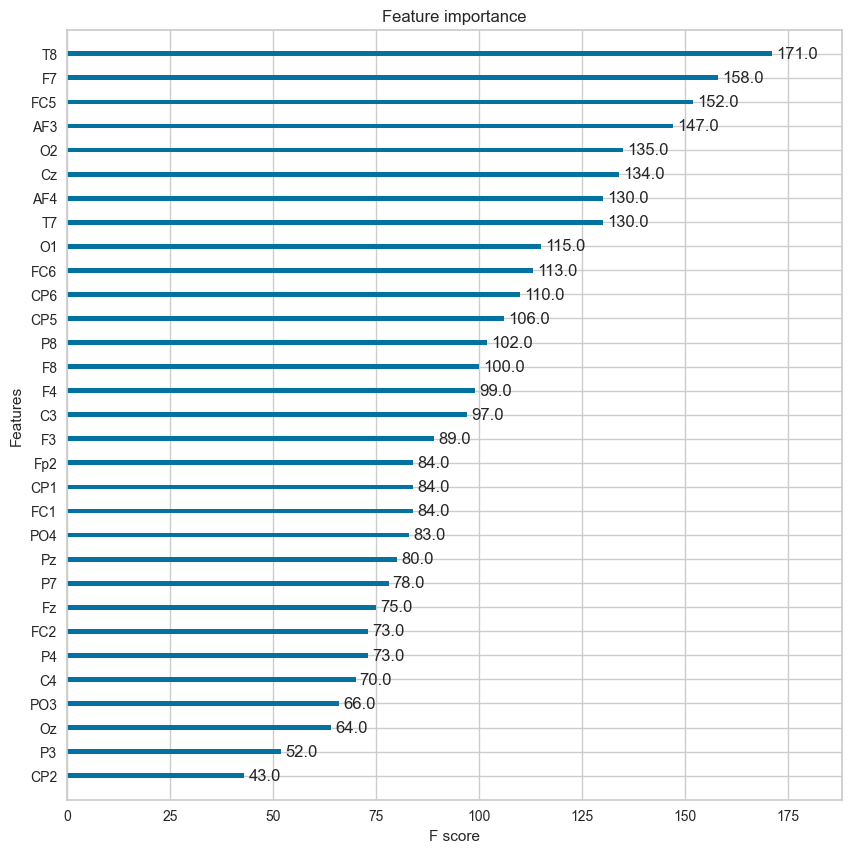

In [514]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

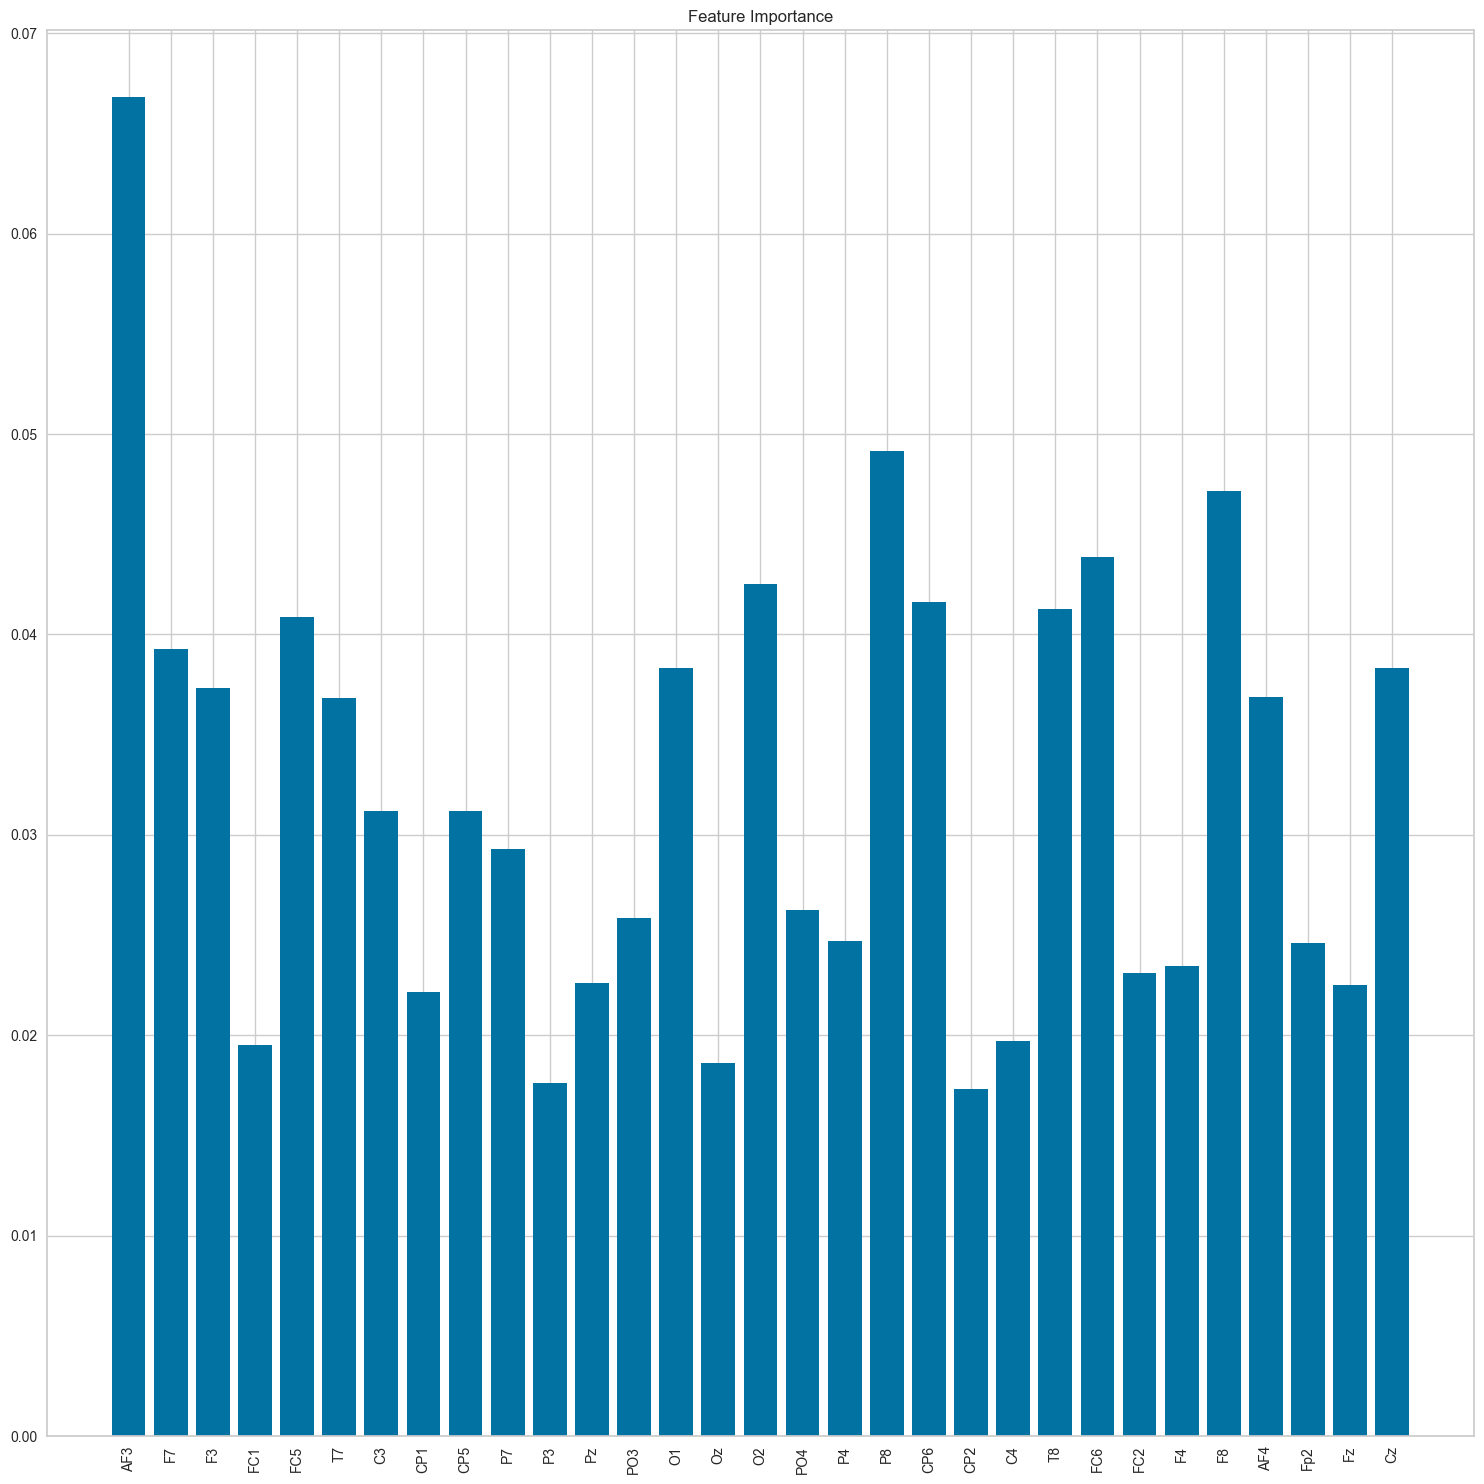

In [515]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

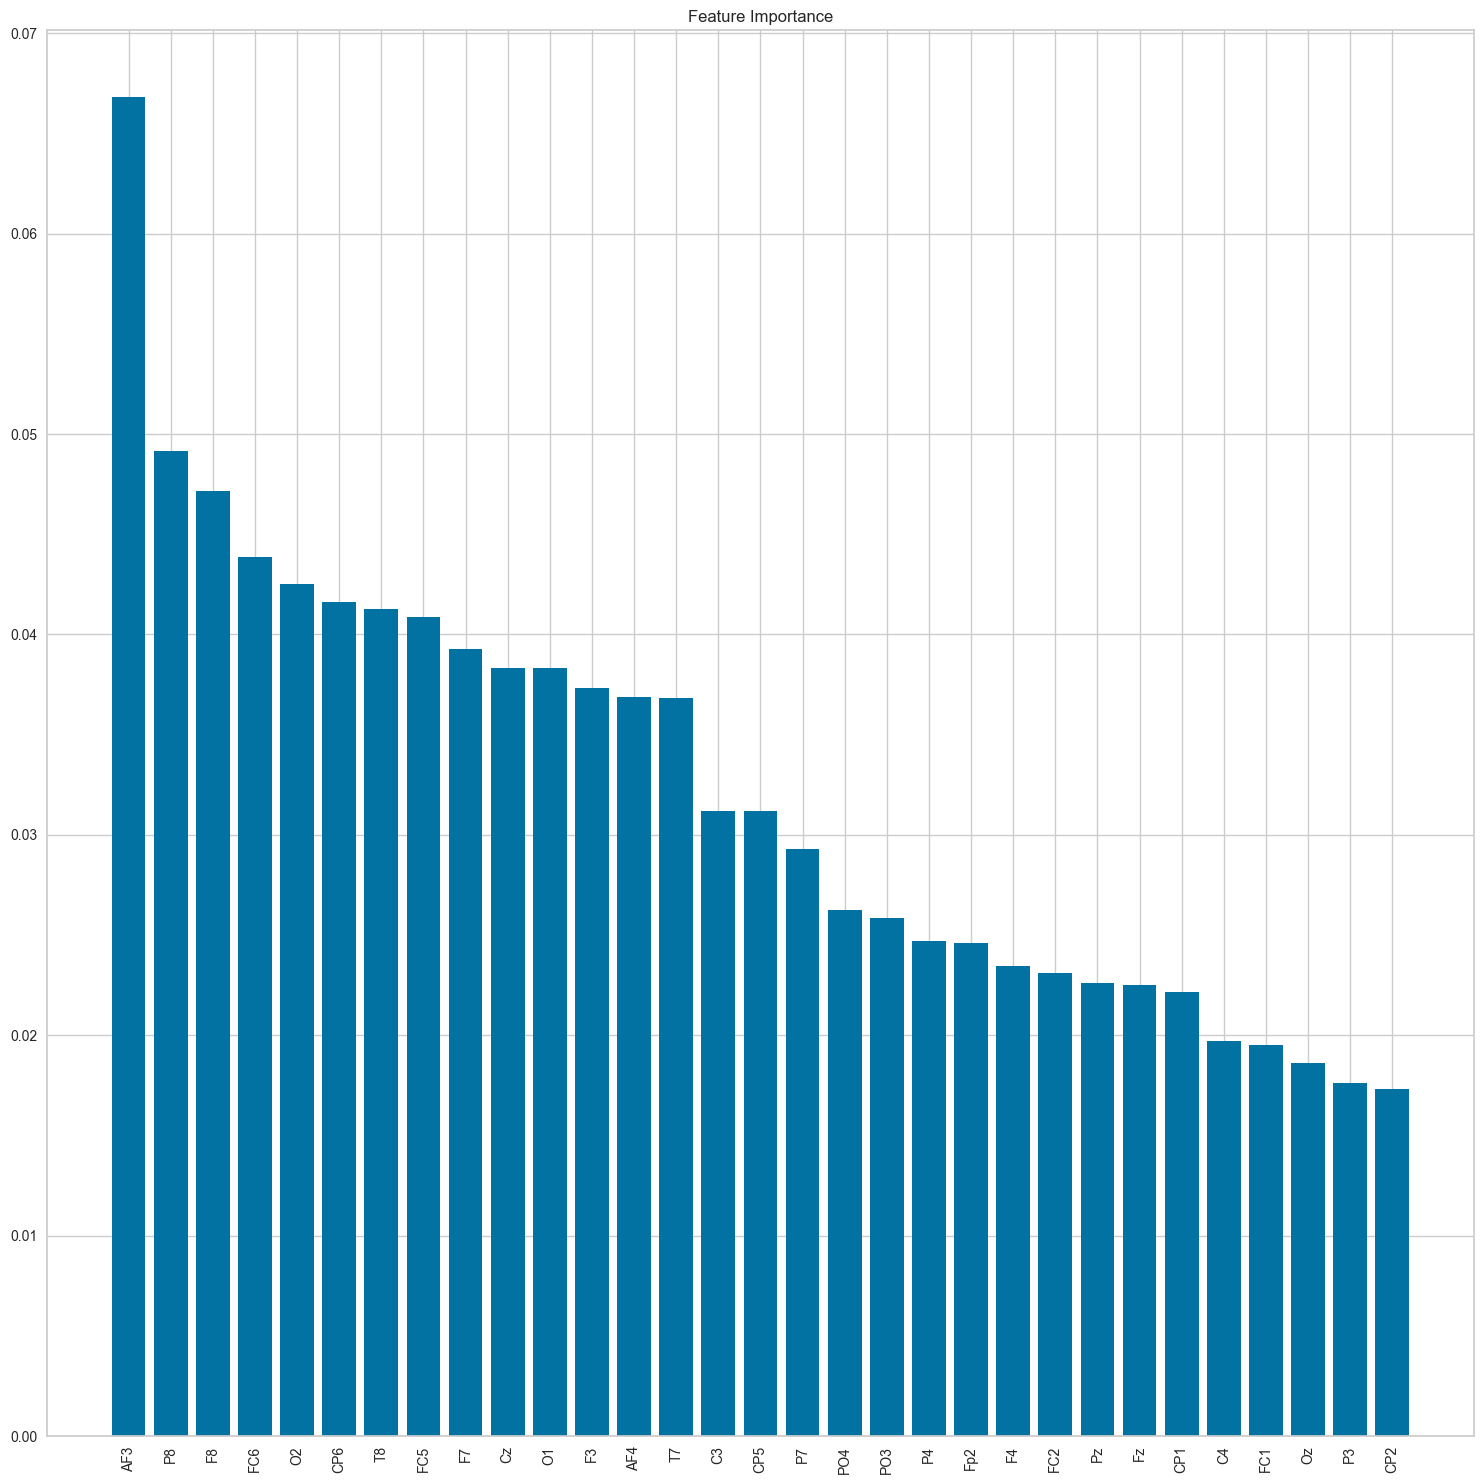

In [516]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [517]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.06679178, 0.03926643, 0.03733303, 0.01954254,
       0.04088861, 0.03680918, 0.03117517, 0.02216507, 0.03117099,
       0.02932177, 0.01760944, 0.02261866, 0.02587442, 0.03830735,
       0.01861963, 0.04253358, 0.02626116, 0.02470064, 0.04914851,
       0.04159658, 0.01730407, 0.01973418, 0.0412912 , 0.04386961,
       0.02312539, 0.02347791, 0.04714348, 0.03687993, 0.02459   ,
       0.02251615, 0.03833353])

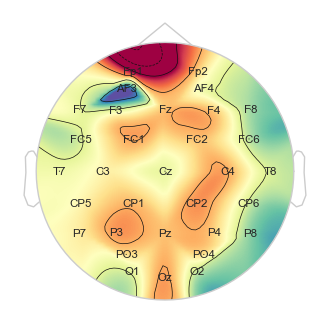

(<matplotlib.image.AxesImage at 0x7ff4c2c620d0>,
 <matplotlib.contour.QuadContourSet at 0x7ff481b9e130>)

In [518]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral', axes=ax)

<h2>11. Lziv </h2>

In [398]:
lziv_pd['Y'] = 1
lziv['Y'] = 0

In [399]:
X1 = lziv.append(lziv_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
6275,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
6276,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
6277,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [400]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,5934
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [401]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:55:28
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3393
dt,Decision Tree Classifier,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3413
ridge,Ridge Classifier,0.5238,0.0000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3313
rf,Random Forest Classifier,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3720
ada,Ada Boost Classifier,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3540
gbc,Gradient Boosting Classifier,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3513
et,Extra Trees Classifier,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3767
xgboost,Extreme Gradient Boosting,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3680
lightgbm,Light Gradient Boosting Machine,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3400
dummy,Dummy Classifier,0.5238,0.5000,1.0000,0.5238,0.6875,0.0000,0.0000,0.3393


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5934, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<h2>12. Detrended Fluctuation </h2>

In [402]:
det_fluc_pd['Y'] = 1
det_fluc['Y'] = 0

In [403]:
X1 = det_fluc.append(det_fluc_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.332924,1.245463,1.223436,1.345109,1.548538,1.506628,1.375342,1.595069,1.544671,1.685703,...,1.495068,1.404266,1.506338,1.348861,1.450822,1.292599,1.501354,1.540169,1.482753,0
1,1.316367,1.246331,1.288866,1.414207,1.542238,1.434486,1.445550,1.543718,1.630492,1.605172,...,1.471196,1.347392,1.481563,1.342959,1.417327,1.304189,1.461938,1.466110,1.477764,0
2,1.293682,1.287648,1.314637,1.430616,1.580328,1.409755,1.514860,1.541767,1.622266,1.603671,...,1.485793,1.345210,1.460368,1.305655,1.408013,1.388344,1.373781,1.469746,1.582930,0
3,1.375462,1.345989,1.322609,1.397736,1.613687,1.389846,1.456800,1.560870,1.569897,1.528978,...,1.551417,1.426345,1.514373,1.301281,1.482822,1.391208,1.401813,1.554548,1.609133,0
4,1.390287,1.286174,1.287354,1.343921,1.626089,1.367087,1.438047,1.565146,1.571731,1.560762,...,1.515335,1.417202,1.446381,1.319058,1.376794,1.328152,1.319363,1.556250,1.542972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6274,1.137825,1.162825,1.199416,1.210922,1.247825,1.281207,1.155629,1.241778,1.368091,1.208055,...,1.266321,1.091967,1.141305,1.100251,1.161705,1.096559,1.125790,1.156052,1.261877,1
6275,1.214964,1.255701,1.231056,1.277070,1.319375,1.335101,1.316715,1.260251,1.379568,1.190765,...,1.256567,1.129003,1.161245,1.148484,1.188528,1.148523,1.194496,1.187084,1.260154,1
6276,1.275358,1.293226,1.204802,1.315979,1.354913,1.317760,1.333107,1.459666,1.485808,1.316829,...,1.252376,1.192838,1.249554,1.233648,1.256861,1.230875,1.241616,1.298224,1.342754,1
6277,1.328414,1.272710,1.189196,1.301742,1.415110,1.360756,1.285271,1.430915,1.515515,1.398673,...,1.248942,1.239098,1.380594,1.293971,1.304415,1.283580,1.281217,1.420657,1.467621,1


In [404]:
clf = setup(data=X1, target='Y')

,Description,Value
0,Session id,4890
1,Target,Y
2,Target type,Binary
3,Original data shape,"(6279, 33)"
4,Transformed data shape,"(6279, 33)"
5,Transformed train set shape,"(4395, 33)"
6,Transformed test set shape,"(1884, 33)"
7,Numeric features,32
8,Preprocess,True
9,Imputation type,simple


In [408]:
compare_models(fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:06:09
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Logistic Regression


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9577,0.9881,0.9461,0.9724,0.9590,0.9153,0.9158,0.4980
xgboost,Extreme Gradient Boosting,0.9524,0.9884,0.9492,0.9598,0.9543,0.9047,0.9051,0.3580
lightgbm,Light Gradient Boosting Machine,0.9479,0.9868,0.9440,0.9563,0.9499,0.8956,0.8961,0.3600
qda,Quadratic Discriminant Analysis,0.9433,0.9833,0.9344,0.9566,0.9453,0.8866,0.8870,0.3660
et,Extra Trees Classifier,0.9379,0.9824,0.9318,0.9490,0.9402,0.8756,0.8760,0.3780
rf,Random Forest Classifier,0.9226,0.9780,0.9174,0.9340,0.9255,0.8451,0.8455,0.4080
gbc,Gradient Boosting Classifier,0.9035,0.9653,0.9083,0.9080,0.9080,0.8066,0.8070,0.3640
dt,Decision Tree Classifier,0.8359,0.8353,0.8484,0.8408,0.8443,0.6710,0.6714,0.4907
ada,Ada Boost Classifier,0.8268,0.9067,0.8501,0.8254,0.8374,0.6523,0.6530,0.3700
lda,Linear Discriminant Analysis,0.8075,0.8832,0.8393,0.8031,0.8204,0.6132,0.6146,0.3647


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [409]:
knn = create_model('knn', fold=15, n_neighbors=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:08:06
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9522,0.9884,0.9545,0.9545,0.9545,0.9042,0.9042
1,0.9761,0.9979,0.9740,0.9804,0.9772,0.9521,0.9521
2,0.9556,0.9867,0.9286,0.9862,0.9565,0.9113,0.9130
3,0.9590,0.9929,0.9416,0.9797,0.9603,0.9180,0.9188
4,0.9829,0.9953,0.9675,1.0000,0.9835,0.9658,0.9664
5,0.9590,0.9848,0.9416,0.9797,0.9603,0.9180,0.9188
6,0.9522,0.9910,0.9481,0.9605,0.9542,0.9043,0.9043
7,0.9659,0.9870,0.9608,0.9735,0.9671,0.9316,0.9317
8,0.9488,0.9796,0.9346,0.9662,0.9502,0.8976,0.8981


In [412]:
xgb = create_model('xgboost', fold=15)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:16:44
Status,. . . . . . . . . . . . . . . . . .,Fitting 15 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9556,0.9907,0.9481,0.9669,0.9574,0.9111,0.9113
1,0.9590,0.9899,0.9740,0.9494,0.9615,0.9178,0.9181
2,0.9693,0.9969,0.9740,0.9677,0.9709,0.9384,0.9384
3,0.9522,0.9921,0.9416,0.9667,0.9539,0.9043,0.9047
4,0.9659,0.9921,0.9610,0.9737,0.9673,0.9316,0.9317
5,0.9556,0.9851,0.9351,0.9796,0.9568,0.9112,0.9123
6,0.9454,0.9853,0.9481,0.9481,0.9481,0.8905,0.8905
7,0.9522,0.9935,0.9608,0.9484,0.9545,0.9042,0.9043
8,0.9488,0.9917,0.9346,0.9662,0.9502,0.8976,0.8981
